In [1]:
from F1_library import libraryF1dataNotebook as libraryDataF1
import pandas as pd
import fastf1 as ff1

# FORMULA 1 LENOVO JAPANESE GRAND PRIX 2025
The Japanese Grand Prix (Japanese: 日本グランプリ) is a motor racing event in the calendar of the Formula One World Championship. Historically, Japan has been one of the last races of the season, and as such the Japanese Grand Prix has been the venue for many title-deciding races, with 13 World Drivers' Champions being crowned over the 36 World Championship Japanese Grands Prix that have been hosted. Japan was the only Asian nation to host a Formula One race (including the Pacific Grand Prix) until Malaysia joined the calendar in 1999. Source: Wikipedia
Analyzed by Franccy del Piero Sambrano Ganoza

## Upgrades
In this section those upgrades brought by the teams will be shown.
<table>
<tr>
    <td>
    Team
    </td>
    <td>
    Updated component
    </td>
    <td>
    Upgrade type
    </td>
</tr>
<tr>
    <td>
    Red Bull
    </td>
    <td>
    Coke/Engine COver
    </td>
    <td>
    Reliability
    </td>
</tr>
<tr>
    <td>
    Red Bull
    </td>
    <td>
    Rear corner
    </td>
    <td>
    Reliability
    </td>
</tr>
<tr>
    <td>
    Red Bull
    </td>
    <td>
    Rear suspension
    </td>
    <td>
    Performance
    </td>
</tr>

<tr>
    <td>
    Haas
    </td>
    <td>
    Front body
    </td>
    <td>
    Performance
    </td>
</tr>
<tr>
    <td>
    Racing Bulls
    </td>
    <td>
    Halo
    </td>
    <td>
    Performance
    </td>
</tr>

<tr>
    <td>
    Williams
    </td>
    <td>
    Front beam flap
    </td>
    <td>
    Perormance
    </td>
</tr>
<tr>
    <td>
    Williams
    </td>
    <td>
    Front wing endplate
    </td>
    <td>
    Perormance
    </td>
</tr>

<tr>
    <td>
    Kick Sauber
    </td>
    <td>
    Floor body
    </td>
    <td>
    Performance
    </td>
</tr>
<tr>
    <td>
    Kick Sauber
    </td>
    <td>
    Rear wing
    </td>
    <td>
    Performance
    </td>
</tr>
<tr>
    <td>
    Kick Sauber
    </td>
    <td>
    Beam wing
    </td>
    <td>
    Performance
    </td>
</tr>
</table>

## Obtain session information

In [2]:
libraryDataF1.obtain_information('sessions',year=2025,country_acronym='JPN')

session_key session_name                 date_start  \
0         9999   Practice 1  2025-04-04T02:30:00+00:00   
1        10000   Practice 2  2025-04-04T06:00:00+00:00   
2        10001   Practice 3  2025-04-05T02:30:00+00:00   
3        10002   Qualifying  2025-04-05T06:00:00+00:00   
4        10006         Race  2025-04-06T05:00:00+00:00   

                    date_end gmt_offset session_type  meeting_key location  \
0  2025-04-04T03:30:00+00:00   09:00:00     Practice         1256   Suzuka   
1  2025-04-04T07:00:00+00:00   09:00:00     Practice         1256   Suzuka   
2  2025-04-05T03:30:00+00:00   09:00:00     Practice         1256   Suzuka   
3  2025-04-05T07:00:00+00:00   09:00:00   Qualifying         1256   Suzuka   
4  2025-04-06T07:00:00+00:00   09:00:00         Race         1256   Suzuka   

   country_key country_code country_name  circuit_key circuit_short_name  year  
0            4          JPN        Japan           46             Suzuka  2025  
1            4          JPN        Japan           46             Suzuka  2025  
2            4          JPN        Japan           46             Suzuka  2025  
3            4          JPN        Japan           46             Suzuka  2025  
4            4          JPN        Japan           46             Suzuka  2025

req         WARNING 	DEFAULT CACHE ENABLED! (3.32 GB) /home/frank/.cache/fastf1
core           INFO 	Loading data for Japanese Grand Prix - Practice 1 [v3.3.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '5', '6', '10', '12',

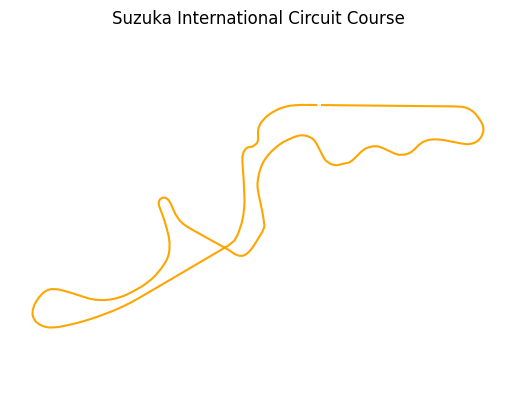

In [4]:
session = ff1.get_session(2025, 3, 'FP1')
session.load()

lap = session.laps.pick_fastest()
pos = lap.get_pos_data()

circuit_info = session.get_circuit_info()
libraryDataF1.draw_track(circuit_info,pos,"Suzuka International Circuit Course")

## Free Practice 1
### Obtain setup

In [92]:
practice = libraryDataF1.obtain_information('laps',session_key=9999)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9999)
drivers = libraryDataF1.obtain_information('drivers',session_key=9999)
libraryDataF1.obtain_drivers_colours(drivers)

In [93]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

### Speed trap
It seems that Mercedes and McLaren set up a car centered a bit on the straights. Sauber, RB and Haas centered on turns but the differerences are not significant. 

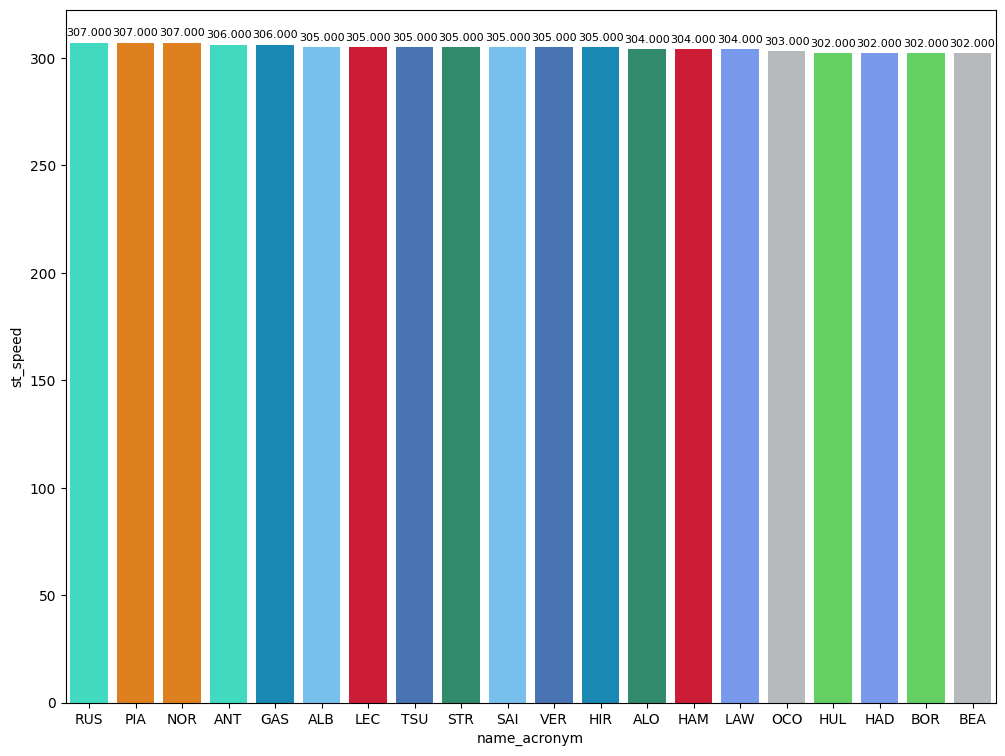

In [95]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

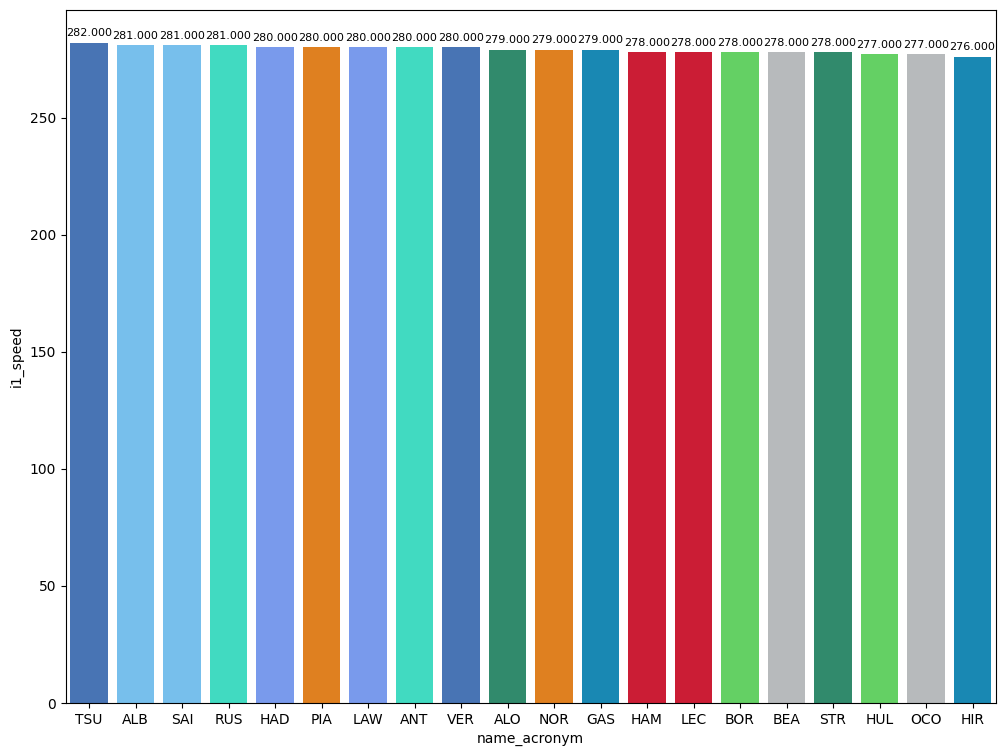

In [96]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

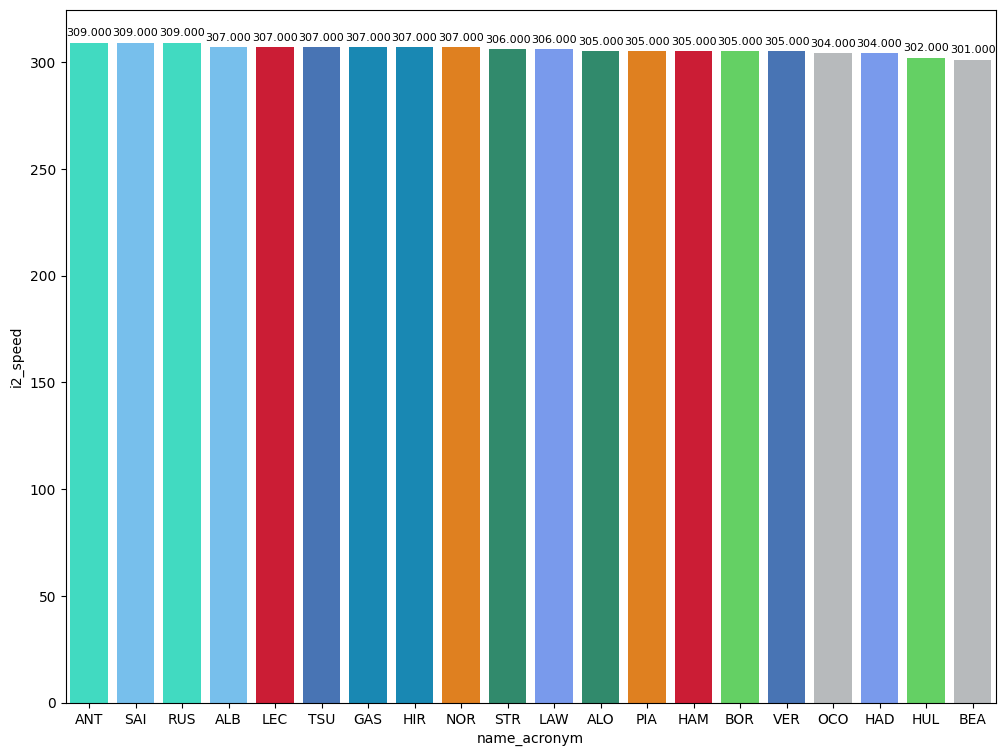

In [97]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session.
There are a big differences in sector 1 and 2 among the tyres. Only in the third sector(1 turn) laptimes are similar 

In [98]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

full_name compound  duration_sector_1  duration_sector_2  \
178    Isack HADJAR     HARD             31.156             40.917   
150  George RUSSELL   MEDIUM             30.986             40.587   
283    Lando NORRIS     SOFT             30.820             40.108   

     duration_sector_3  lap_duration  
178             17.901        89.974  
150             17.603        89.176  
283             17.621        88.549

### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session
Norris was the fastest and Piastri should not have any problem to replicate his pace.
Ferrari and Red Bull will have a fight beetween them.
Alpine, RB and Aston could fight for entering in Q3 but RB was strong than them.
Haas and Sauber will fight for entering in Q2 but they will struggle.

In [99]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


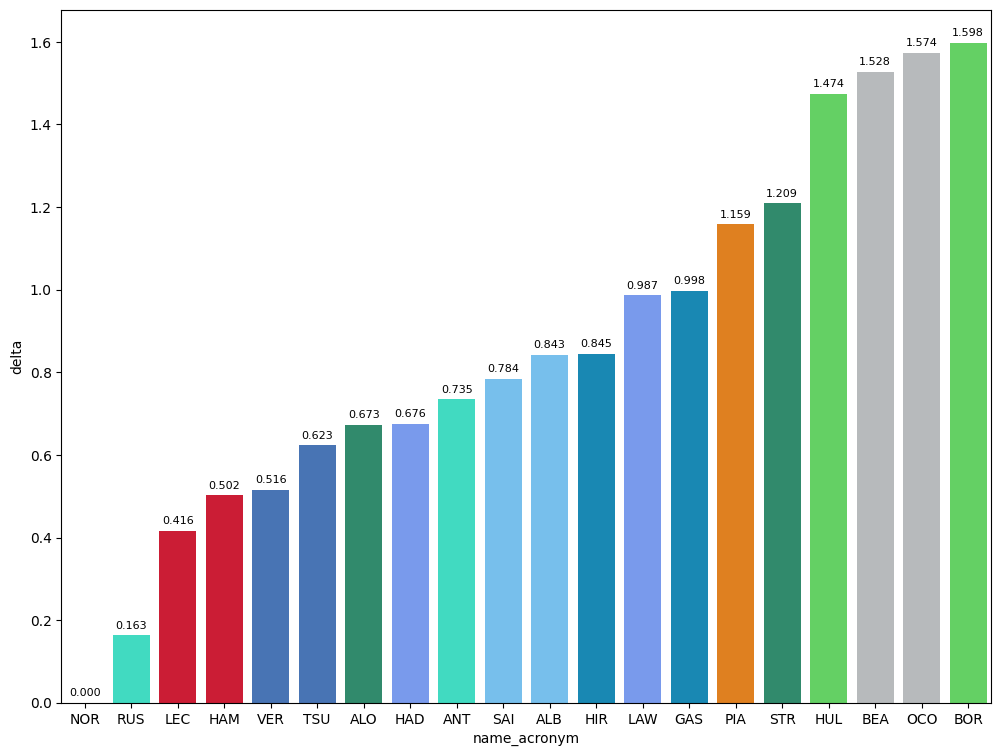

In [100]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector.
S1: Aston wins in the battle of midfield being the fastest and Williams and RB had a similar pace.Sauber could win some positions if BOR replicates HUL pace.
S2:Ferrari and Mercedes are strong here and Red Bull,Alpine,Sauber and Haas could suffer
S3:Red Bull is the strongest here. On the other hand, Racing Bulls could be knocked-out if they dont improve this sector. 

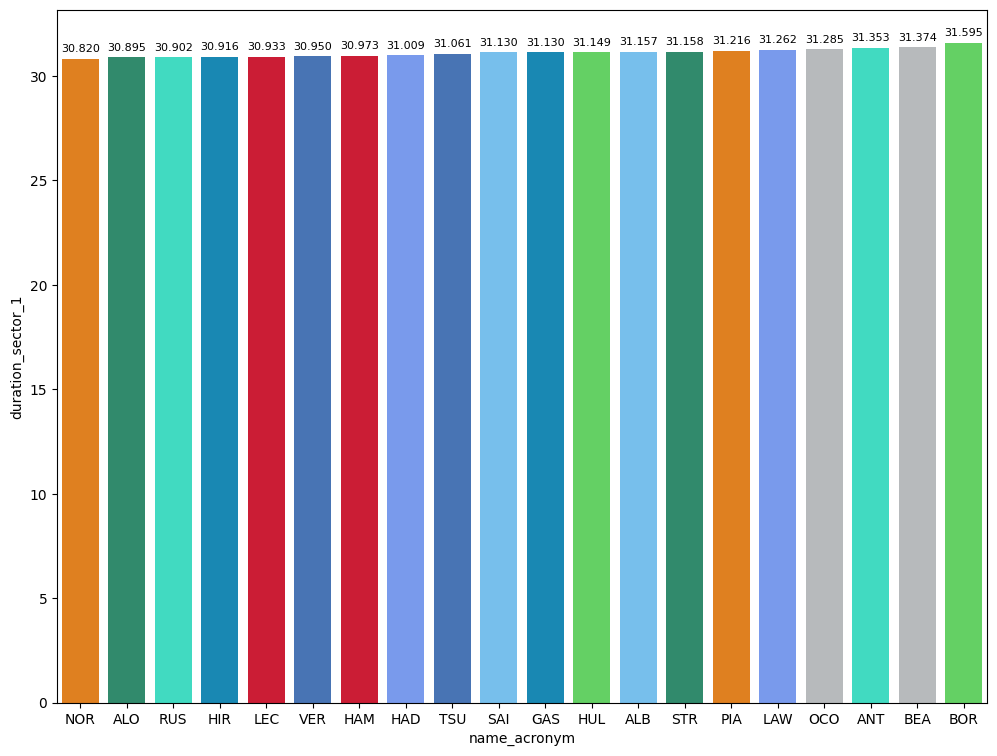

In [101]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace)

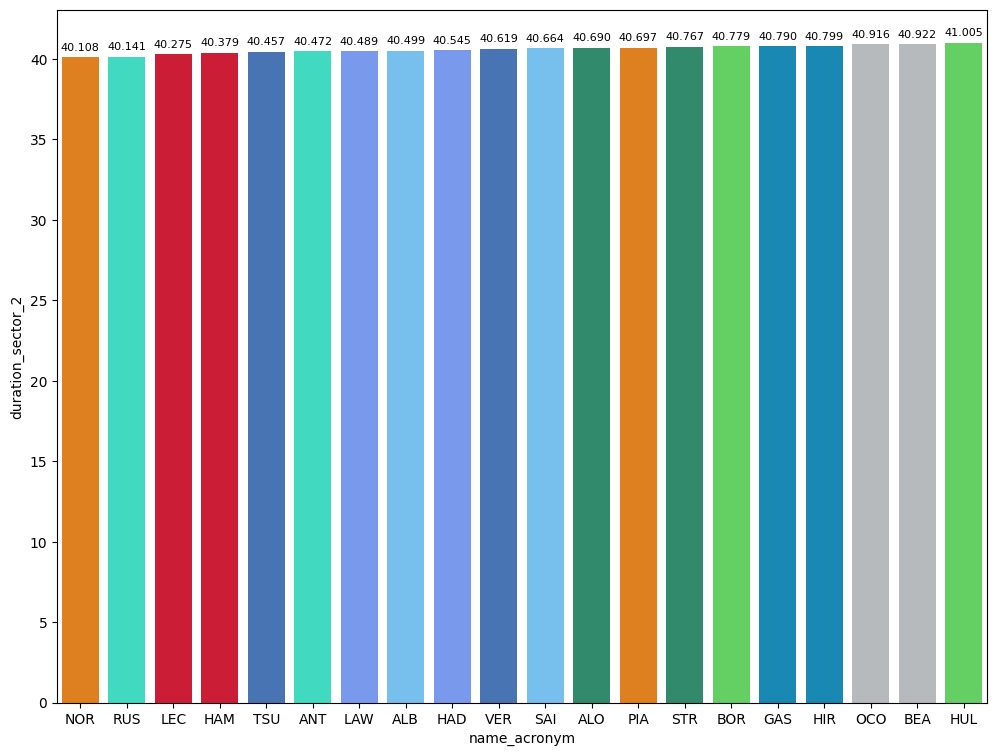

In [102]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace)

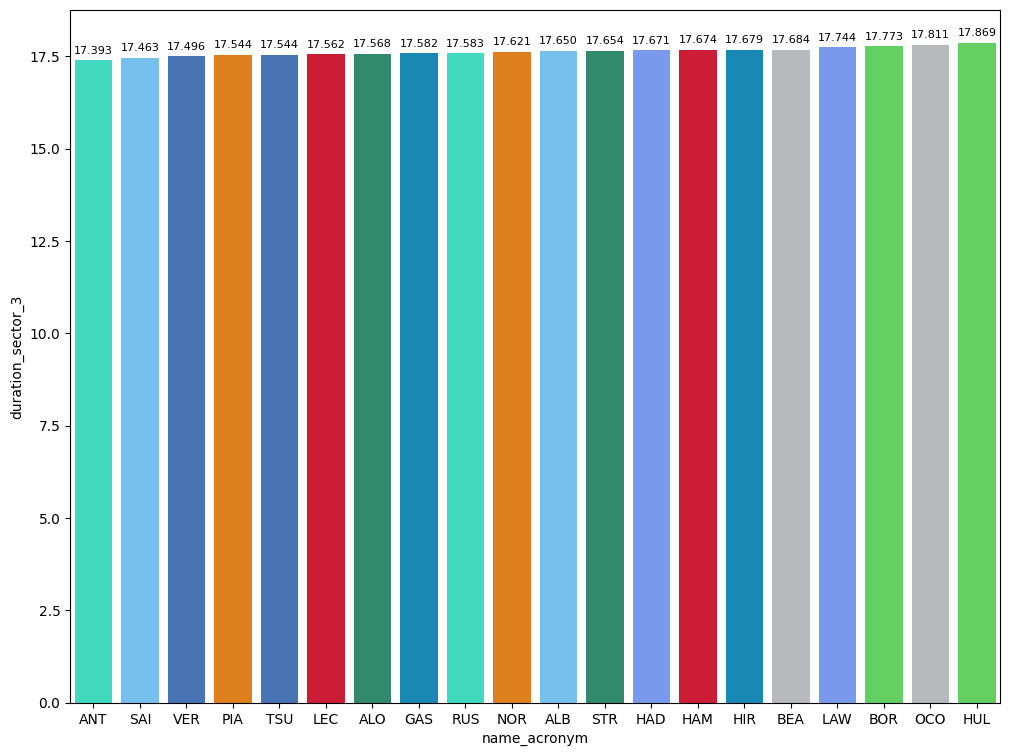

In [103]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace)

### Mean pace with the different compound used on the session

In [104]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False  and lap_duration <= 100").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

lap_duration
compound              
SOFT         92.204233
HARD         92.356029
MEDIUM       93.007146

## Free Practice 2
### Obtain setup

In [105]:
practice = libraryDataF1.obtain_information('laps',session_key=10000)
stintInformation = libraryDataF1.obtain_information('stints',session_key=10000)
drivers = libraryDataF1.obtain_information('drivers',session_key=10000)

In [106]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

### Speed trap

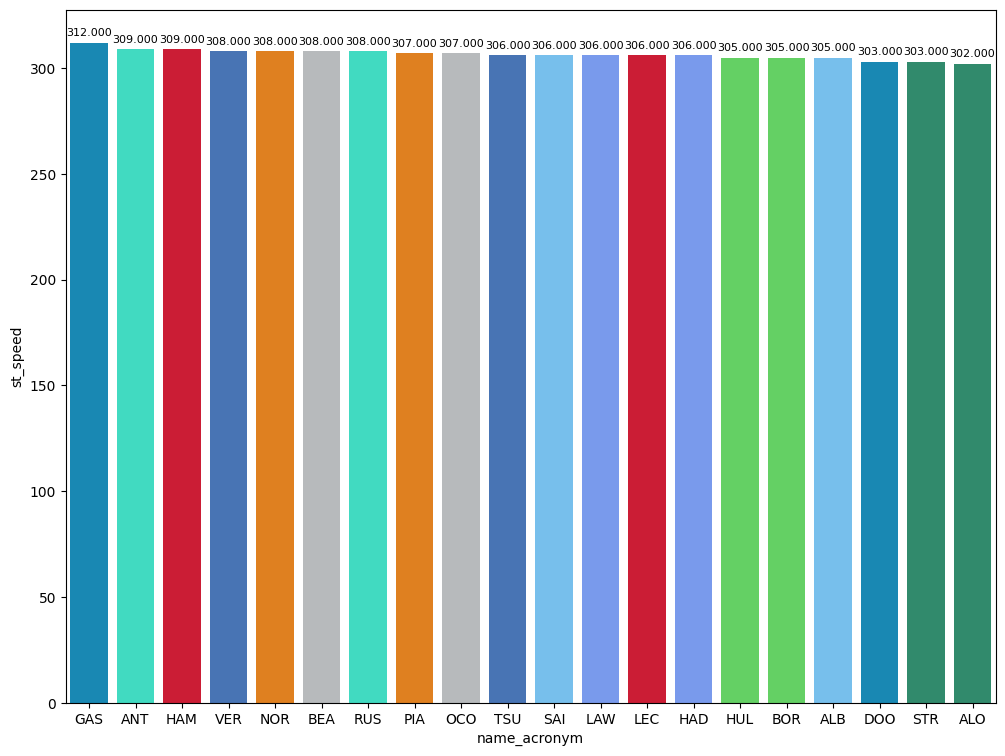

In [107]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

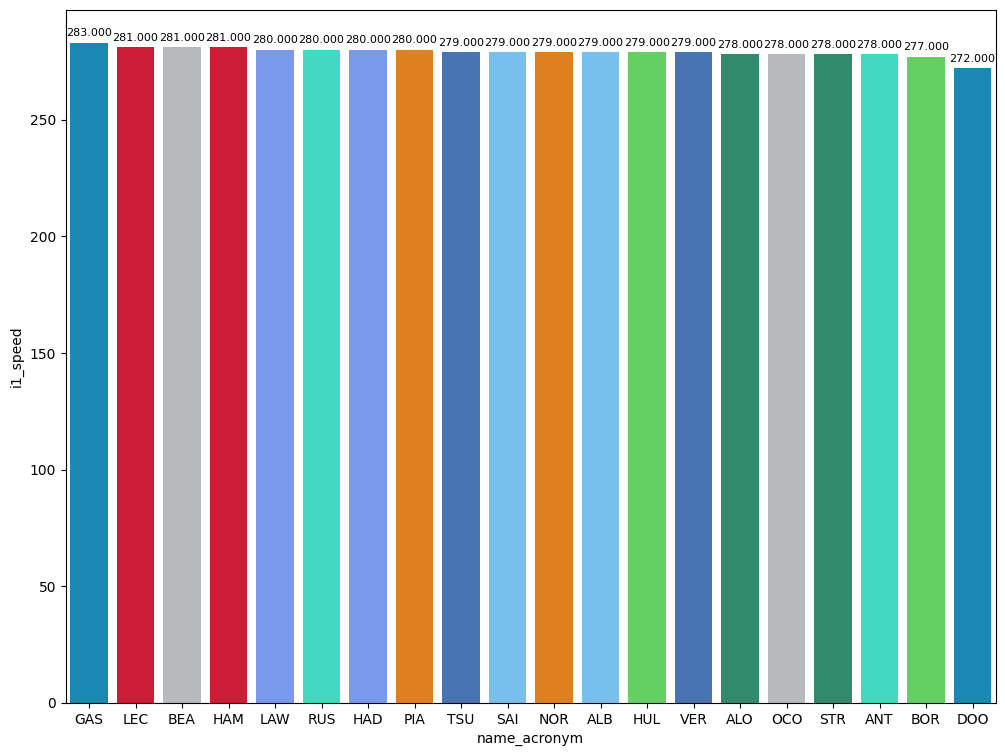

In [108]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

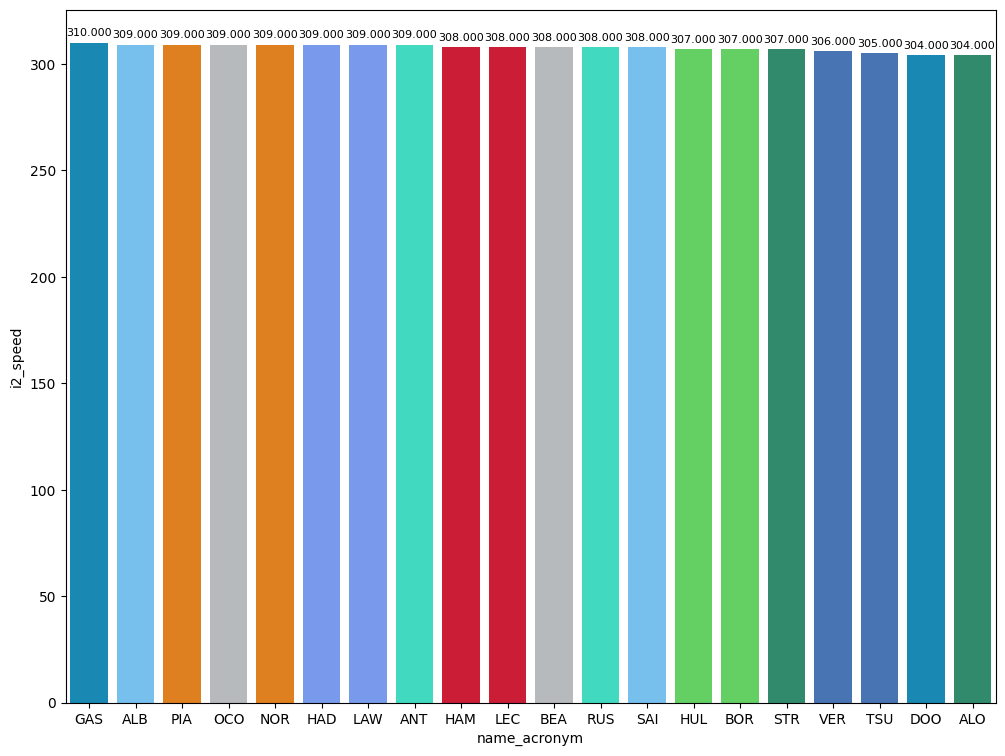

In [109]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [110]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

full_name compound  duration_sector_1  duration_sector_2  \
37   George RUSSELL     HARD             30.948             40.990   
155     Liam LAWSON   MEDIUM             30.919             40.044   
217   Oscar PIASTRI     SOFT             30.713             39.970   

     duration_sector_3  lap_duration  
37              17.728        89.666  
155             17.596        88.559  
217             17.431        88.114

### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session

In [111]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


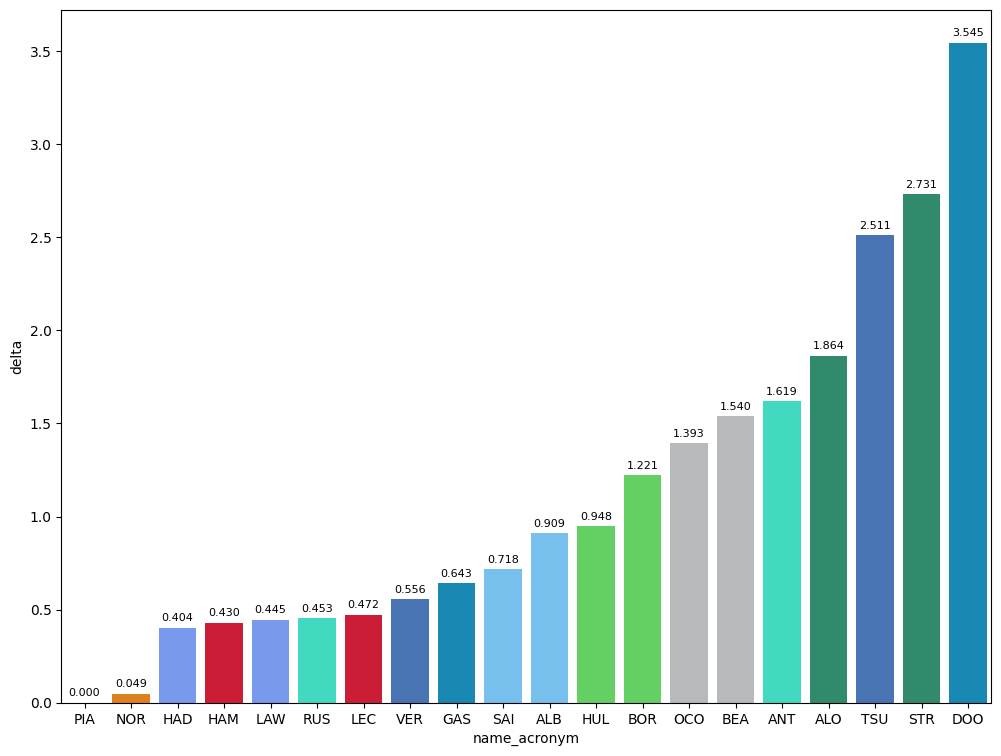

In [112]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector.

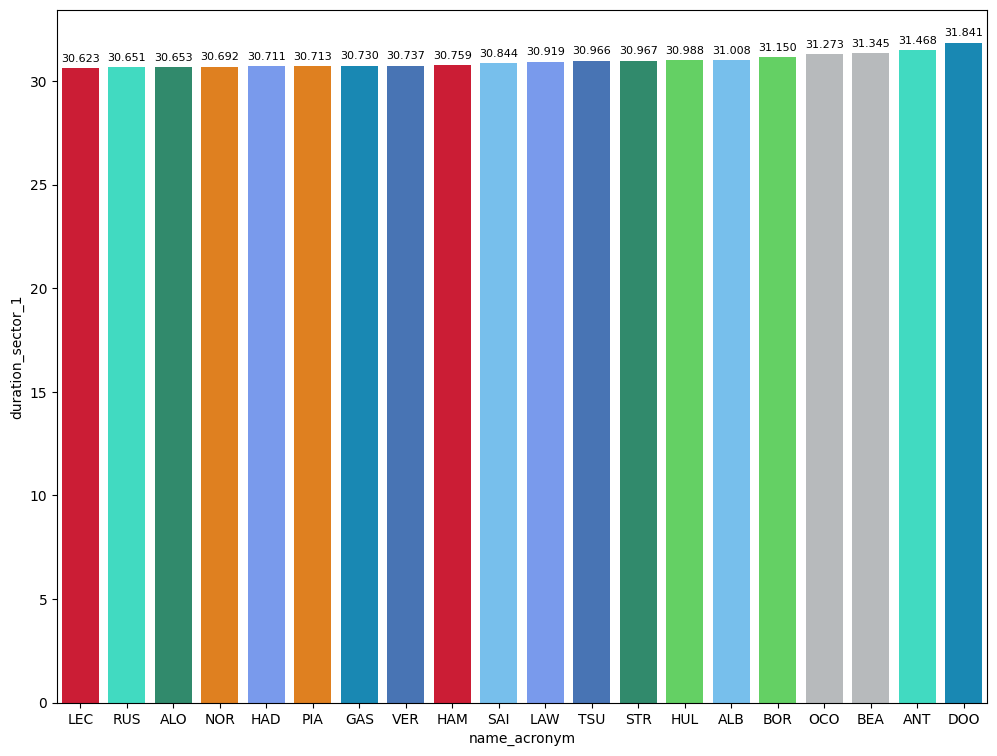

In [113]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace)

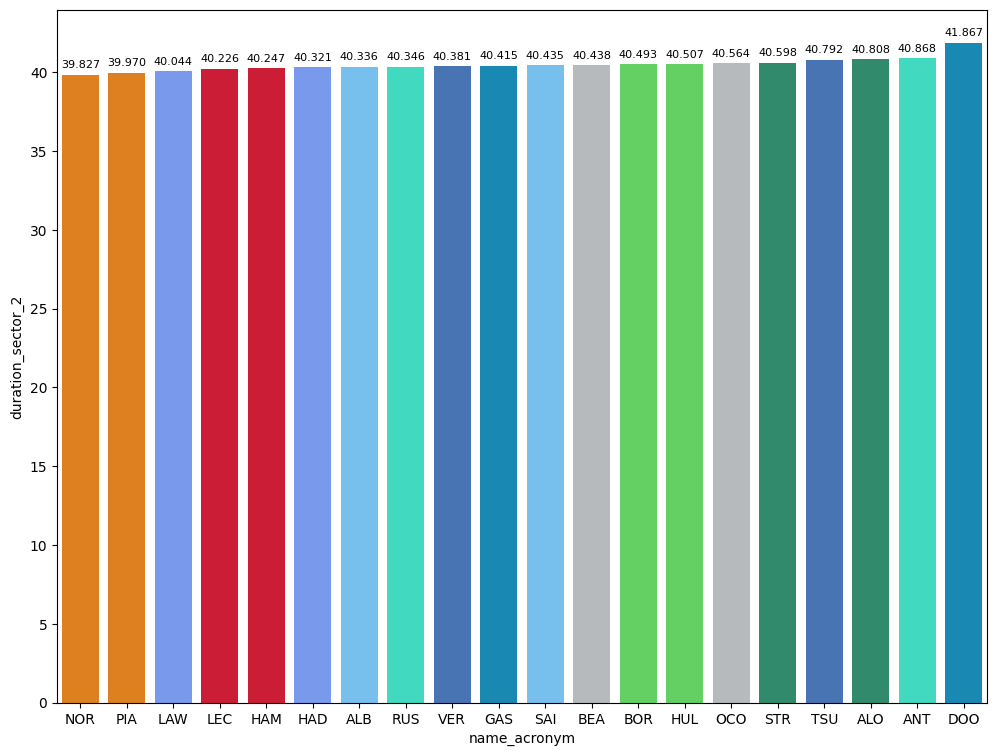

In [114]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace)

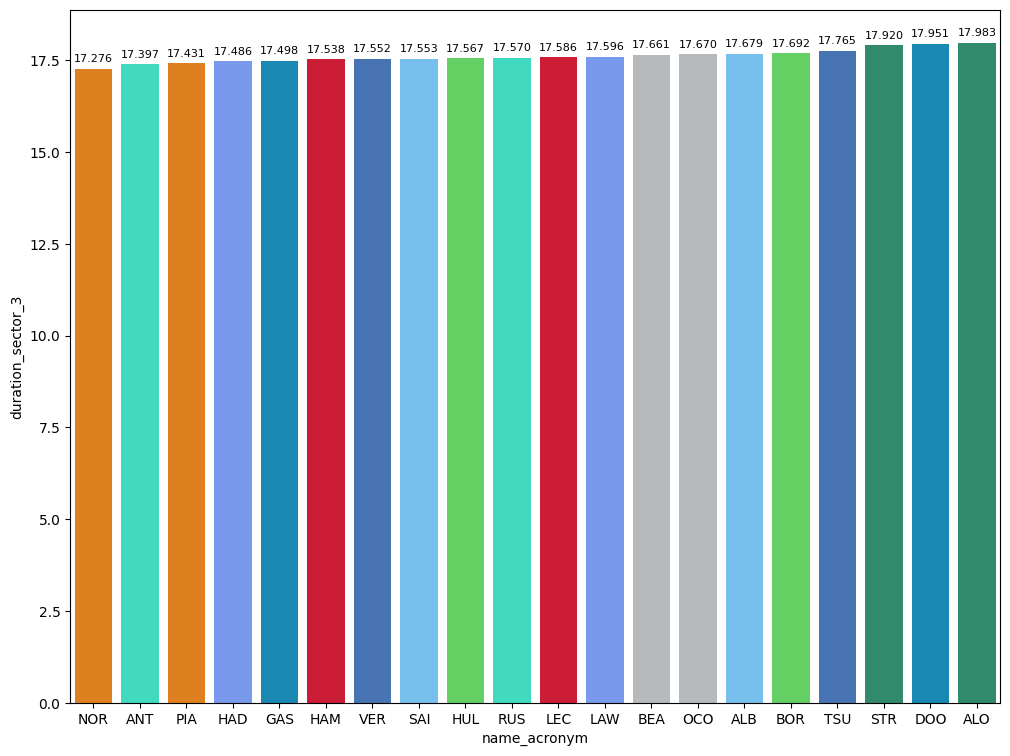

In [115]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace)

### Mean pace with the different compound used on the session

In [116]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False  and lap_duration <= 110").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

lap_duration
compound              
SOFT         90.284765
MEDIUM       92.169720
HARD         93.133000

### Long runs
No data available due to red flags

In [200]:
MINIMUN_SECONDS = 120
MAXIMUM_SECONDS = 130

#### Red Bull Racing

In [201]:
stintInformation.query('driver_number == 1 or driver_number == 30')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
2          1256        10000             1              1          1        4   
13         1256        10000             1             30          1        5   
21         1256        10000             2              1          4        5   
26         1256        10000             3              1          5        7   
41         1256        10000             2             30          6        8   
50         1256        10000             4              1          8       10   
57         1256        10000             3             30          8       11   
71         1256        10000             4             30         11       14   

   compound  tyre_age_at_start  
2    MEDIUM                  0  
13   MEDIUM                  0  
21     SOFT                  0  
26     SOFT                  1  
41   MEDIUM                  3  
50   MEDIUM                  0  
57     SOFT                  0  
71   MEDIUM                  5

In [202]:
data = libraryDataF1.getinfolongruns(jointables2,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [203]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [204]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [205]:
data = libraryDataF1.getinfolongruns(jointables2,30,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [206]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [207]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [208]:
stintInformation.query('driver_number == 55 or driver_number == 16')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
0          1256        10000             1             55          1        2   
18         1256        10000             1             16          1        6   
20         1256        10000             2             55          3        5   
30         1256        10000             3             55          5        8   
40         1256        10000             2             16          6        8   
54         1256        10000             4             55          8       10   
60         1256        10000             3             16          9       12   
75         1256        10000             4             16         12       15   

   compound  tyre_age_at_start  
0      HARD                  0  
18     HARD                  0  
20     SOFT                  0  
30     SOFT                  2  
40     HARD                  4  
54     SOFT                  5  
60     SOFT                  0  
75     SOFT                  3

In [209]:
data = libraryDataF1.getinfolongruns(jointables2,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [210]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [211]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [212]:
data = libraryDataF1.getinfolongruns(jointables2,44,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [213]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [214]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [215]:
stintInformation.query('driver_number == 63 or driver_number == 12')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
4          1256        10000             1             63          1        4   
9          1256        10000             1             12          1        5   
25         1256        10000             2             63          5        6   
27         1256        10000             2             12          5        7   
45         1256        10000             3             63          7        9   
52         1256        10000             3             12          8       10   
67         1256        10000             4             63         10       14   
70         1256        10000             4             12         11       14   

   compound  tyre_age_at_start  
4      HARD                  0  
9      HARD                  0  
25     SOFT                  3  
27     HARD                  3  
45     SOFT                  0  
52     SOFT                  0  
67     HARD                  5  
70     HARD                  0

In [216]:
data = libraryDataF1.getinfolongruns(jointables2,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [217]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [218]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [219]:
data = libraryDataF1.getinfolongruns(jointables2,12,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [220]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [221]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [222]:
stintInformation.query('driver_number == 81 or driver_number == 4')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
1          1256        10000             1              4          1        3   
16         1256        10000             1             81          1        5   
22         1256        10000             2              4          4        5   
29         1256        10000             2             81          5        7   
31         1256        10000             3              4          6        6   
43         1256        10000             4              4          7        9   
55         1256        10000             3             81          8       10   
62         1256        10000             5              4         10       13   
73         1256        10000             4             81         11       14   

   compound  tyre_age_at_start  
1    MEDIUM                  0  
16     HARD                  0  
22   MEDIUM                  0  
29     HARD                  0  
31     SOFT                  0  
43     SOFT                  1  
55     SOFT                  0  
62     SOFT                  4  
73     SOFT                  6

In [223]:
data = libraryDataF1.getinfolongruns(jointables2,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [224]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [225]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [226]:
data = libraryDataF1.getinfolongruns(jointables2,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [227]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [228]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [229]:
stintInformation.query('driver_number == 18 or driver_number == 14')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
3          1256        10000             1             14          1        4   
10         1256        10000             1             18          1        5   
24         1256        10000             2             14          5        6   
28         1256        10000             2             18          5        7   
47         1256        10000             3             18          7       10   
64         1256        10000             4             18         10       13   

   compound  tyre_age_at_start  
3    MEDIUM                  0  
10   MEDIUM                  0  
24     SOFT                  0  
28     SOFT                  0  
47     SOFT                  2  
64     SOFT                  5

In [230]:
data = libraryDataF1.getinfolongruns(jointables2,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [231]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [232]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [233]:
data = libraryDataF1.getinfolongruns(jointables2,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [234]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [235]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Racing Bulls

In [236]:
stintInformation.query('driver_number == 6 or driver_number == 22')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
6          1256        10000             1              6          1        5   
11         1256        10000             1             22          1        5   
32         1256        10000             2              6          6        6   
36         1256        10000             2             22          6        7   
46         1256        10000             3              6          7       10   
48         1256        10000             3             22          8        9   
63         1256        10000             4              6         10       13   
65         1256        10000             4             22         10       13   

   compound  tyre_age_at_start  
6    MEDIUM                  0  
11   MEDIUM                  0  
32   MEDIUM                  0  
36     SOFT                  0  
46     SOFT                  0  
48   MEDIUM                  4  
63   MEDIUM                  4  
65   MEDIUM                  6

In [237]:
data = libraryDataF1.getinfolongruns(jointables2,6,'Racing Bulls',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [238]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [239]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [240]:
data = libraryDataF1.getinfolongruns(jointables2,22,'Racing Bulls',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [241]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [242]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [243]:
stintInformation.query('driver_number == 87 or driver_number == 31')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
5          1256        10000             1             87          1        4   
14         1256        10000             1             31          1        5   
23         1256        10000             2             87          5        5   
38         1256        10000             2             31          6        7   
42         1256        10000             3             87          6        8   
58         1256        10000             3             31          8       11   
59         1256        10000             4             87          8       11   
72         1256        10000             4             31         11       14   

   compound  tyre_age_at_start  
5    MEDIUM                  0  
14   MEDIUM                  0  
23     SOFT                  0  
38     SOFT                  0  
42     SOFT                  1  
58     SOFT                  2  
59   MEDIUM                  3  
72   MEDIUM                  4

In [244]:
data = libraryDataF1.getinfolongruns(jointables2,87,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [245]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [246]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [247]:
data = libraryDataF1.getinfolongruns(jointables2,31,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [248]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [249]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [250]:
stintInformation.query('driver_number == 10 or driver_number == 7')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
7          1256        10000             1              7          1        5   
8          1256        10000             1             10          1        5   
35         1256        10000             2             10          6        7   
51         1256        10000             3             10          8       10   
69         1256        10000             4             10         11       14   

   compound  tyre_age_at_start  
7      HARD                  0  
8      HARD                  0  
35     SOFT                  0  
51     SOFT                  2  
69     SOFT                  5

In [251]:
data =libraryDataF1.getinfolongruns(jointables2,7,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [252]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [253]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [254]:
data = libraryDataF1.getinfolongruns(jointables2,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [255]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [256]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [257]:
stintInformation.query('driver_number == 55 or driver_number == 23')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
0          1256        10000             1             55          1        2   
19         1256        10000             1             23          1        6   
20         1256        10000             2             55          3        5   
30         1256        10000             3             55          5        8   
37         1256        10000             2             23          6        7   
49         1256        10000             3             23          8        9   
54         1256        10000             4             55          8       10   
61         1256        10000             4             23          9       12   

   compound  tyre_age_at_start  
0      HARD                  0  
19     HARD                  0  
20     SOFT                  0  
30     SOFT                  2  
37     SOFT                  0  
49     SOFT                  0  
54     SOFT                  5  
61     SOFT                  3

In [258]:
data = libraryDataF1.getinfolongruns(jointables2,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [259]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [260]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [261]:
data= libraryDataF1.getinfolongruns(jointables2,55,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [262]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [263]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [264]:
stintInformation.query('driver_number == 5 or driver_number == 27')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
12         1256        10000             1             27          1        5   
17         1256        10000             1              5          1        6   
33         1256        10000             2             27          6        6   
34         1256        10000             2              5          6        7   
44         1256        10000             3             27          7        9   
56         1256        10000             3              5          8       11   
66         1256        10000             4             27         10       13   
68         1256        10000             4              5         11       14   

   compound  tyre_age_at_start  
12     HARD                  0  
17   MEDIUM                  0  
33     SOFT                  0  
34     SOFT                  0  
44     SOFT                  1  
56   MEDIUM                  2  
66     HARD                  4  
68   MEDIUM                  4

In [265]:
data = libraryDataF1.getinfolongruns(jointables2,5,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [266]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [267]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [268]:
data = libraryDataF1.getinfolongruns(jointables2,27,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [269]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [270]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Long runs mean for each driver

In [271]:
longrun_data = libraryDataF1.obtainLongRunData(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Sorted by lap duration
Only Mercedes and Red Bull did long stints. Red Bull had a poor pace and they had some problems in sector 2 with the degradation. On the other hand, Mercedes was faster in general but they had degradation in sector 3.
Haas suffered in the first sector.


In [272]:
sorted_laps = pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3'])

In [273]:
sorted_laps.sort_values(by='lap_duration',ascending=True)

Empty DataFrame
Columns: [driver, compound, lap_duration, sector1, sector2, sector3]
Index: []

##### Sorted by sector 1
Piastri and Hamilton are strong in this sector being the  leaders of their teams. Also Alonso is strong and this could help him to win some positions. Red Bull will suffer on race.

In [274]:
sorted_laps.sort_values(by='sector1',ascending=True)[['driver','compound','sector1']]

Empty DataFrame
Columns: [driver, compound, sector1]
Index: []

##### Sorted by sector 2
Ferrari is strong here so it could make sense to say that the car is focused on turns. Racing Bulls were fast here so it could help to make overcuts on race.

In [275]:
sorted_laps.sort_values(by='sector2',ascending=True)[['driver','compound','sector2']]

Empty DataFrame
Columns: [driver, compound, sector2]
Index: []

##### Sorted by sector 3
McLaren was the best here and if they take advantage this sector, they could extend the gap on race. Alpine could gain some positions thanks to the focus on the straight. Red Bull will suffer here.

In [276]:
sorted_laps.sort_values(by='sector3',ascending=True)[['driver','compound','sector3']]

Empty DataFrame
Columns: [driver, compound, sector3]
Index: []

#### Long runs mean

In [277]:
longruns_summary = libraryDataF1.obtainMeanLongRuns(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Mean pace per compound

In [279]:
#libraryDataF1.showDataLongRuns(longruns_summary,"MEDIUM","mean_lap_time",['driver','mean_lap_time'])

In [ ]:
#libraryDataF1.showDataLongRuns(longruns_summary,"SOFT","mean_lap_time",['driver','mean_lap_time'])

In [ ]:
#libraryDataF1.showDataLongRuns(longruns_summary,"HARD","mean_lap_time",['driver','mean_lap_time'])

## Free Practice 3
### Obtain setup

In [3]:
practice = libraryDataF1.obtain_information('laps',session_key=10001)
stintInformation = libraryDataF1.obtain_information('stints',session_key=10001)
drivers = libraryDataF1.obtain_information('drivers',session_key=10001)

In [4]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

In [5]:
session = ff1.get_session(2025, 3, 'FP3')
session.load();

req         WARNING 	DEFAULT CACHE ENABLED! (3.36 GB) /home/frank/.cache/fastf1
core           INFO 	Loading data for Japanese Grand Prix - Practice 3 [v3.3.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '5', '6', '7', '10', 

In [6]:
# practice = pd.DataFrame(session.laps)

In [7]:
# practice['duration_sector_1']= practice.Sector1Time.dt.total_seconds()
# practice['duration_sector_2']= practice.Sector2Time.dt.total_seconds()
# practice['duration_sector_3']= practice.Sector3Time.dt.total_seconds()
# practice['lap_duration']= practice.LapTime.dt.total_seconds()
# practice['driver_number'] = practice.DriverNumber
# practice['i1_speed'] = practice.SpeedI1
# practice['i2_speed'] = practice.SpeedI2
# practice['st_speed'] = practice.SpeedFL
# practice['lap_number'] = practice.LapNumber

In [8]:
# stintInformation =pd.read_excel("stintsFP3.xlsx")
# drivers = pd.read_excel("e.xlsx")

In [9]:
# drivers.loc[drivers['last_name']=="Bortoleto",'team_colour'] = '52E253'
# drivers.loc[drivers['last_name']=="Hulkenberg",'team_colour'] = '52E253'

In [ ]:
# practice = practice[['duration_sector_1','duration_sector_2','duration_sector_3','lap_duration','driver_number','i1_speed','i2_speed','st_speed','lap_number']]

In [10]:
# stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
# jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
# libraryDataF1.obtain_drivers_colours(drivers)

### Speed trap

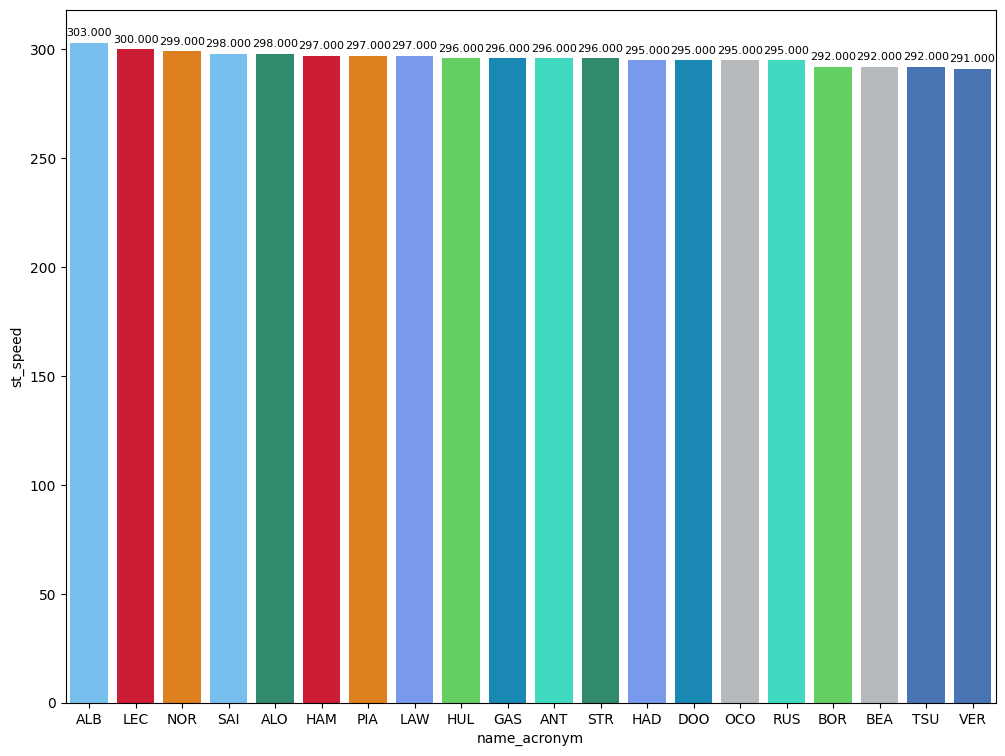

In [11]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

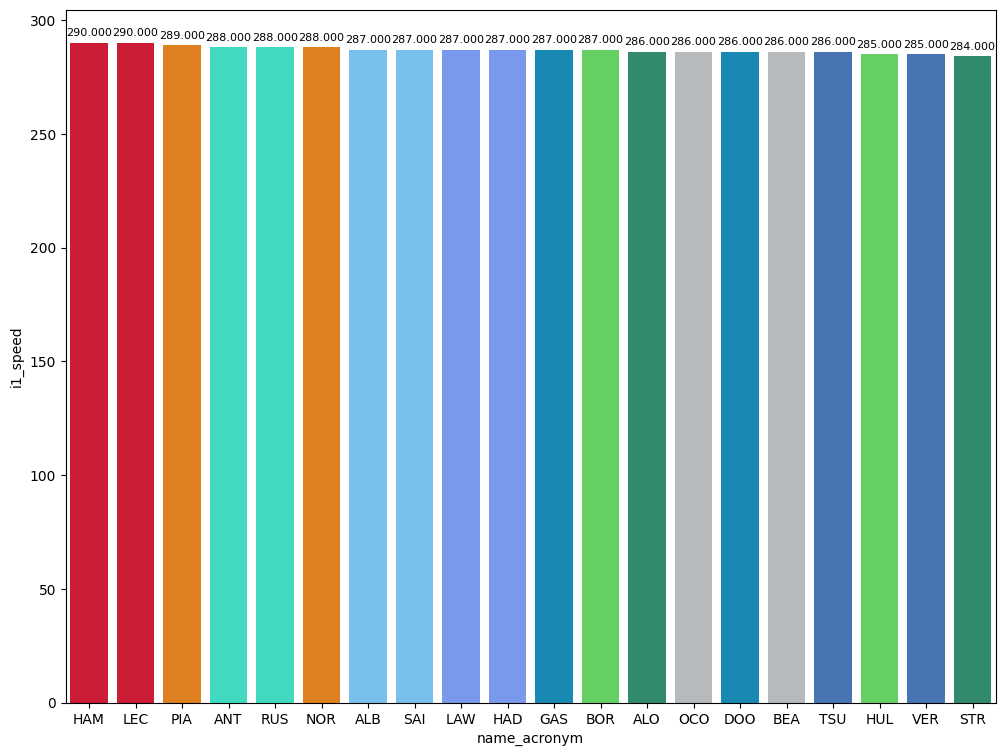

In [12]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

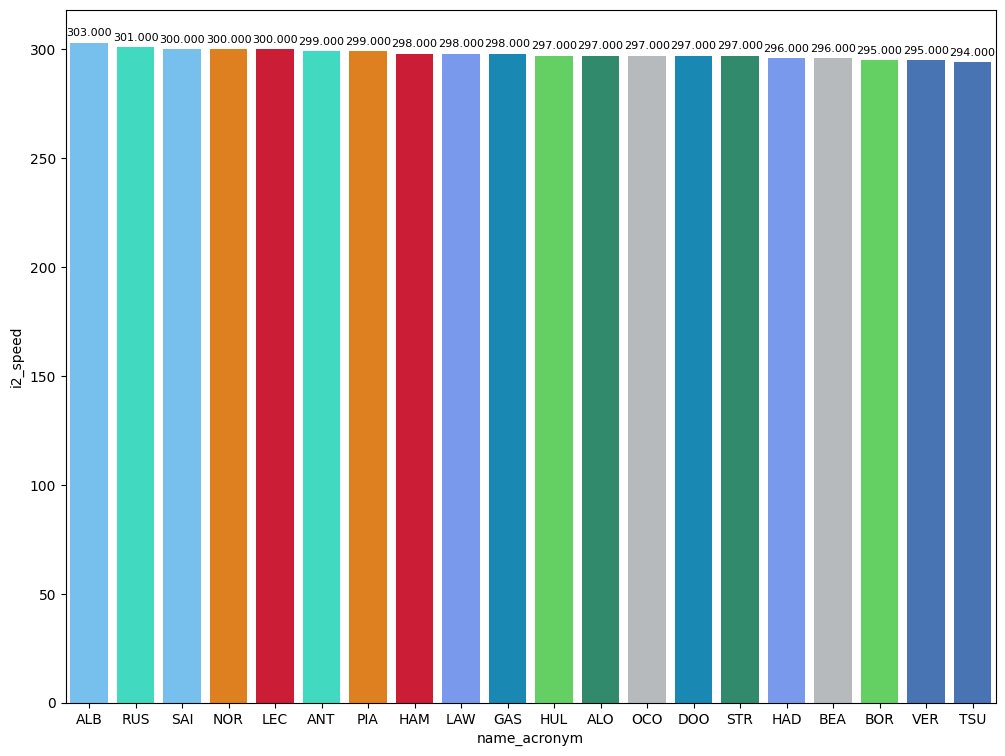

In [13]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [14]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

full_name compound  duration_sector_1  duration_sector_2  \
181  Yuki TSUNODA     HARD             31.294             40.422   
304   Liam LAWSON   MEDIUM             31.190             40.371   
306  Lando NORRIS     SOFT             30.501             39.951   

     duration_sector_3  lap_duration  
181             17.690        89.406  
304             17.543        89.104  
306             17.513        87.965

### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session

In [15]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


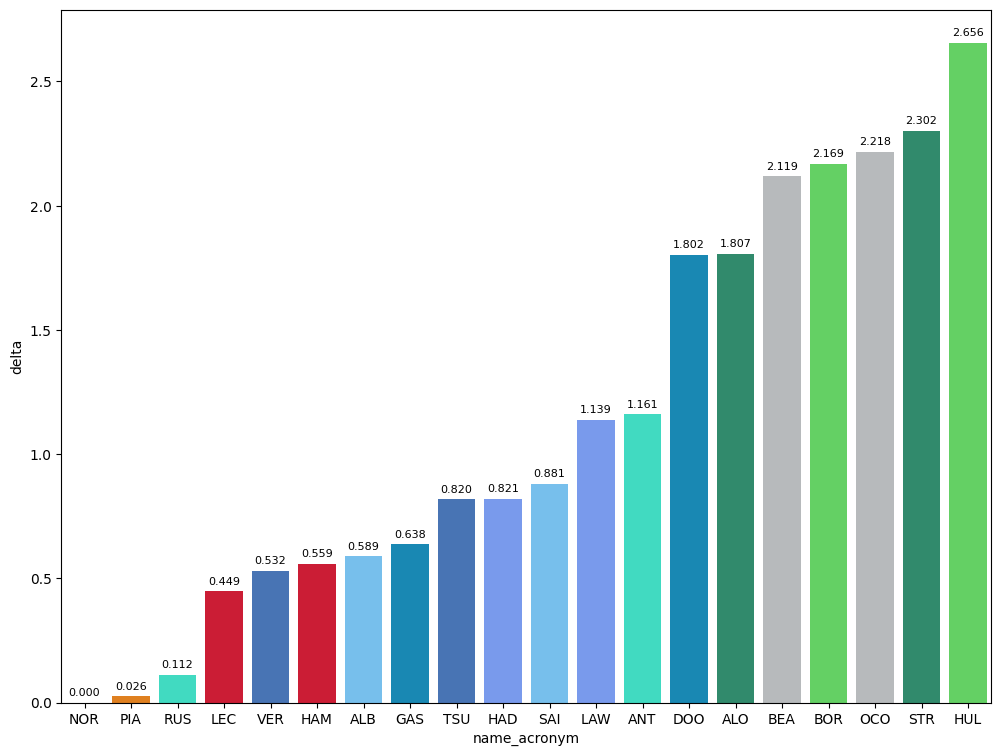

In [16]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector.

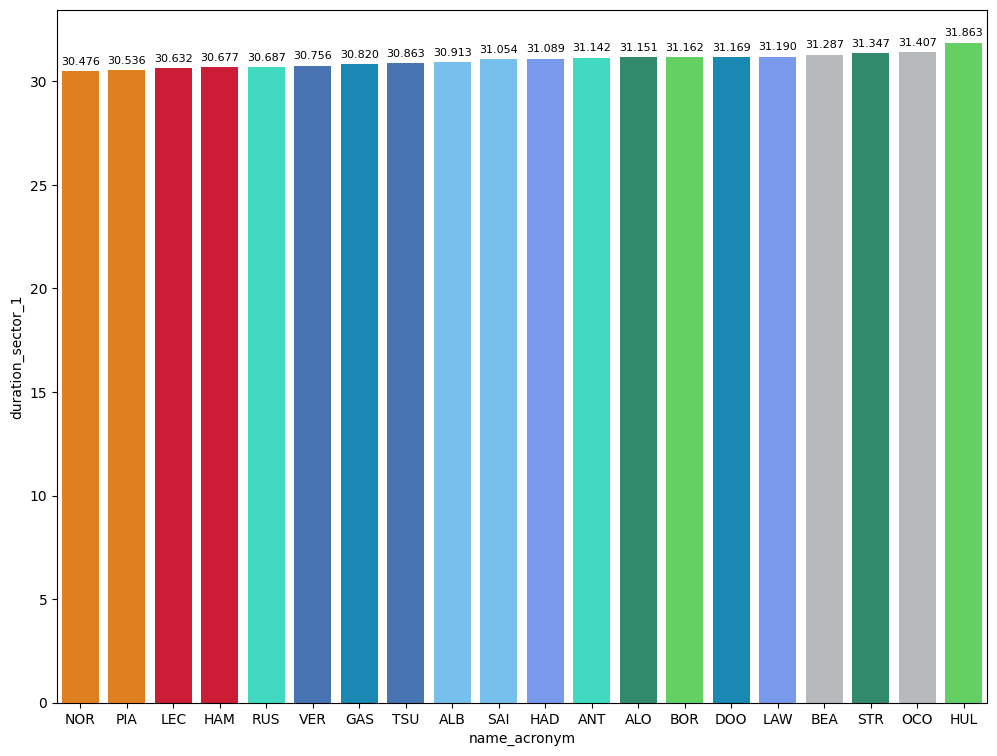

In [17]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace)

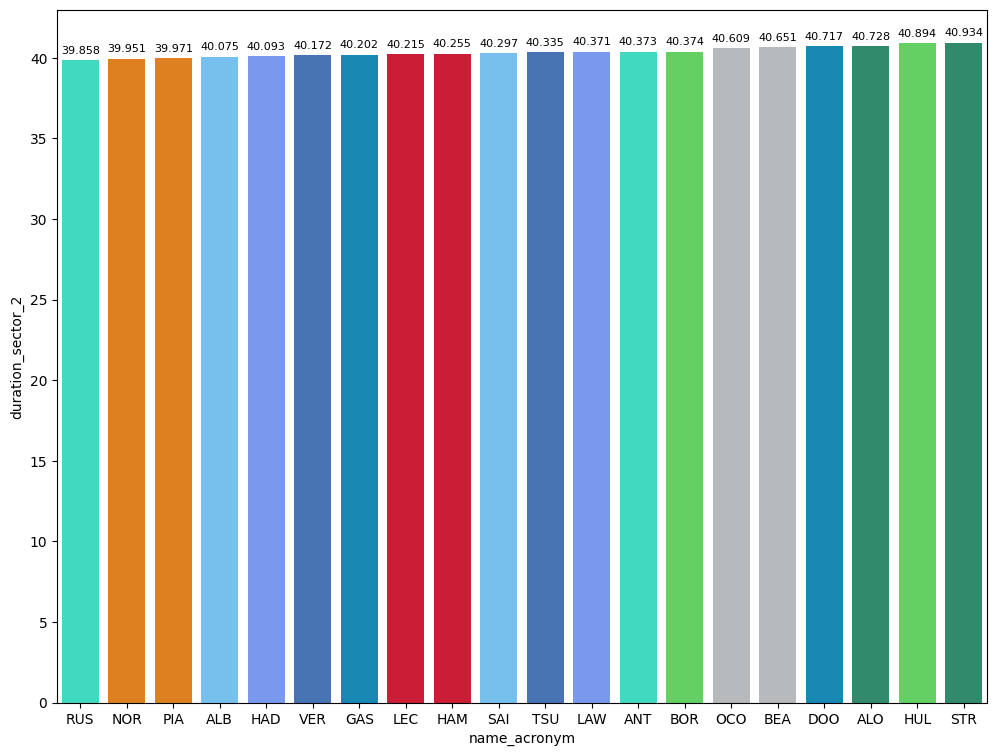

In [18]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace)

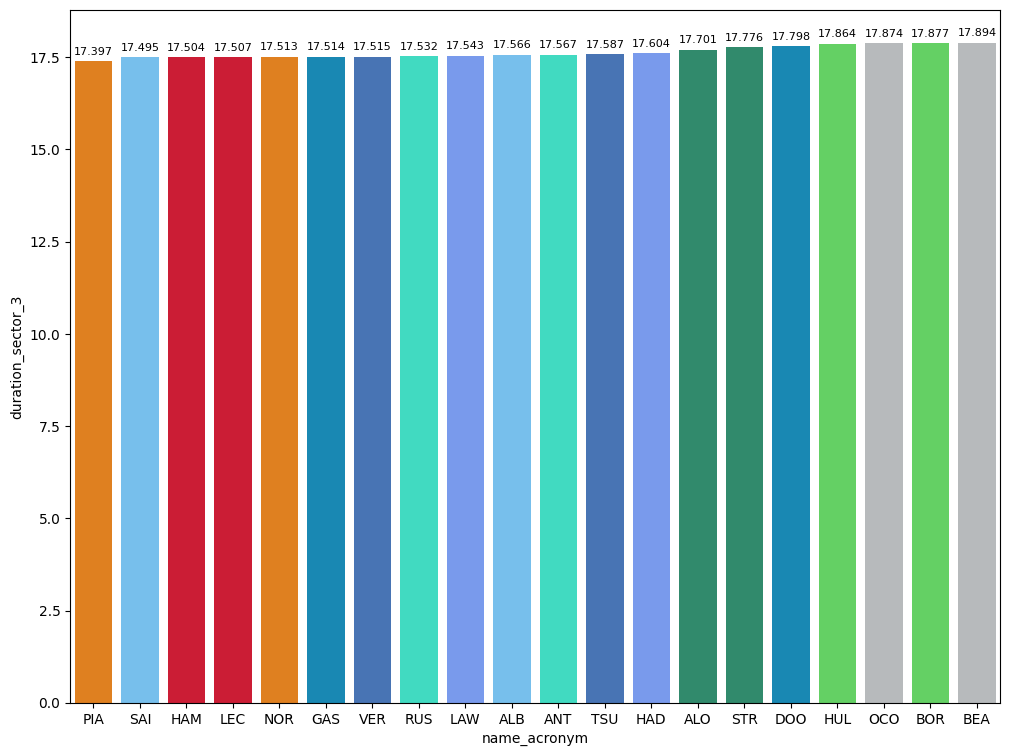

In [19]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace)

### Mean pace with the different compound used on the session

In [20]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False  and lap_duration <= 95").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

lap_duration
compound              
SOFT         89.418795
MEDIUM       91.946566
HARD         92.768846

### Long runs

In [21]:
MINIMUN_SECONDS = 92
MAXIMUM_SECONDS = 95

#### Red Bull Racing

In [22]:
stintInformation.query('driver_number == 1 or driver_number == 30')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
15         1256        10001             1             30          1        4   
17         1256        10001             1              1          1        5   
37         1256        10001             2             30          5        7   
42         1256        10001             2              1          6       16   
52         1256        10001             3             30          8       18   
76         1256        10001             3              1         17       19   
80         1256        10001             4             30         18       20   
81         1256        10001             4              1         20       22   

   compound  tyre_age_at_start  
15   MEDIUM                  0  
17     HARD                  0  
37   MEDIUM                  3  
42     HARD                  4  
52   MEDIUM                  0  
76     SOFT                  0  
80     SOFT                  0  
81     SOFT                  3

In [23]:
data = libraryDataF1.getinfolongruns(jointables2,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
75   Max VERSTAPPEN     HARD  2025-04-05T02:47:51.106000+00:00           6   
92   Max VERSTAPPEN     HARD  2025-04-05T02:49:25.454000+00:00           7   
103  Max VERSTAPPEN     HARD  2025-04-05T02:50:59.910000+00:00           8   
118  Max VERSTAPPEN     HARD  2025-04-05T02:52:33.758000+00:00           9   
126  Max VERSTAPPEN     HARD  2025-04-05T02:54:07.890000+00:00          10   
142  Max VERSTAPPEN     HARD         2025-04-05T02:55:42+00:00          11   
164  Max VERSTAPPEN     HARD  2025-04-05T02:58:53.905000+00:00          13   
176  Max VERSTAPPEN     HARD  2025-04-05T03:00:27.456000+00:00          14   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
75              33.698             42.235             18.371        94.304  
92              33.657             42.388             18.389        94.434  
103             33.340             42.352             18.247        93.939  
118             33.534             42.350             18.209        94.093  
126             33.173             42.383             18.610        94.166  
142             33.061             42.577             18.285        93.923  
164             32.965             42.370             18.216        93.551  
176             33.090             42.493             18.299        93.882

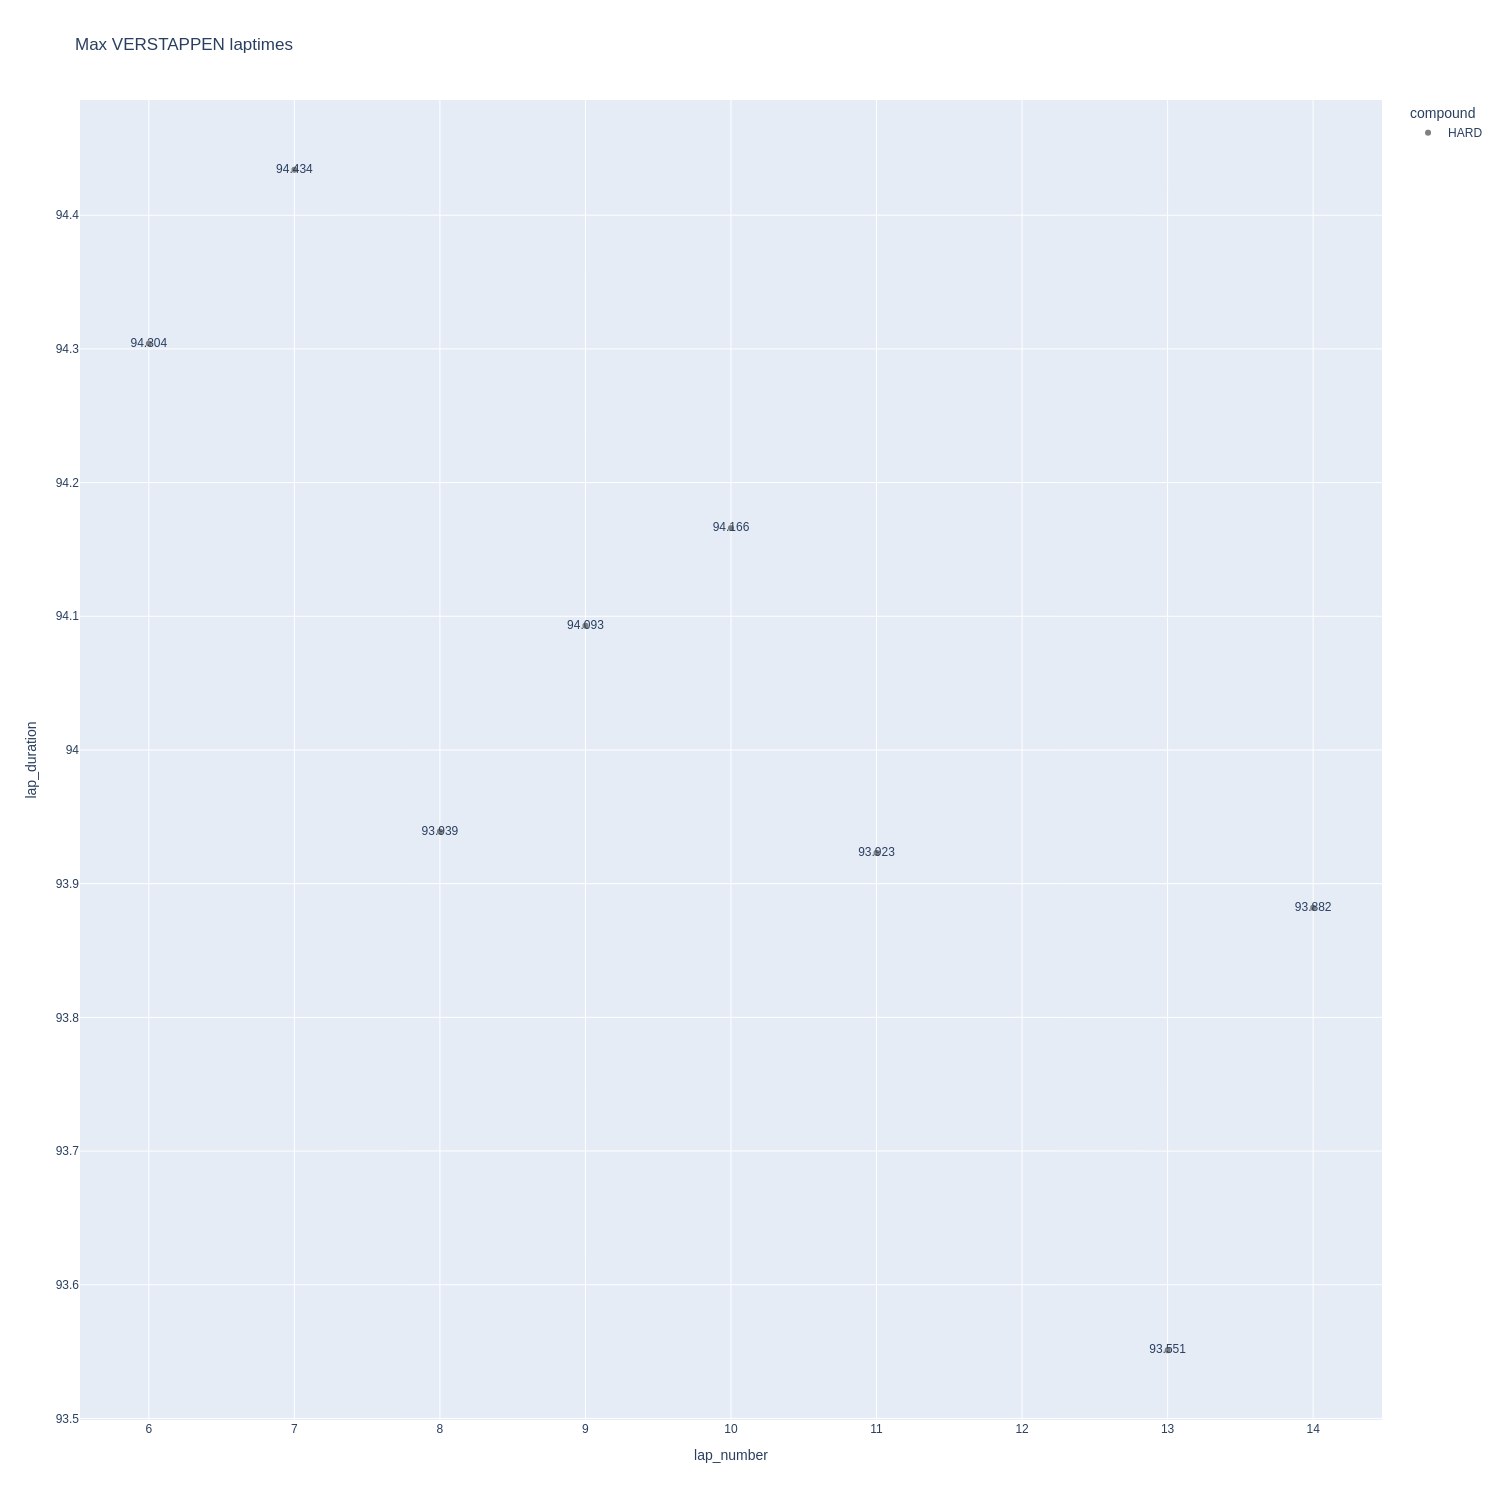

In [24]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

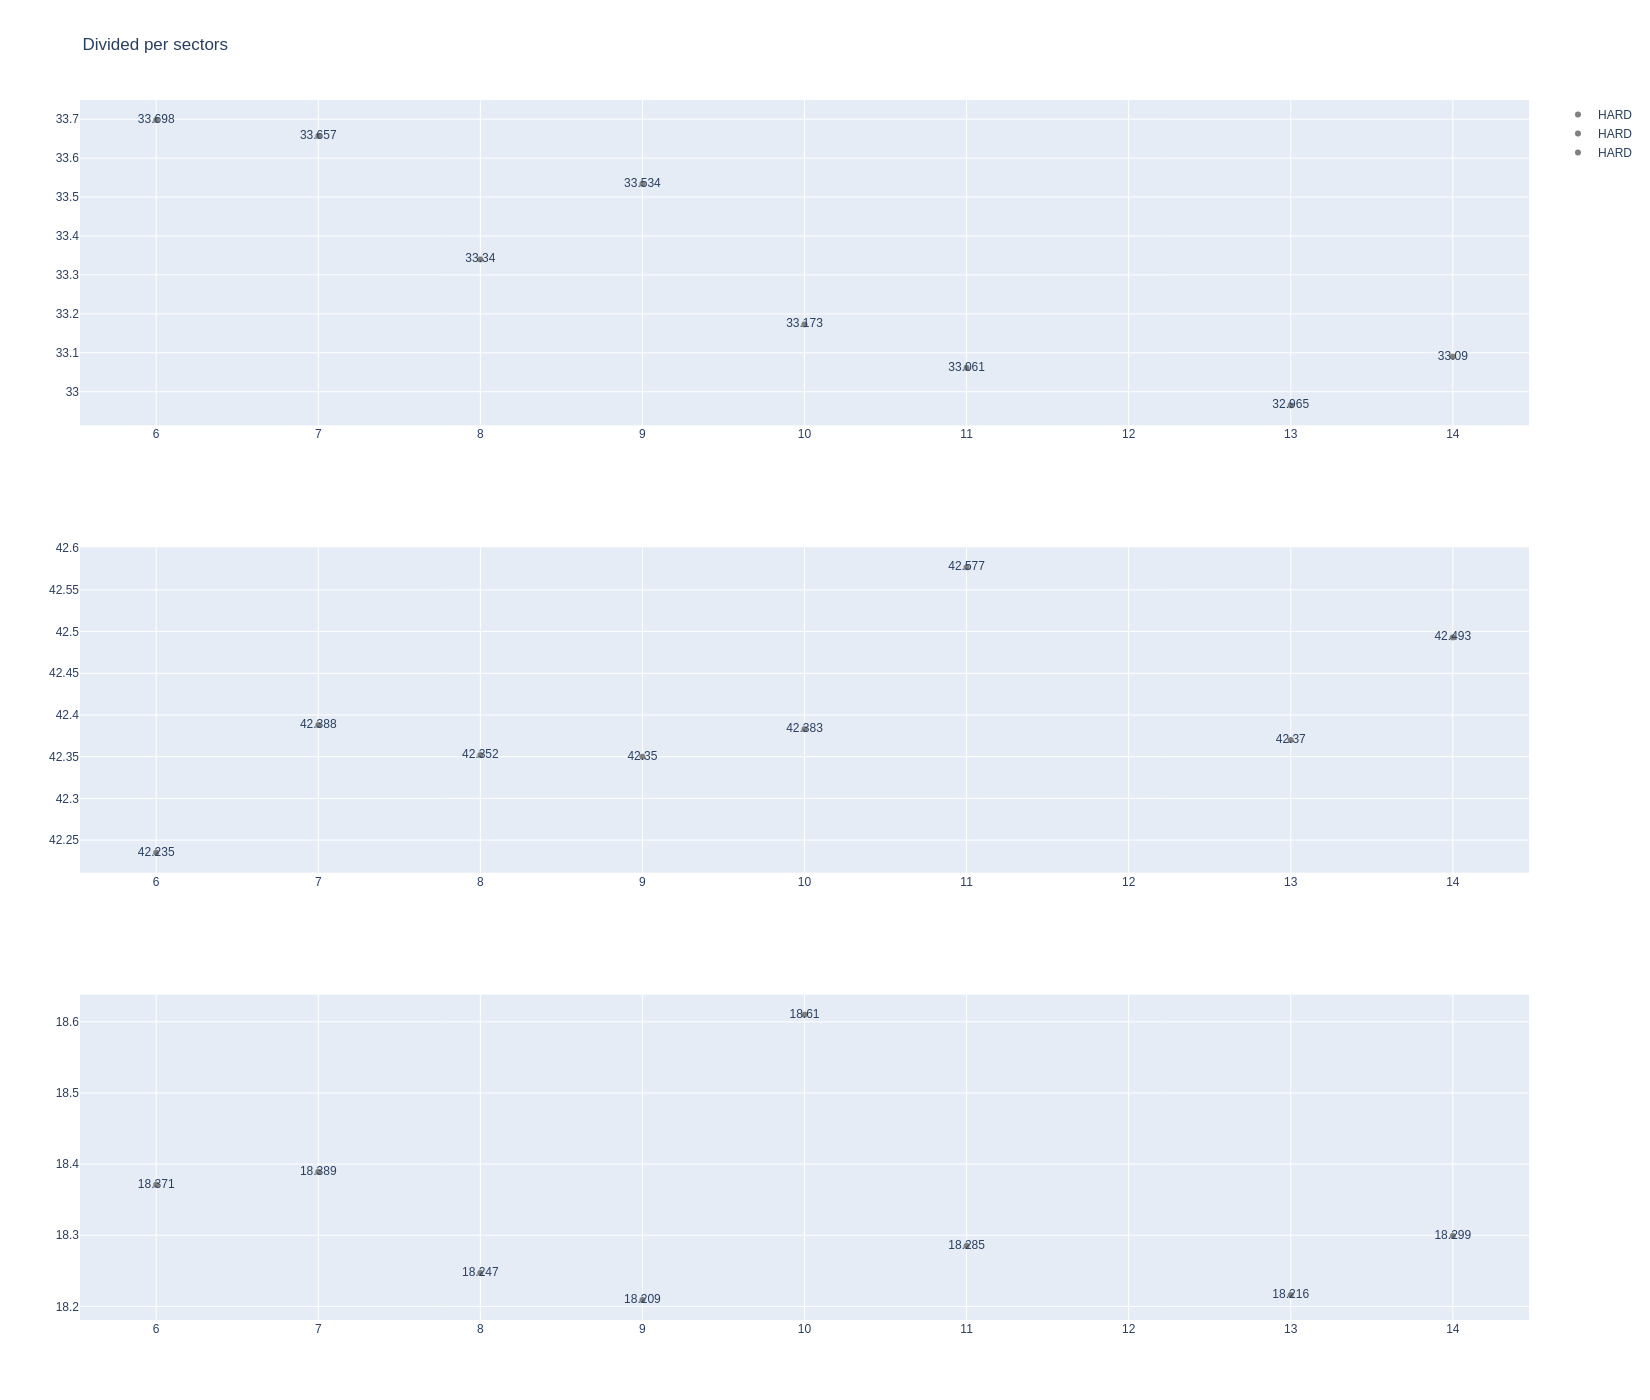

In [25]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [26]:
data = libraryDataF1.getinfolongruns(jointables2,30,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [27]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [28]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [29]:
stintInformation.query('driver_number == 55 or driver_number == 16')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
13         1256        10001             1             16          1        4   
16         1256        10001             1             55          1        4   
35         1256        10001             2             16          5        7   
38         1256        10001             2             55          5       11   
46         1256        10001             3             16          8       10   
59         1256        10001             4             16         11       14   
64         1256        10001             3             55         12       19   
82         1256        10001             4             55         20       22   
83         1256        10001             5             55         23       23   

   compound  tyre_age_at_start  
13     SOFT                  0  
16     HARD                  0  
35     SOFT                  3  
38     HARD                  4  
46     SOFT                  0  
59     SOFT                  0  
64     HARD                 11  
82     SOFT                  0  
83     SOFT                  0

In [30]:
data = libraryDataF1.getinfolongruns(jointables2,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [31]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [32]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [33]:
data = libraryDataF1.getinfolongruns(jointables2,44,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [34]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [35]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [36]:
stintInformation.query('driver_number == 63 or driver_number == 12')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
6          1256        10001             1             63          1        2   
12         1256        10001             1             12          1        4   
23         1256        10001             2             63          3        5   
34         1256        10001             2             12          5        7   
39         1256        10001             3             63          6        8   
48         1256        10001             3             12          8       16   
54         1256        10001             4             63          9       11   
63         1256        10001             5             63         12       16   
78         1256        10001             4             12         17       21   

   compound  tyre_age_at_start  
6    MEDIUM                  0  
12   MEDIUM                  0  
23     SOFT                  0  
34   MEDIUM                  3  
39     SOFT                  3  
48   MEDIUM                  6  
54     SOFT                  6  
63     SOFT                  0  
78     SOFT                  0

In [37]:
data = libraryDataF1.getinfolongruns(jointables2,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [38]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [39]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [40]:
data = libraryDataF1.getinfolongruns(jointables2,12,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
60   Kimi ANTONELLI   MEDIUM  2025-04-05T02:46:18.120000+00:00           5   
134  Kimi ANTONELLI   MEDIUM  2025-04-05T02:54:56.562000+00:00           8   
146  Kimi ANTONELLI   MEDIUM  2025-04-05T02:56:29.235000+00:00           9   
157  Kimi ANTONELLI   MEDIUM  2025-04-05T02:58:02.561000+00:00          10   
171  Kimi ANTONELLI   MEDIUM  2025-04-05T02:59:35.467000+00:00          11   
182  Kimi ANTONELLI   MEDIUM  2025-04-05T03:01:08.581000+00:00          12   
197  Kimi ANTONELLI   MEDIUM  2025-04-05T03:02:41.566000+00:00          13   
210  Kimi ANTONELLI   MEDIUM  2025-04-05T03:04:14.457000+00:00          14   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
60              33.773             41.830             17.877        93.480  
134             32.938             41.782             17.987        92.707  
146             33.493             41.829             17.963        93.285  
157             32.847             42.107             17.946        92.900  
171             32.993             42.061             18.098        93.152  
182             32.924             42.113             17.951        92.988  
197             32.726             42.140             18.055        92.921  
210             32.776             42.086             18.011        92.873

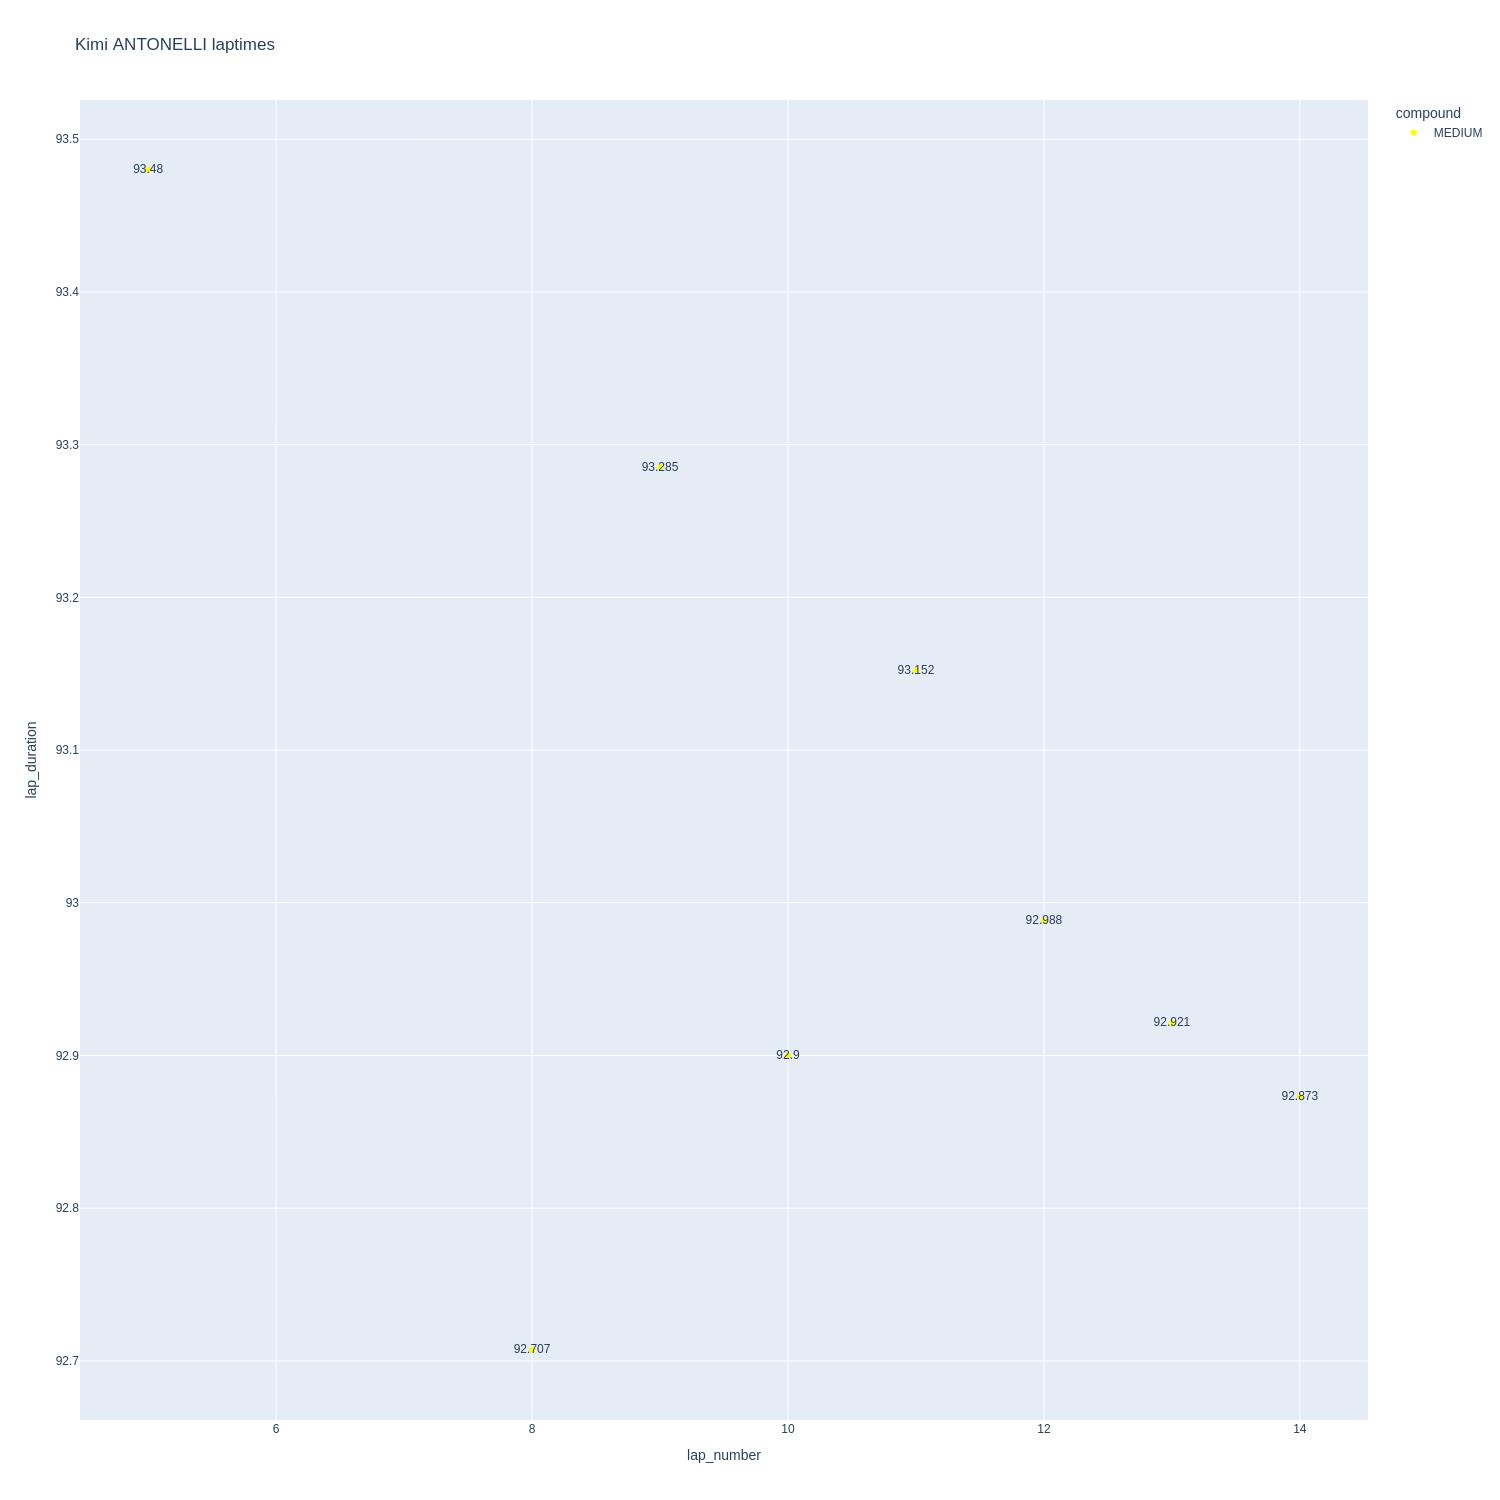

In [41]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

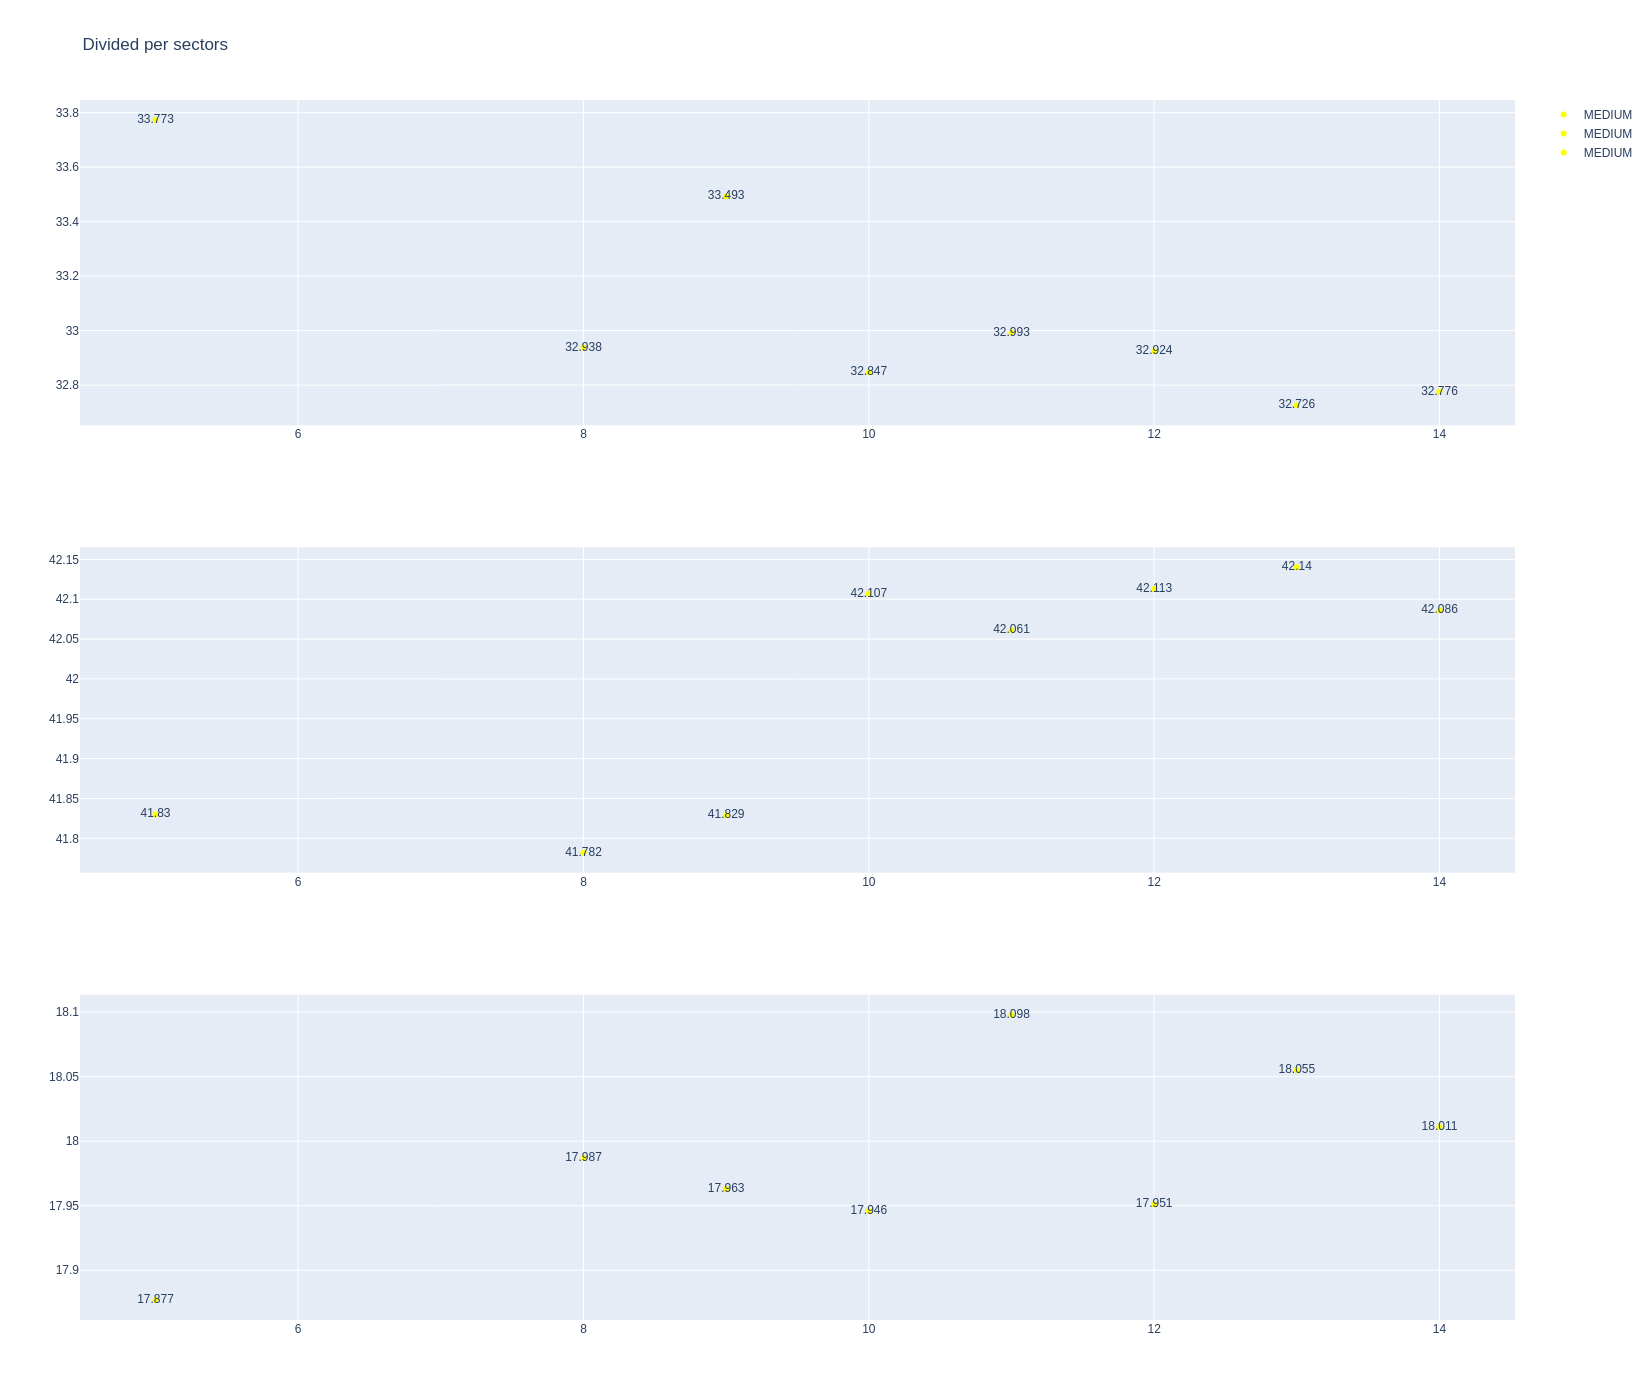

In [42]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [43]:
stintInformation.query('driver_number == 81 or driver_number == 4')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
1          1256        10001             1              4          1        2   
7          1256        10001             1             81          1        2   
27         1256        10001             2              4          3       12   
28         1256        10001             2             81          3       12   
66         1256        10001             3             81         13       15   
67         1256        10001             3              4         13       18   
71         1256        10001             4             81         16       18   

   compound  tyre_age_at_start  
1      HARD                  0  
7    MEDIUM                  0  
27     SOFT                  0  
28     SOFT                  0  
66     SOFT                  0  
67     SOFT                  0  
71     SOFT                  3

In [44]:
data = libraryDataF1.getinfolongruns(jointables2,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
173  Lando NORRIS     SOFT  2025-04-05T02:59:39.186000+00:00          11   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
173             31.698             41.705             20.864        94.267

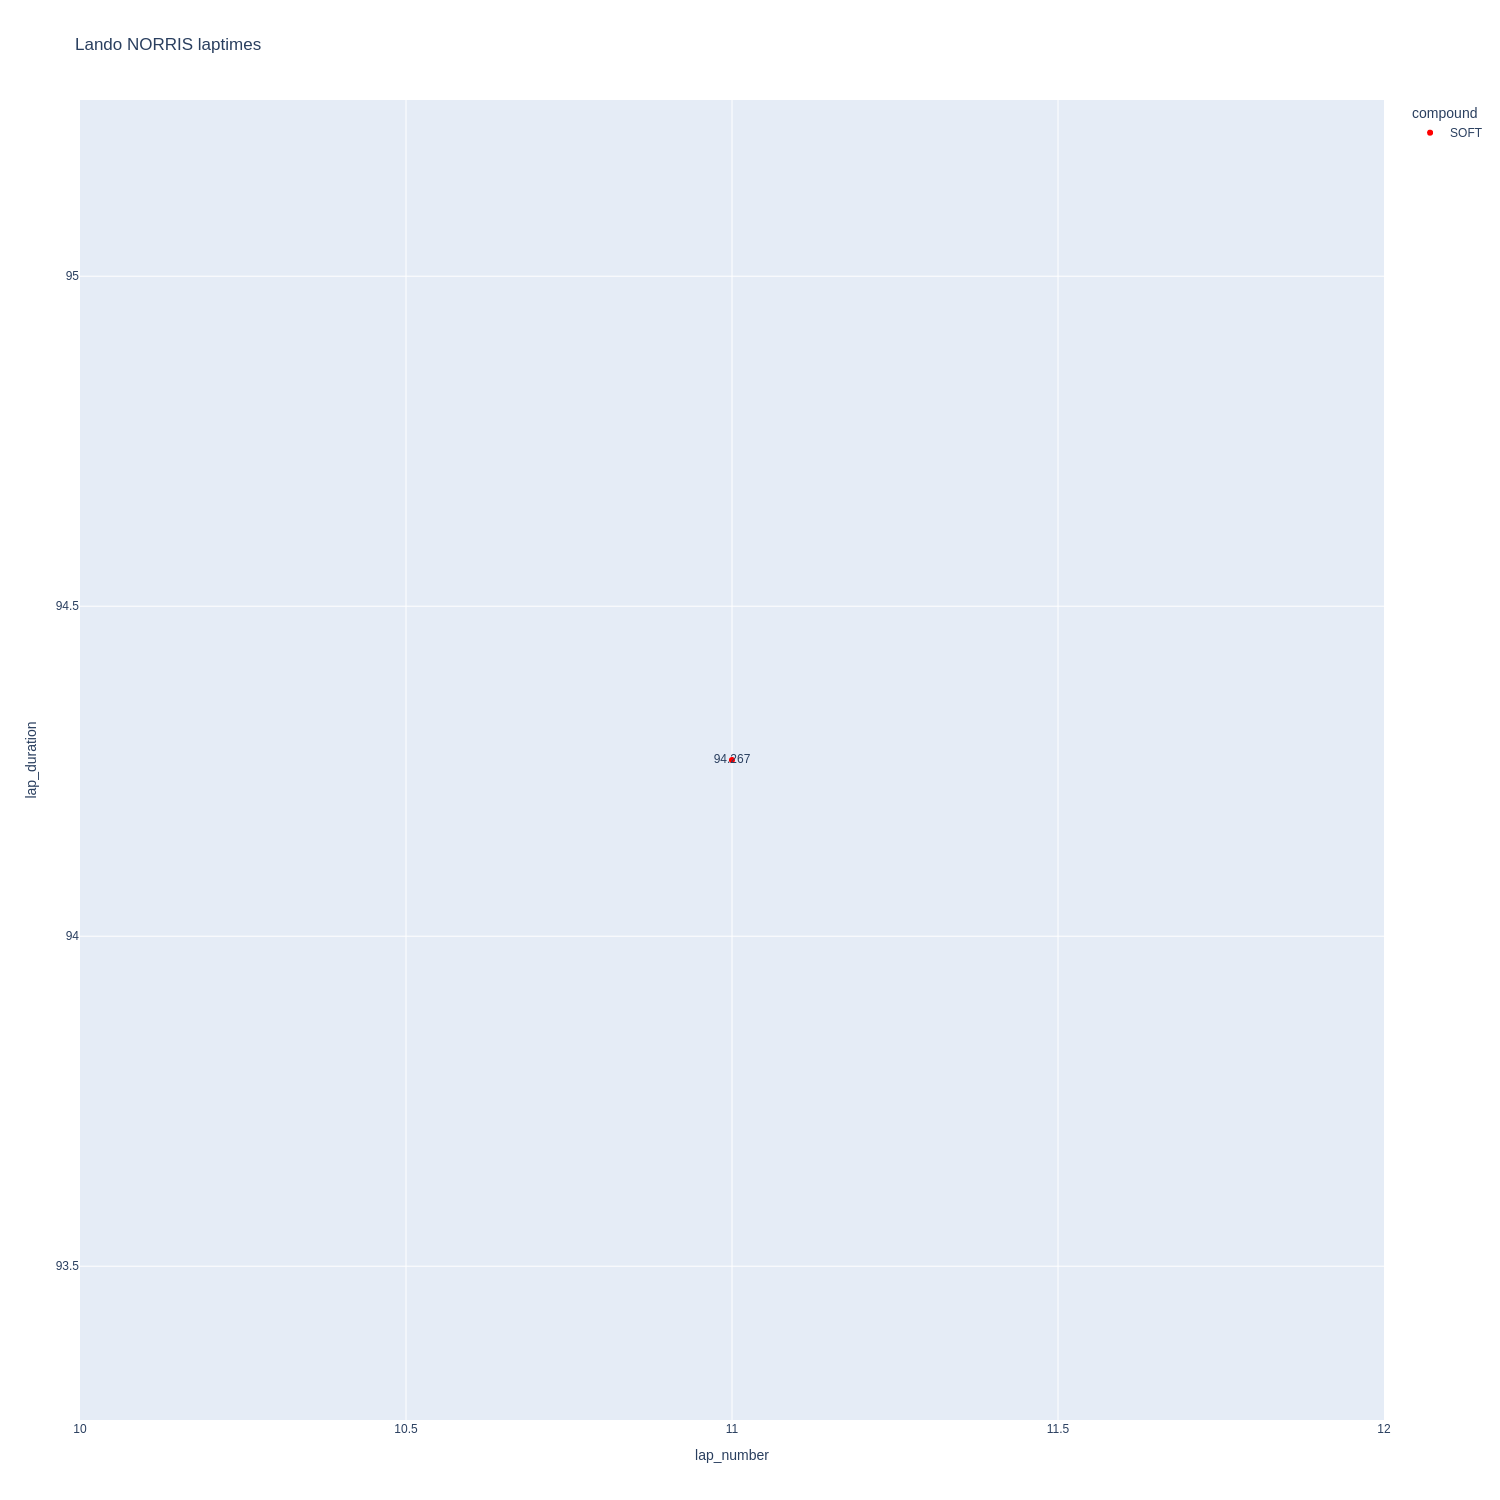

In [45]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

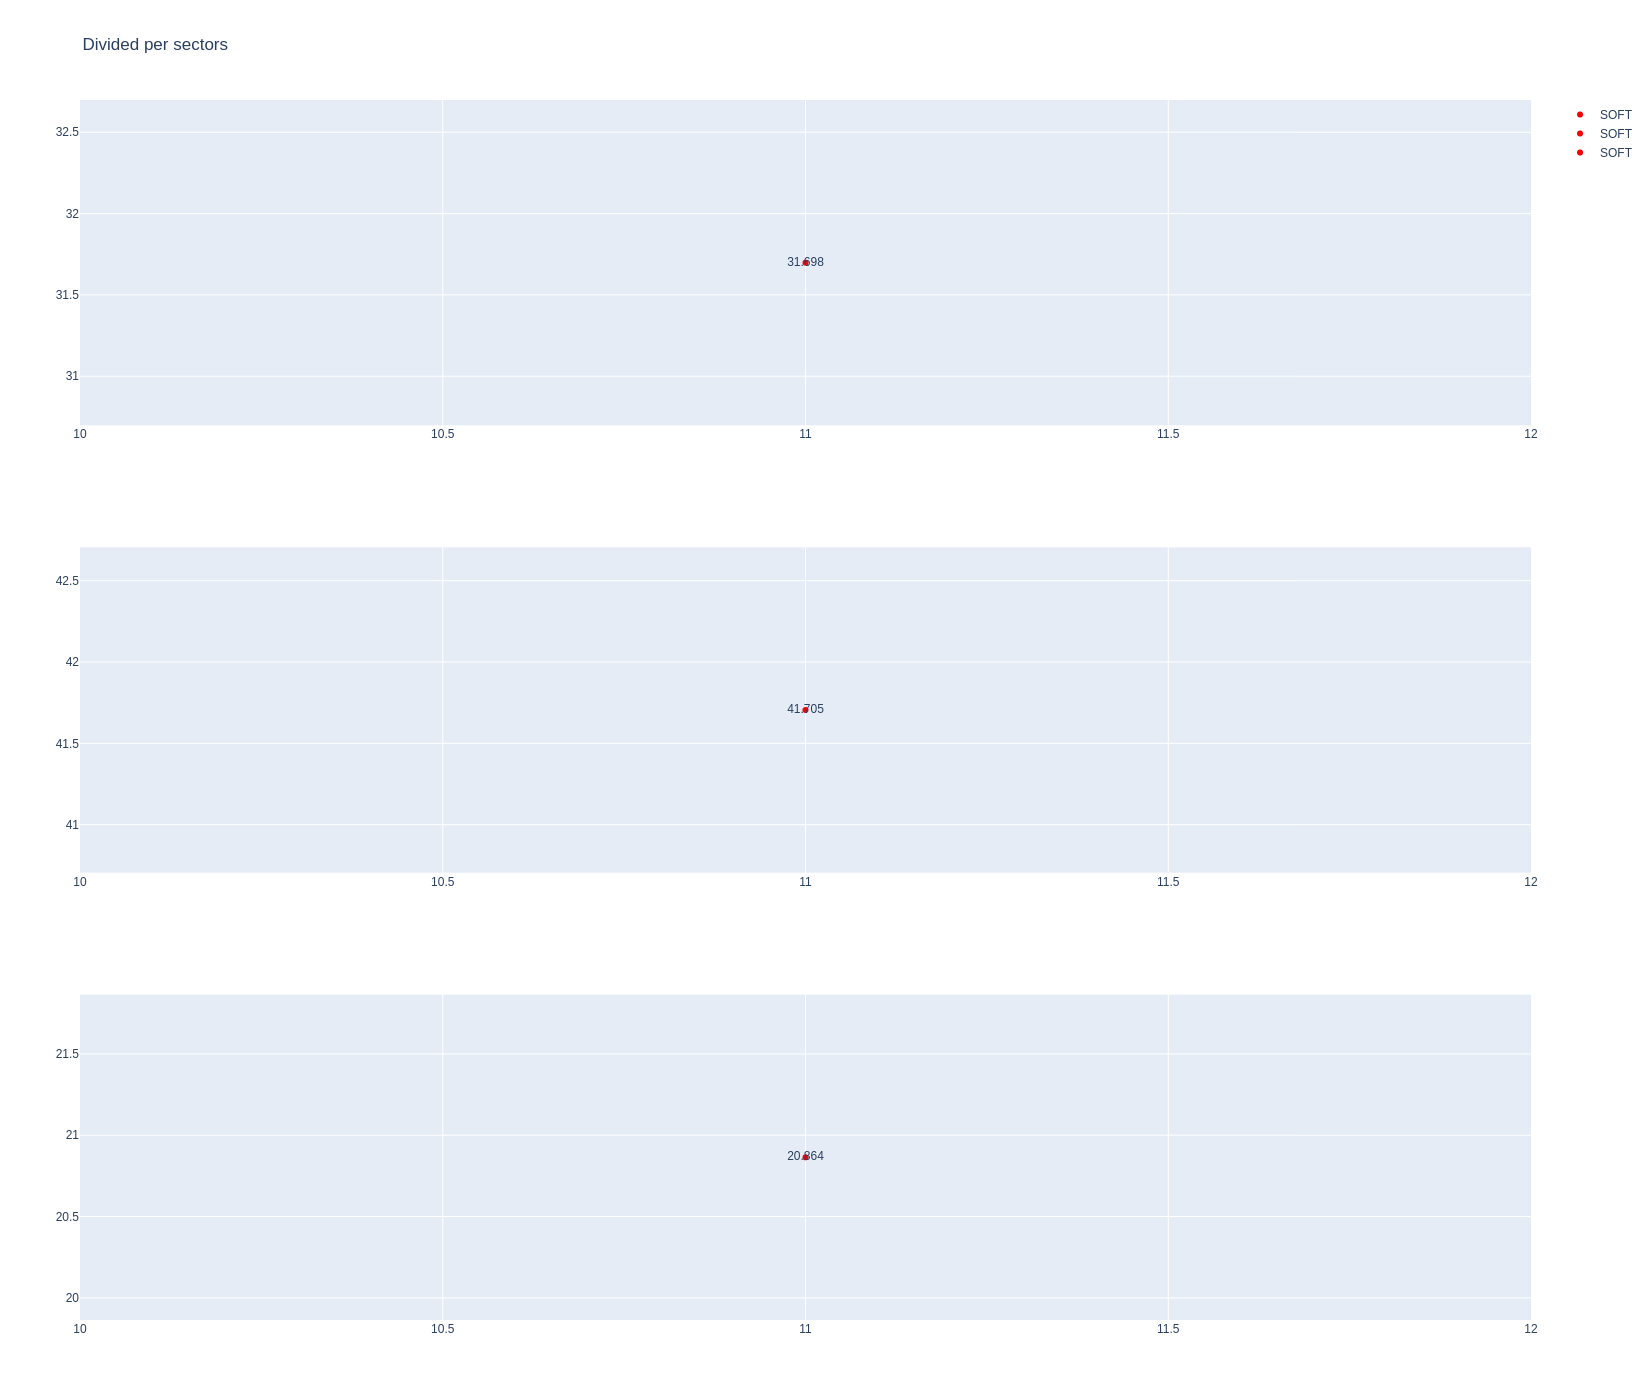

In [46]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [47]:
data = libraryDataF1.getinfolongruns(jointables2,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
144  Oscar PIASTRI     SOFT  2025-04-05T02:56:06.141000+00:00           8   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
144             33.934             40.605             17.875        92.414

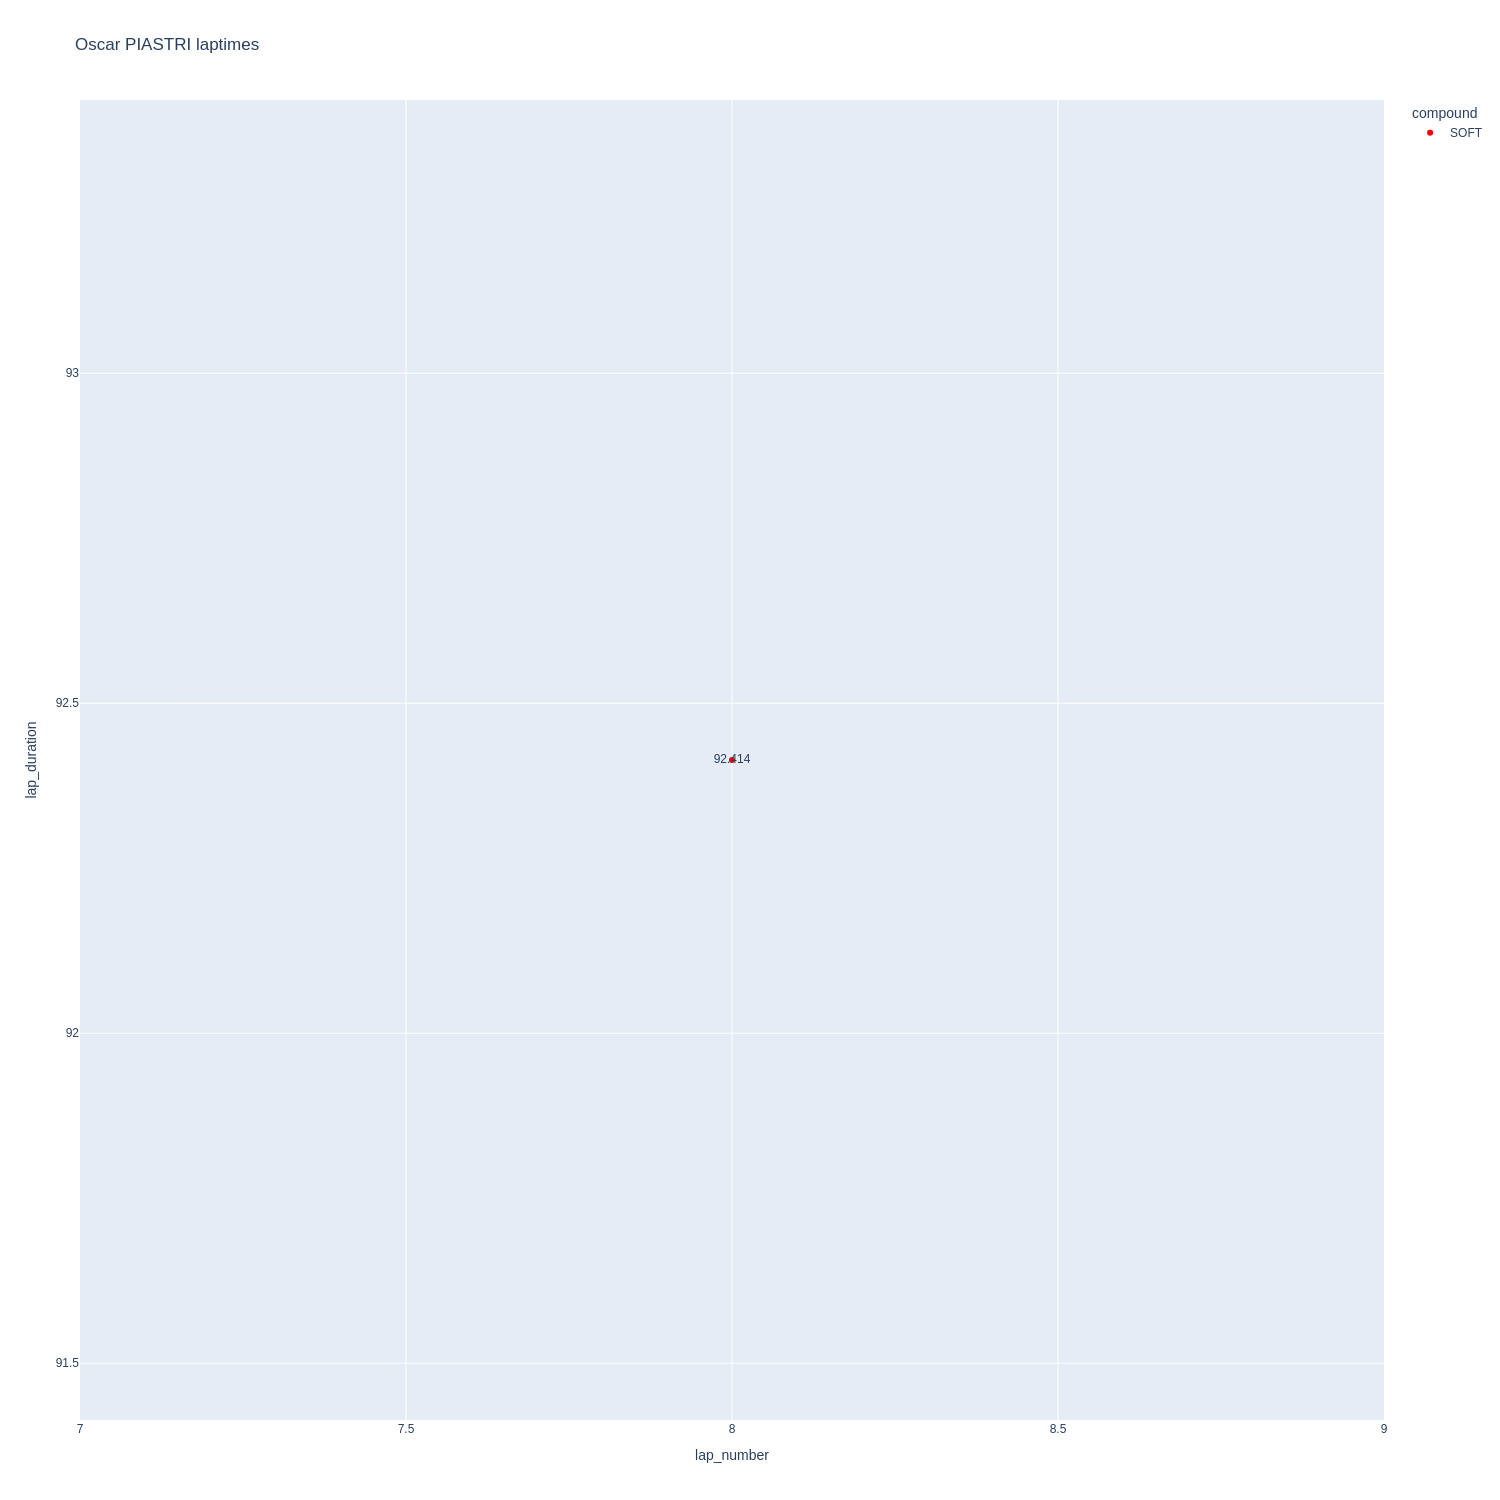

In [48]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

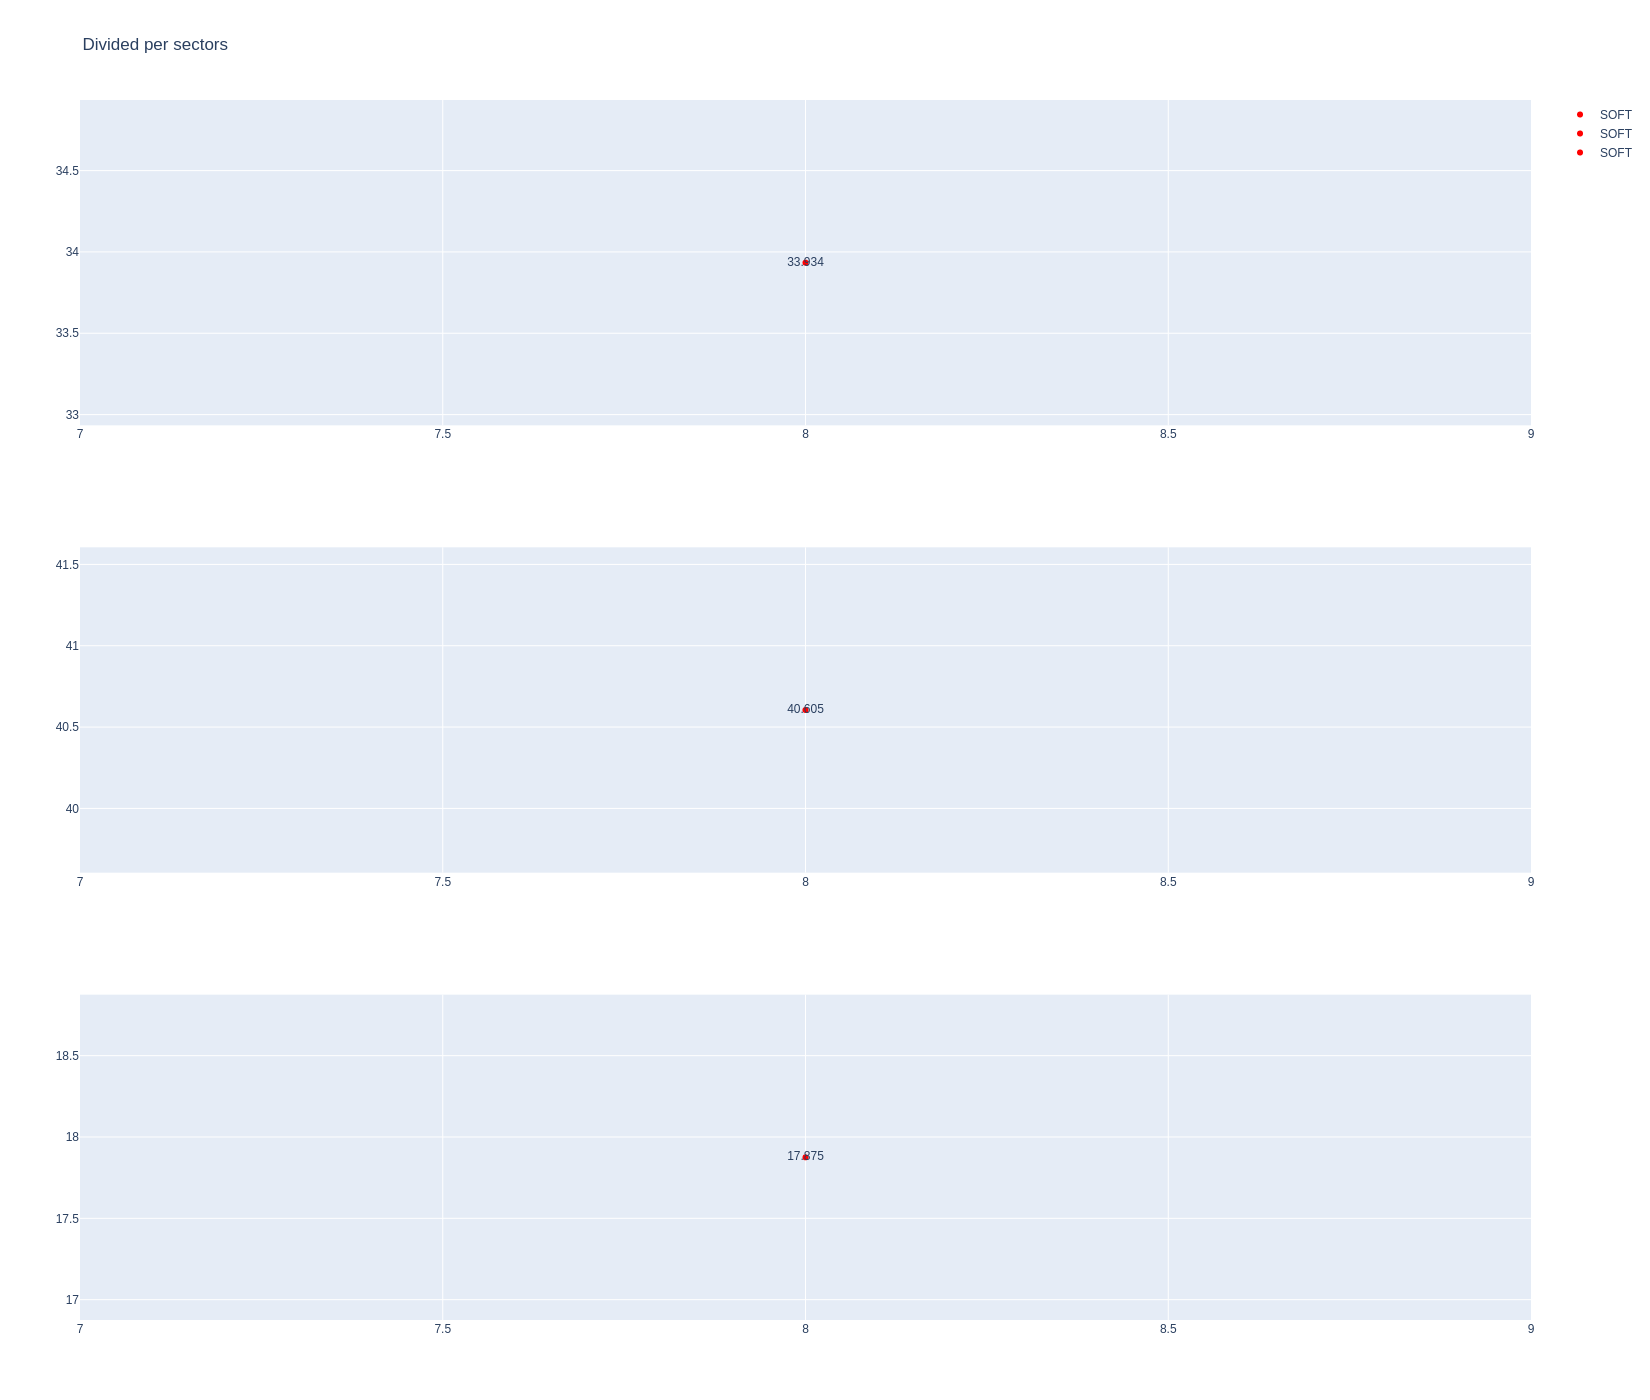

In [49]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [50]:
stintInformation.query('driver_number == 18 or driver_number == 14')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
0          1256        10001             1             14          1        1   
2          1256        10001             1             18          1        2   
20         1256        10001             2             14          2        3   
21         1256        10001             2             18          3        3   
30         1256        10001             3             18          4        8   
32         1256        10001             3             14          4        9   
55         1256        10001             4             18          9       16   
57         1256        10001             4             14         10       17   
72         1256        10001             5             18         17       17   
79         1256        10001             5             14         18       18   

   compound  tyre_age_at_start  
0    MEDIUM                  0  
2    MEDIUM                  0  
20     HARD                  0  
21     HARD                  0  
30   MEDIUM                  0  
32   MEDIUM                  0  
55   MEDIUM                  5  
57   MEDIUM                  6  
72     SOFT                  0  
79     SOFT                  0

In [51]:
data = libraryDataF1.getinfolongruns(jointables2,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
249  Fernando ALONSO   MEDIUM  2025-04-05T03:09:45.023000+00:00          13   
256  Fernando ALONSO   MEDIUM  2025-04-05T03:11:17.508000+00:00          14   
263  Fernando ALONSO   MEDIUM  2025-04-05T03:12:50.071000+00:00          15   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
249             32.566             41.754             18.063        92.383  
256             32.662             41.914             18.069        92.645  
263             32.432             41.953             18.049        92.434

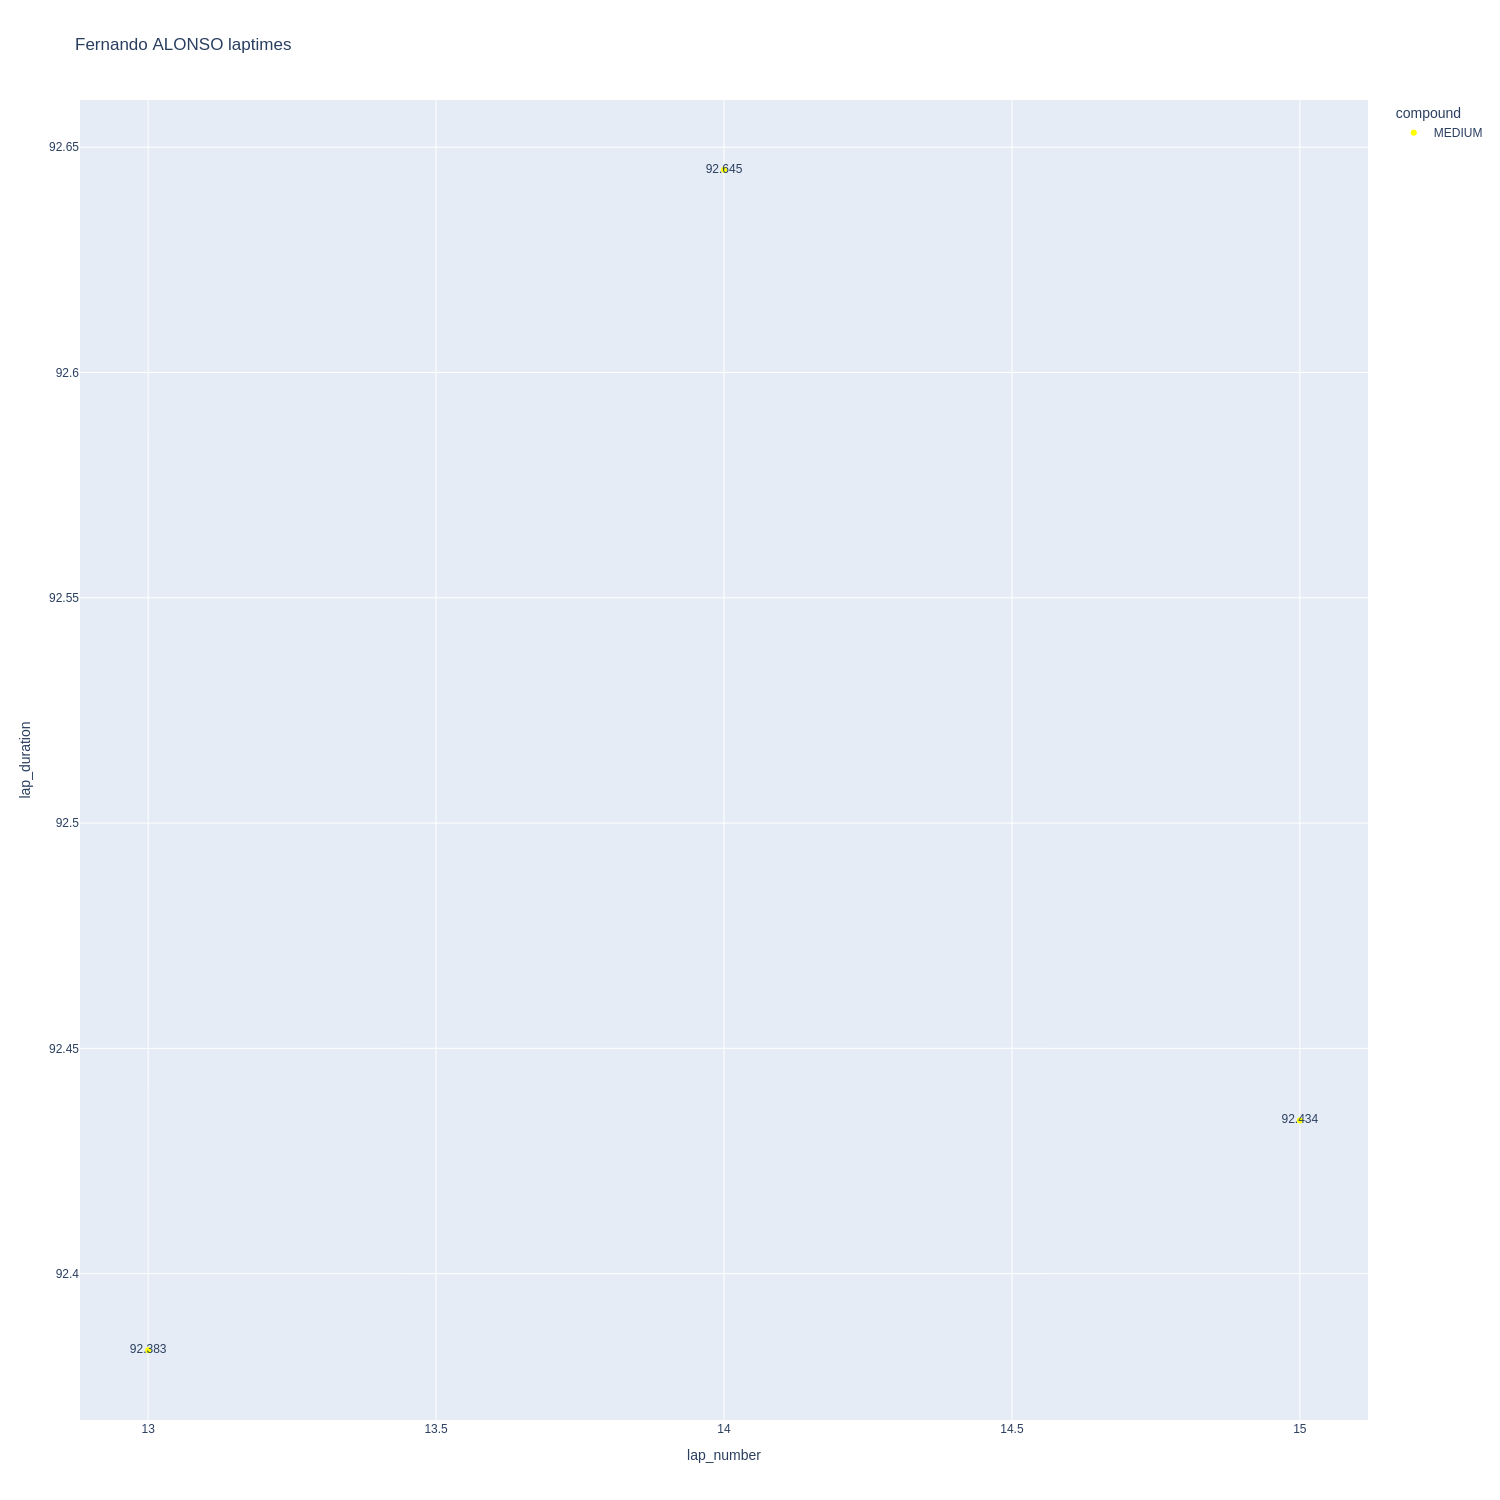

In [52]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

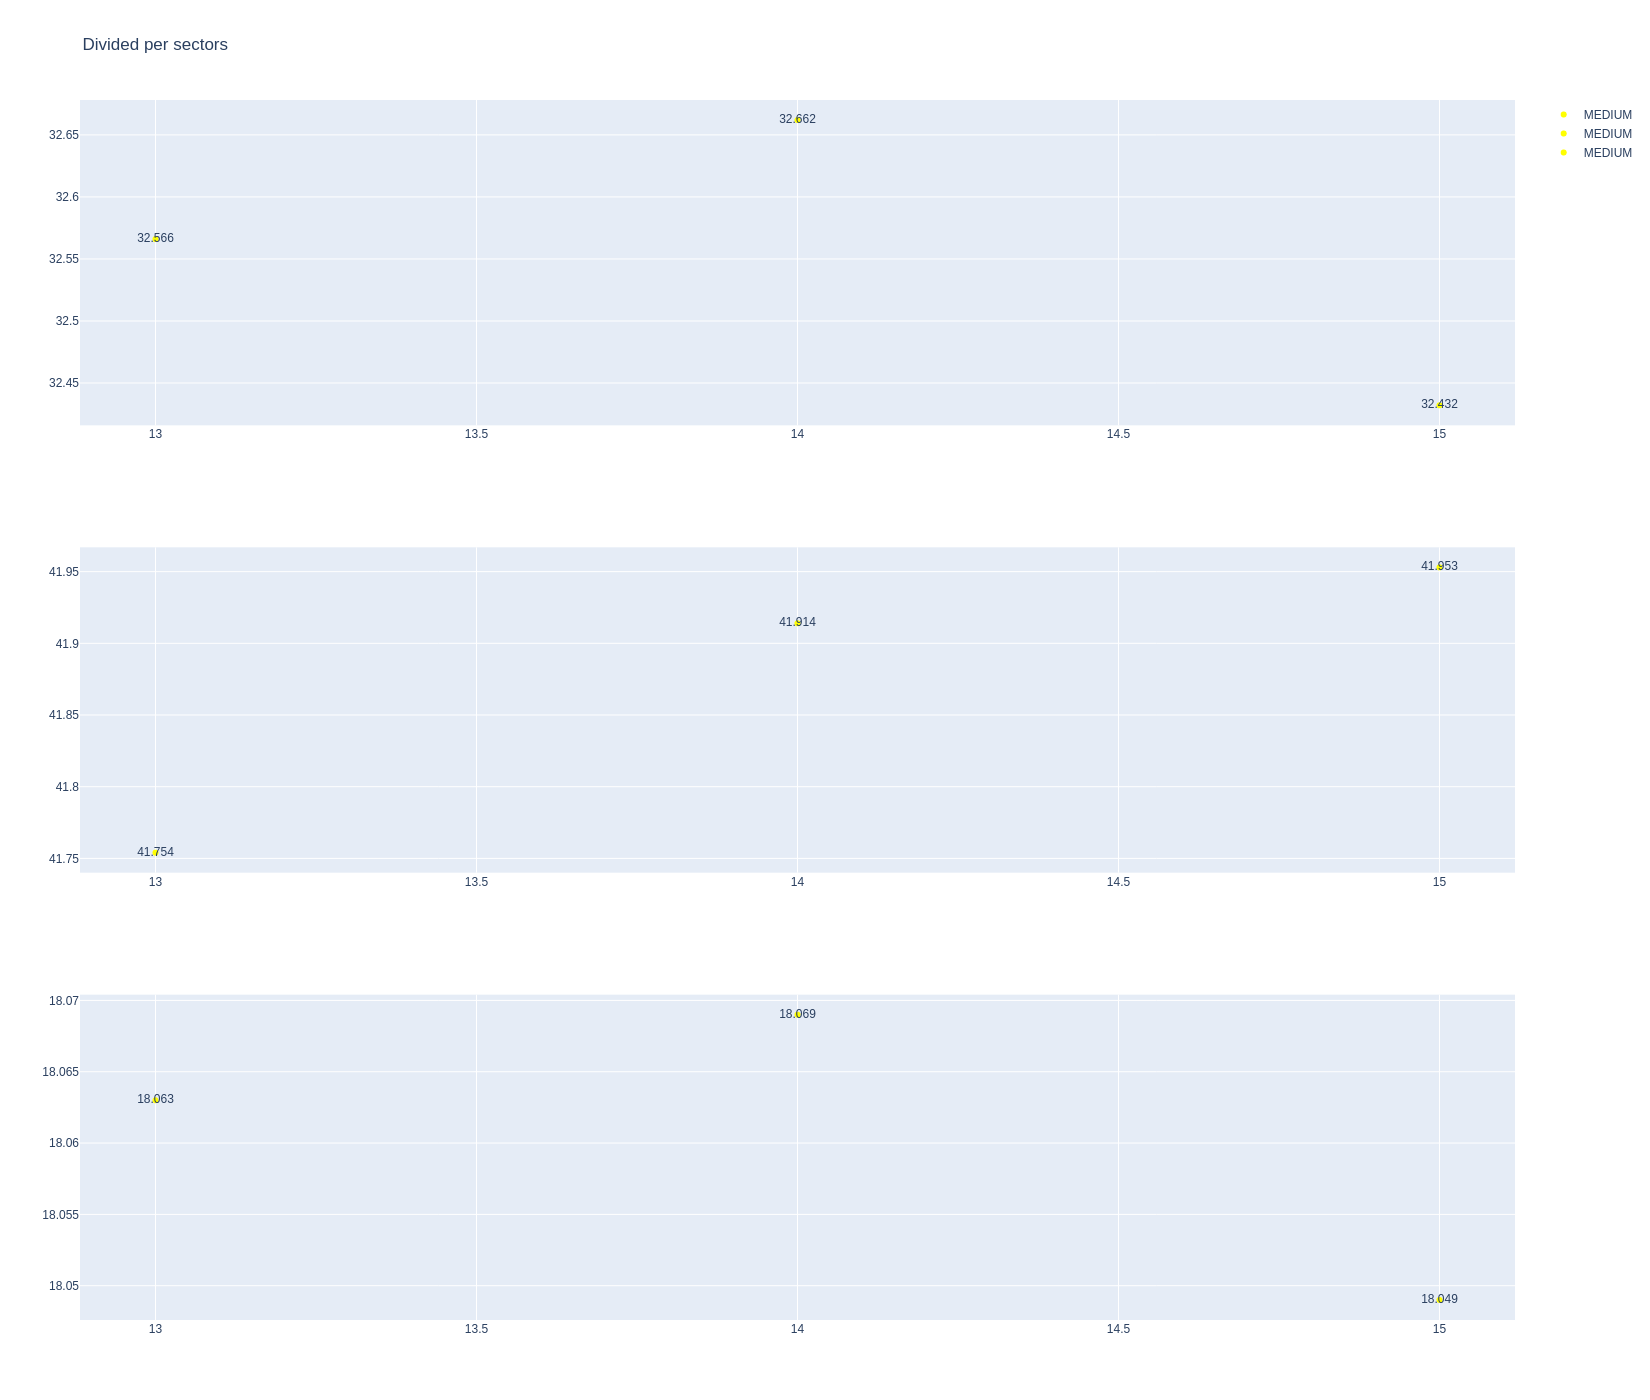

In [53]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [54]:
data = libraryDataF1.getinfolongruns(jointables2,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [55]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [56]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Racing Bulls

In [57]:
stintInformation.query('driver_number == 6 or driver_number == 22')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
9          1256        10001             1              6          1        3   
14         1256        10001             1             22          1        4   
31         1256        10001             2              6          4        9   
36         1256        10001             2             22          5        7   
47         1256        10001             3             22          8       10   
56         1256        10001             3              6         10       14   
58         1256        10001             4             22         11       13   
68         1256        10001             5             22         14       16   
70         1256        10001             4              6         15       17   

   compound  tyre_age_at_start  
9    MEDIUM                  0  
14     HARD                  0  
31   MEDIUM                  2  
36     HARD                  3  
47     HARD                  0  
56     HARD                  0  
58     HARD                  0  
68     SOFT                  0  
70     SOFT                  0

In [58]:
data = libraryDataF1.getinfolongruns(jointables2,6,'Racing Bulls',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
221  Isack HADJAR     HARD  2025-04-05T03:05:20.771000+00:00          11   
234  Isack HADJAR     HARD  2025-04-05T03:06:55.099000+00:00          12   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
221             33.356             42.563             18.324        94.243  
234             33.408             42.487             18.249        94.144

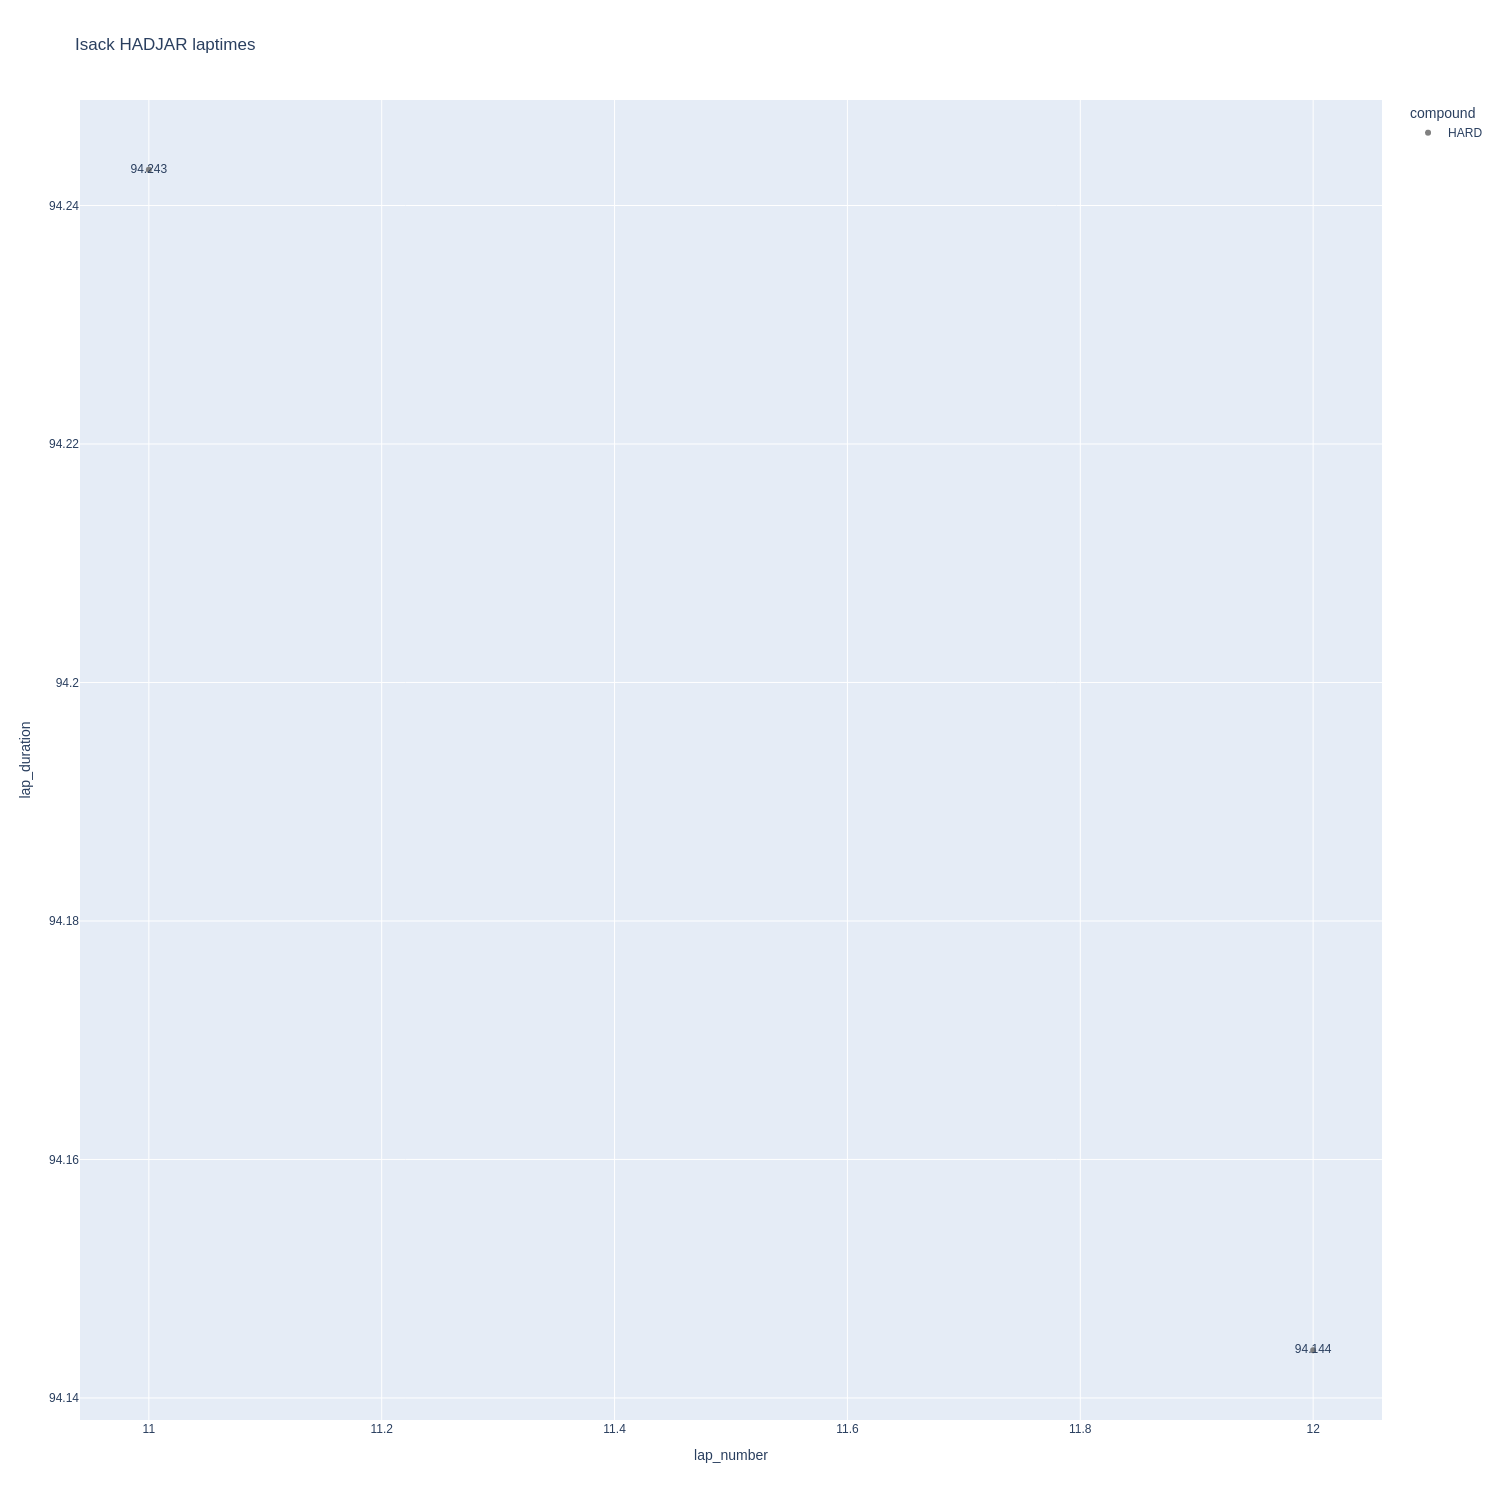

In [59]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

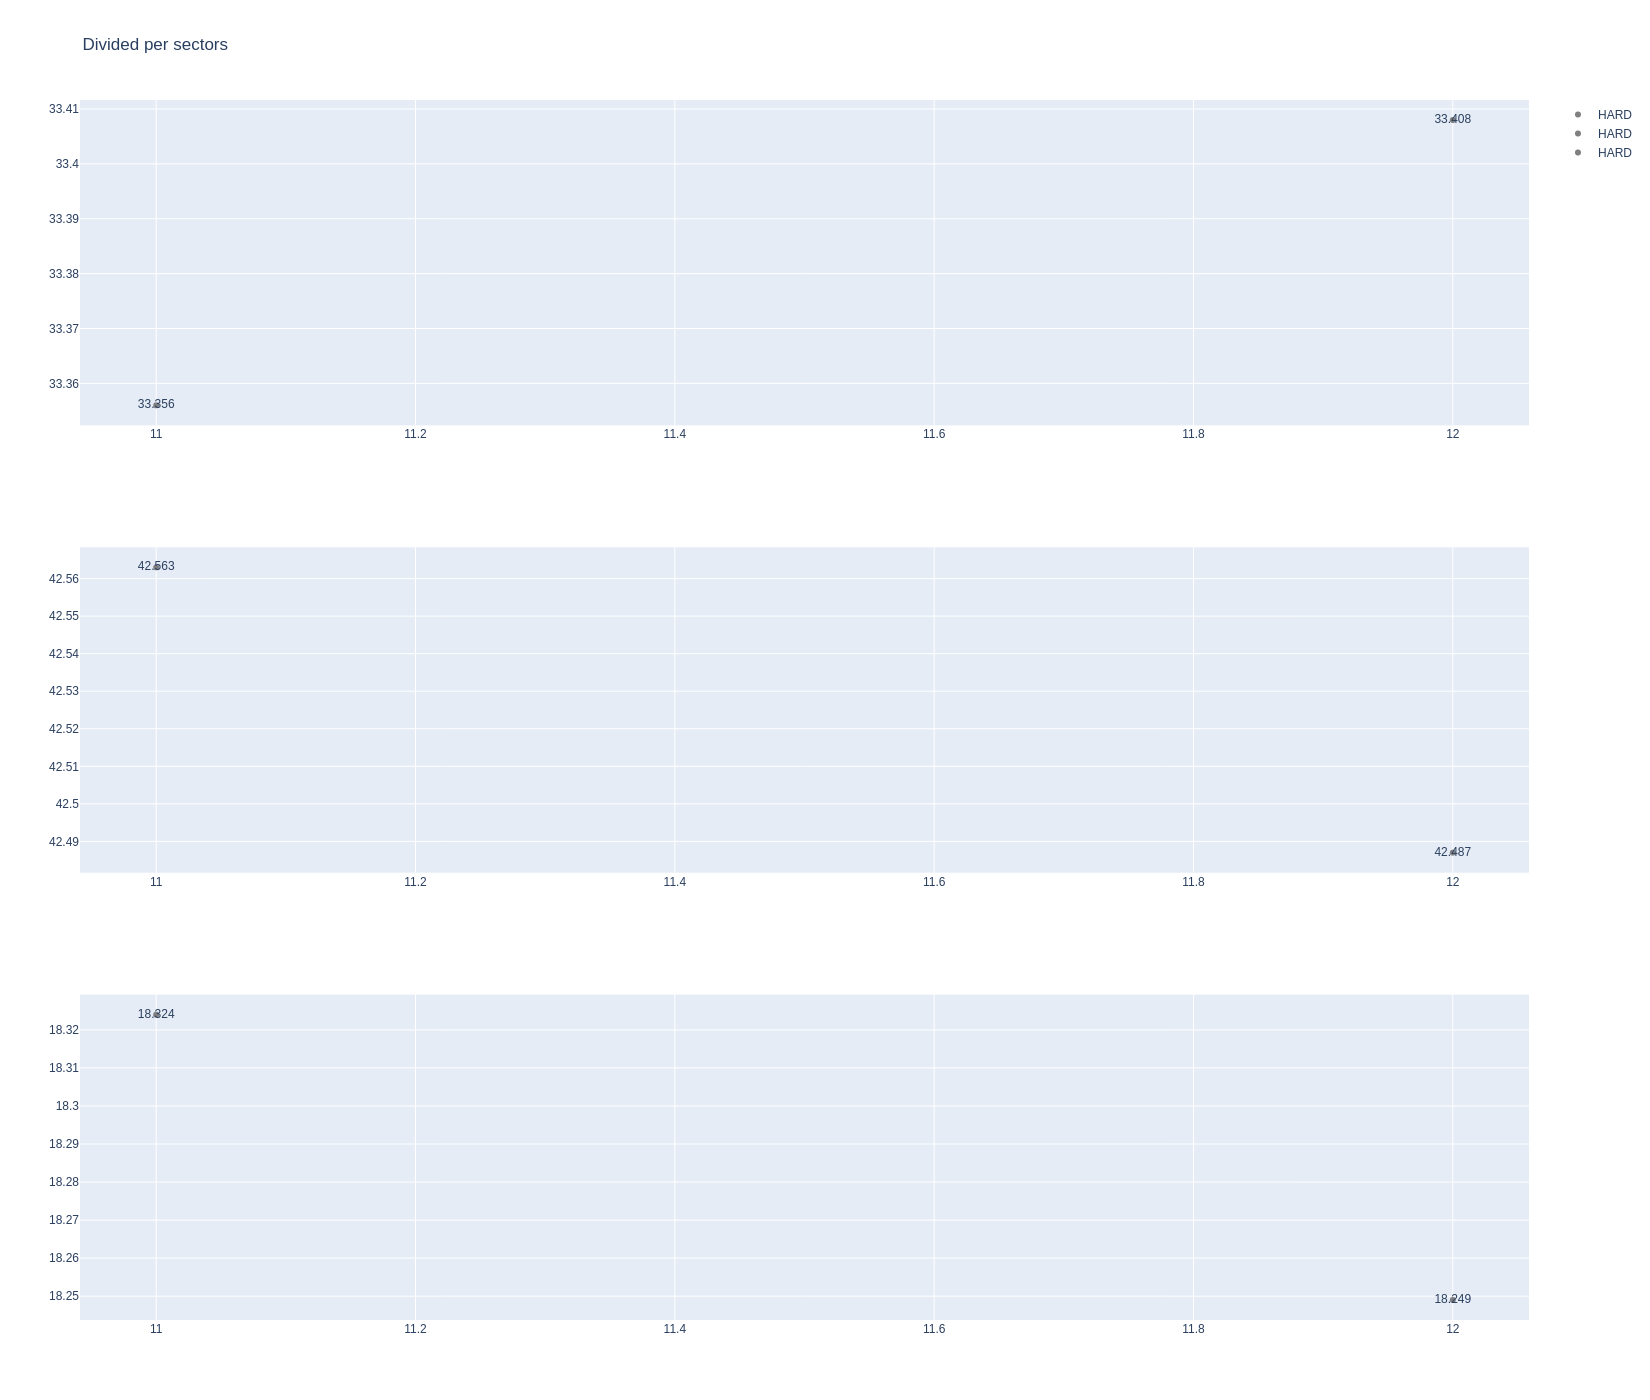

In [60]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [61]:
data = libraryDataF1.getinfolongruns(jointables2,22,'Racing Bulls',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [62]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [63]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [64]:
stintInformation.query('driver_number == 87 or driver_number == 31')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
4          1256        10001             1             31          1        2   
8          1256        10001             1             87          1        2   
25         1256        10001             2             31          3        7   
26         1256        10001             2             87          3        7   
50         1256        10001             3             31          8       16   
51         1256        10001             3             87          8       17   
74         1256        10001             4             31         17       18   
75         1256        10001             4             87         17       18   

   compound  tyre_age_at_start  
4      HARD                  0  
8      HARD                  0  
25     HARD                  0  
26     HARD                  0  
50     HARD                  0  
51     HARD                  5  
74     SOFT                  0  
75     SOFT                  0

In [65]:
data = libraryDataF1.getinfolongruns(jointables2,87,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
235  Oliver BEARMAN     HARD  2025-04-05T03:07:08.521000+00:00          11   
245  Oliver BEARMAN     HARD  2025-04-05T03:08:43.491000+00:00          12   
252  Oliver BEARMAN     HARD  2025-04-05T03:10:18.039000+00:00          13   
259  Oliver BEARMAN     HARD  2025-04-05T03:11:52.758000+00:00          14   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
235             33.420             42.996             18.489        94.905  
245             33.481             42.817             18.334        94.632  
252             33.433             42.738             18.478        94.649  
259             32.967             43.065             18.409        94.441

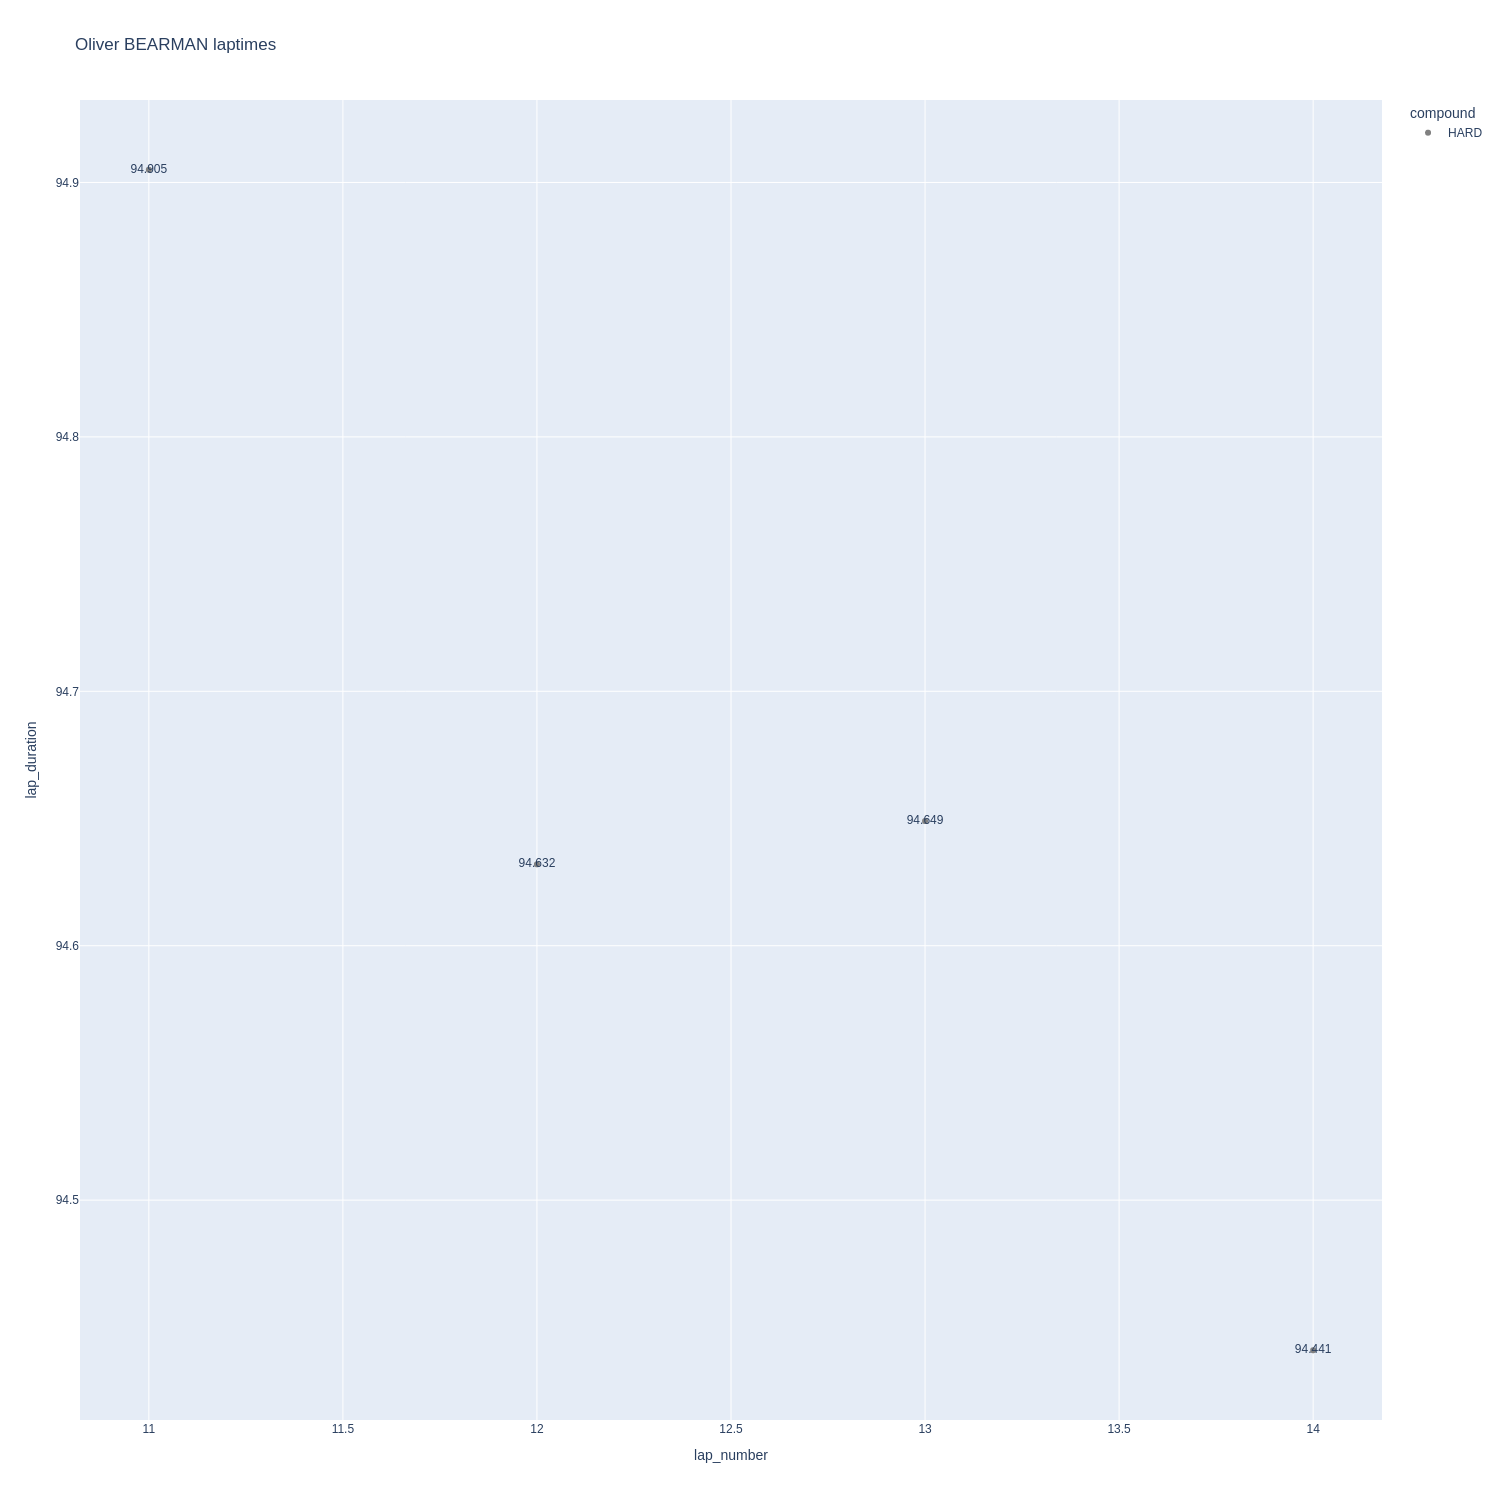

In [66]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

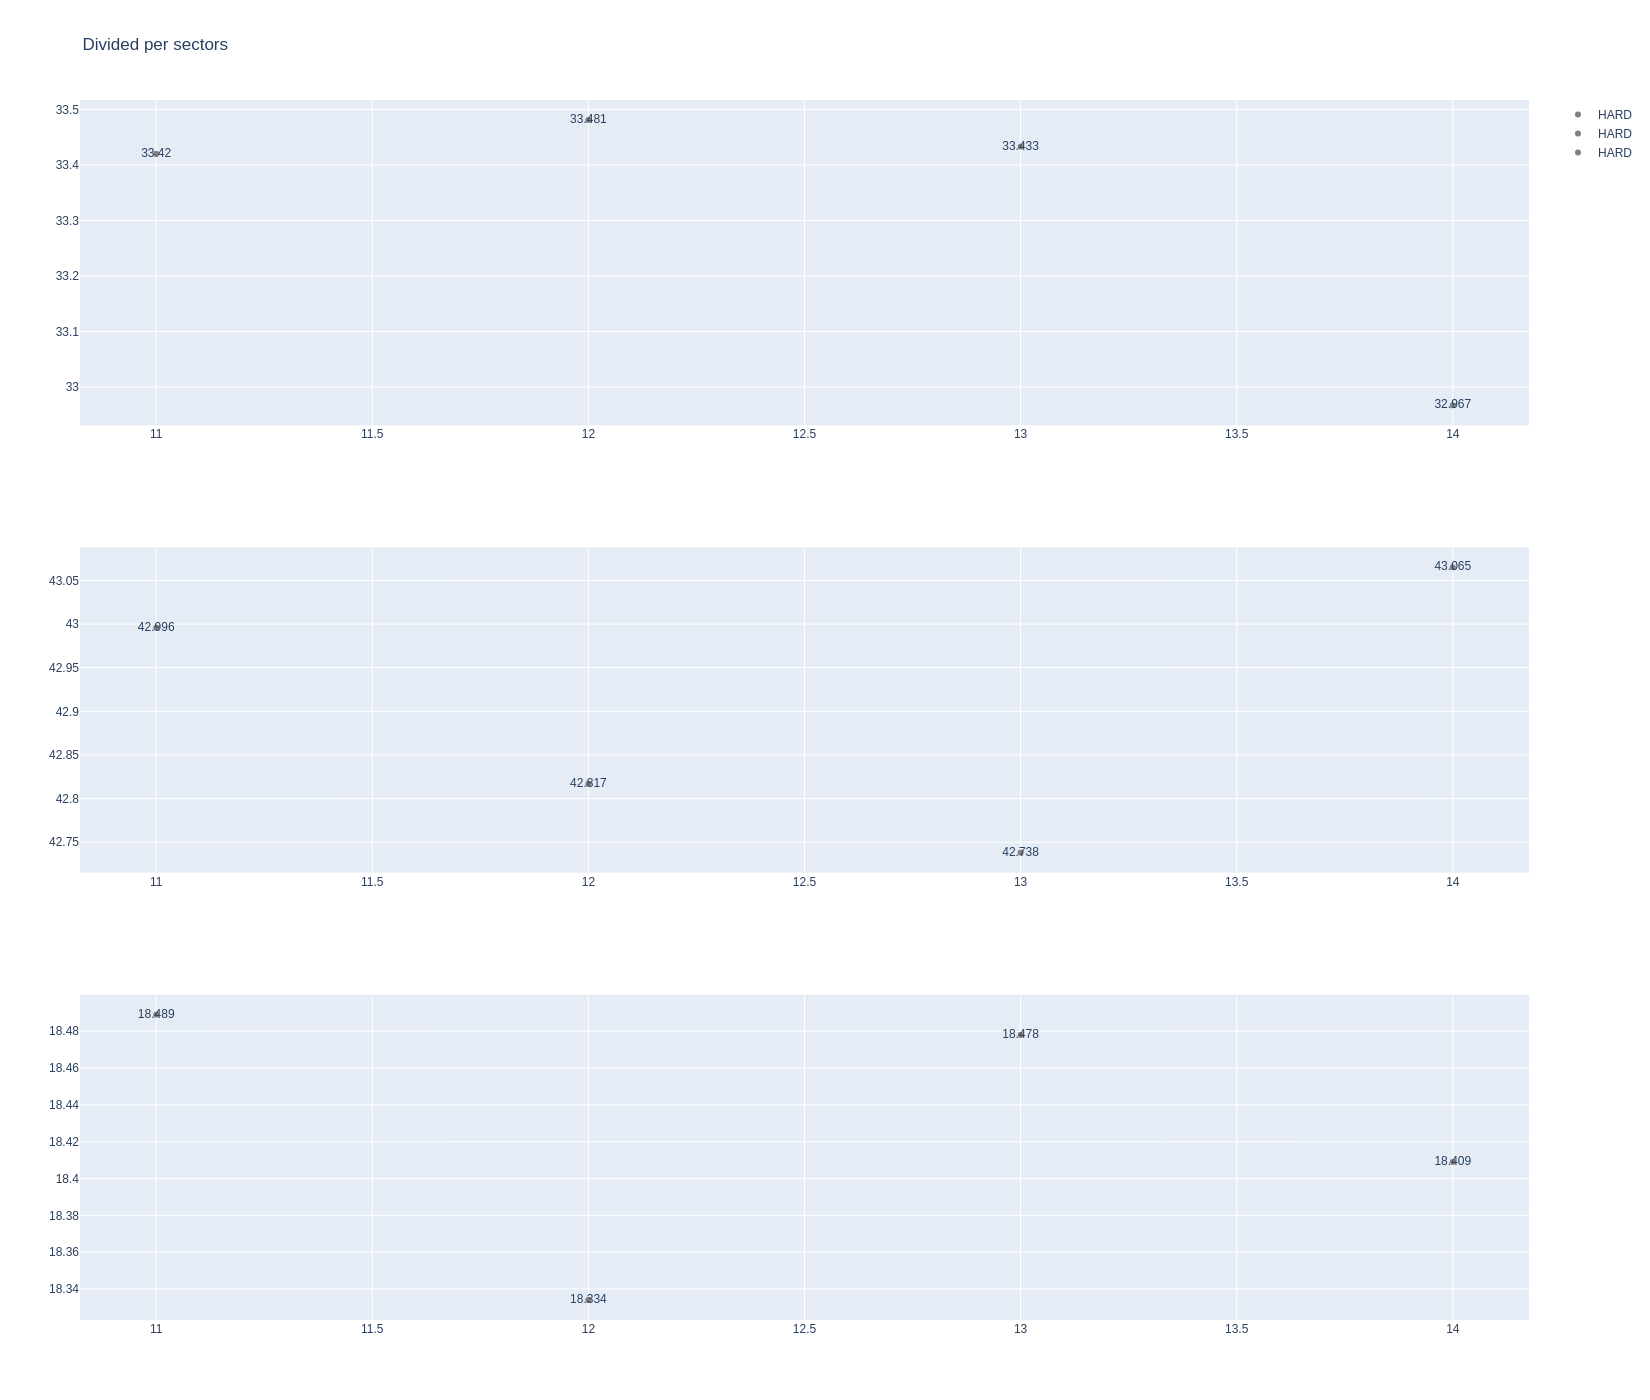

In [67]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [68]:
data = libraryDataF1.getinfolongruns(jointables2,31,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


full_name compound                        date_start  lap_number  \
200  Esteban OCON     HARD  2025-04-05T03:02:59.691000+00:00           9   
213  Esteban OCON     HARD  2025-04-05T03:04:34.630000+00:00          10   
228  Esteban OCON     HARD  2025-04-05T03:06:09.552000+00:00          11   
238  Esteban OCON     HARD  2025-04-05T03:07:44.350000+00:00          12   
247  Esteban OCON     HARD  2025-04-05T03:09:18.866000+00:00          13   
255  Esteban OCON     HARD  2025-04-05T03:10:53.554000+00:00          14   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
200             33.639             42.755             18.501        94.895  
213             33.578             42.841             18.483        94.902  
228             33.455             42.899             18.620        94.974  
238             33.152             42.692             18.584        94.428  
247             33.258             42.808             18.585        94.651  
255             33.301             42.798             18.793        94.892

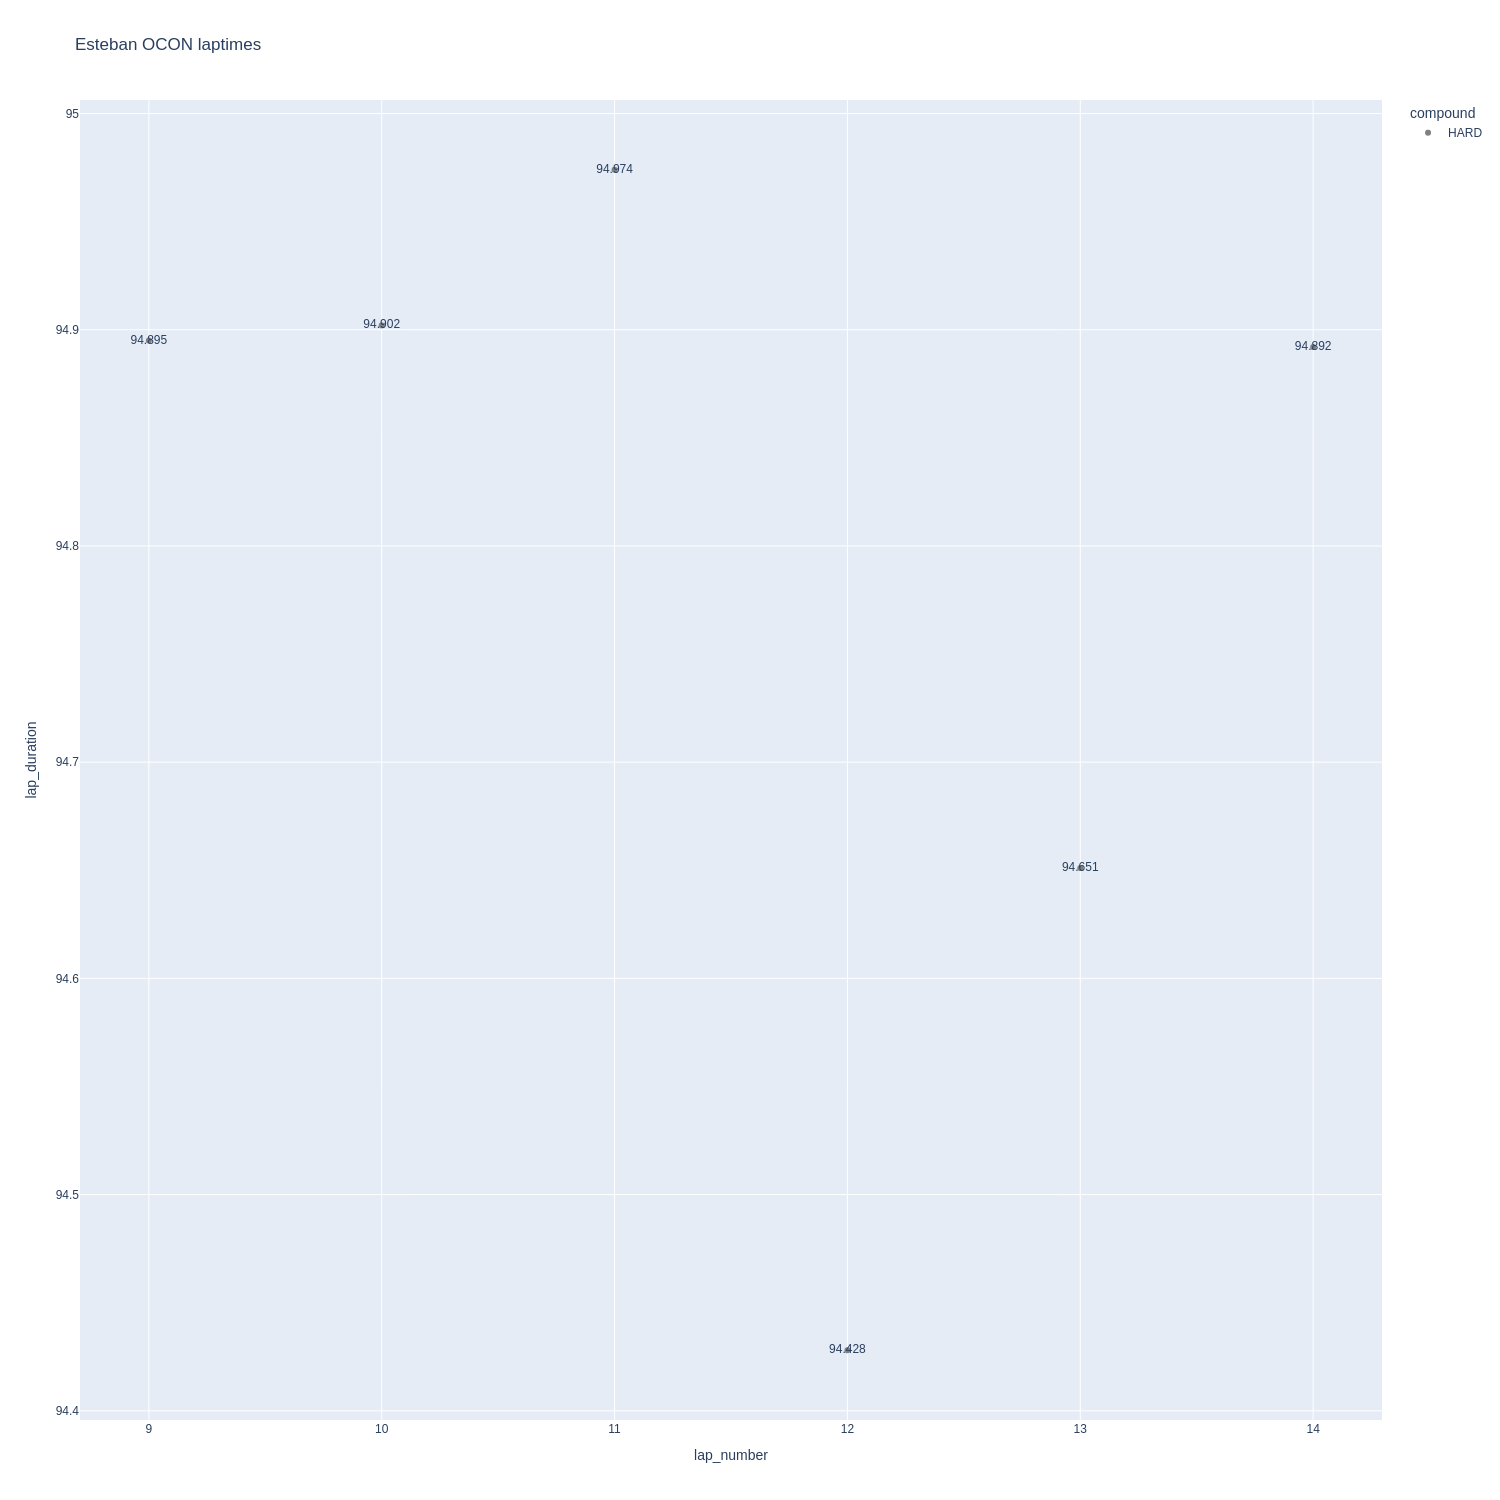

In [69]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

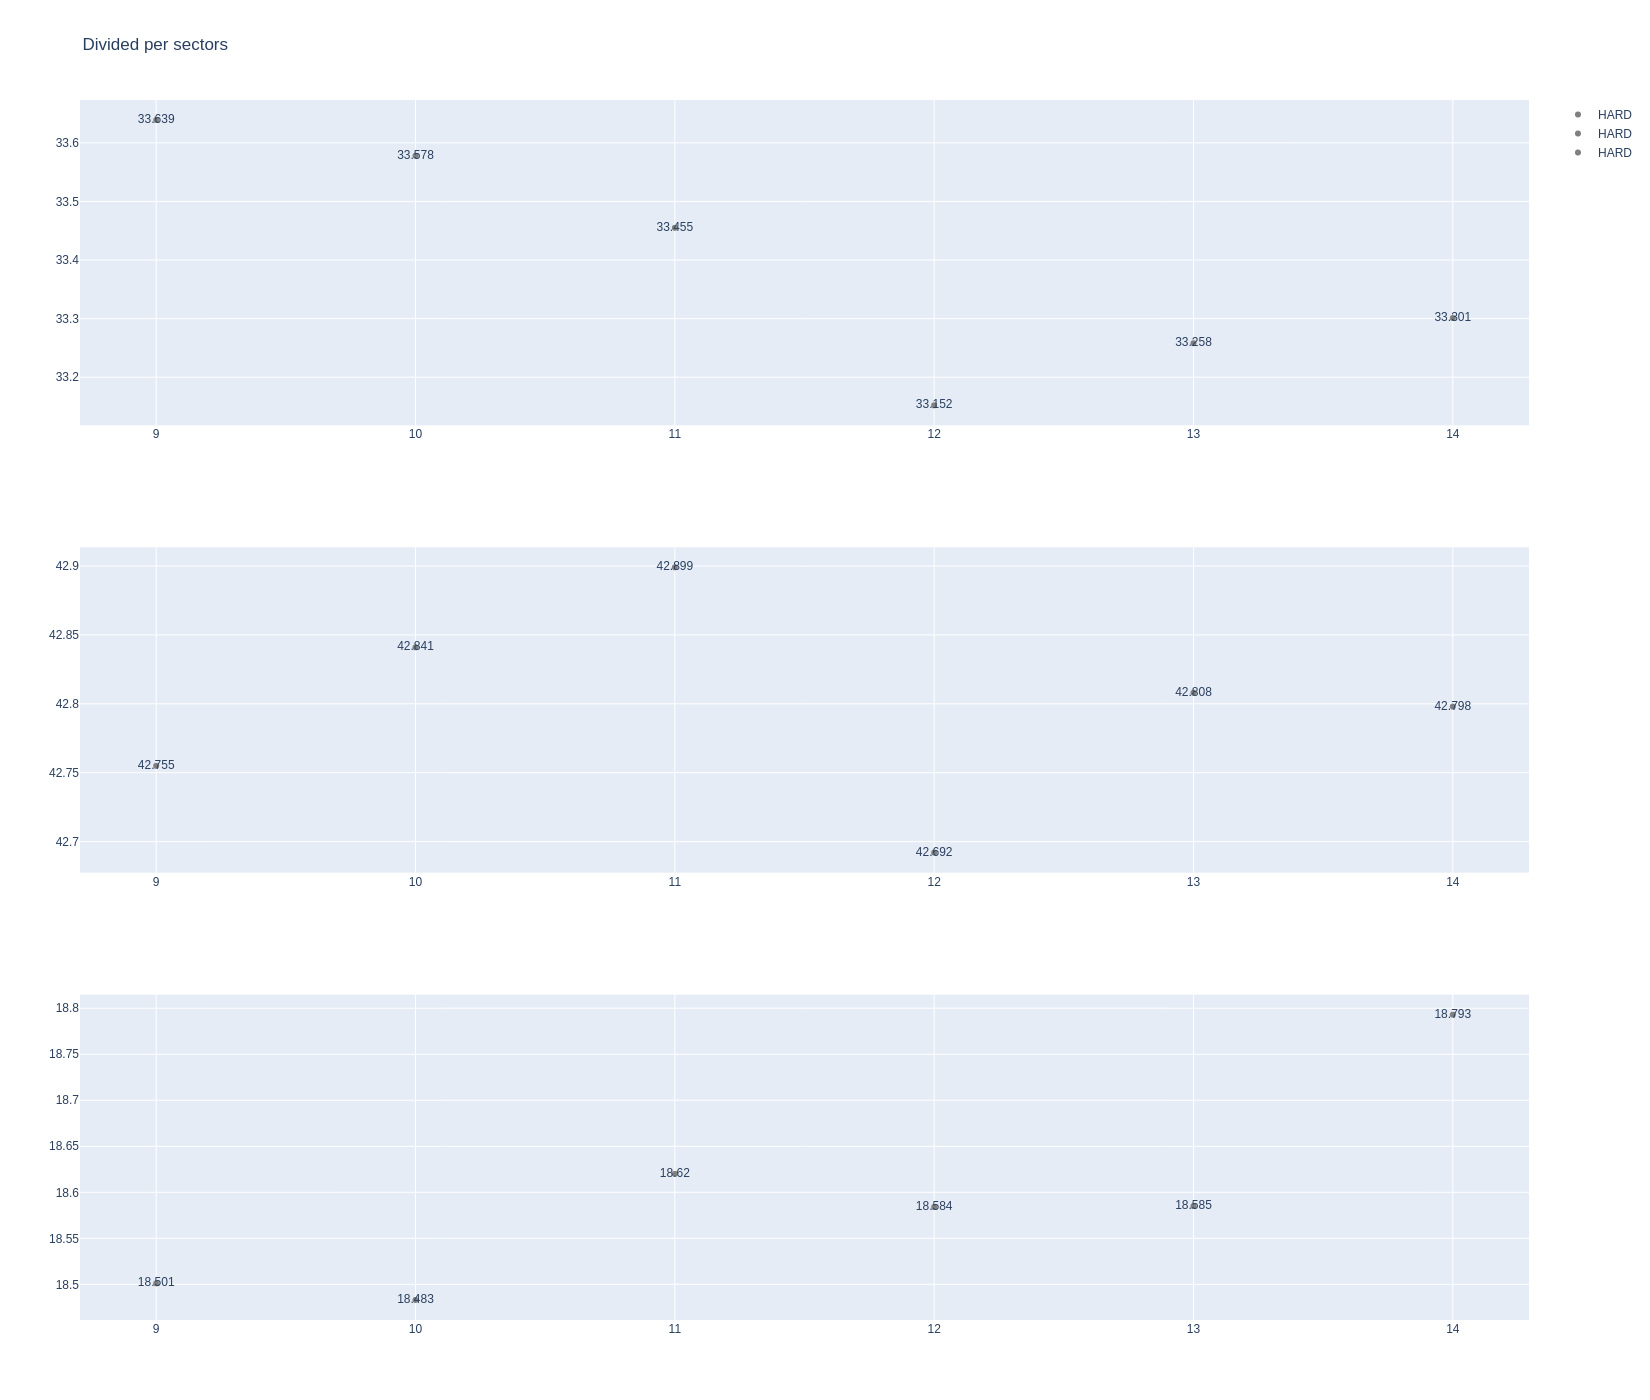

In [70]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [71]:
stintInformation.query('driver_number == 10 or driver_number == 7')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
18         1256        10001             1              7          1        5   
19         1256        10001             1             10          1        6   
41         1256        10001             2              7          6       11   
43         1256        10001             2             10          7       11   
60         1256        10001             3             10         12       14   
62         1256        10001             3              7         12       16   
69         1256        10001             4             10         15       16   

   compound  tyre_age_at_start  
18     SOFT                  0  
19   MEDIUM                  0  
41     SOFT                  4  
43   MEDIUM                  5  
60     SOFT                  0  
62     SOFT                  0  
69     SOFT                  0

In [72]:
data =libraryDataF1.getinfolongruns(jointables2,7,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
15  Jack DOOHAN     SOFT  2025-04-05T02:32:04.365000+00:00           2   

    duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
15             32.161             42.453             18.074        92.688

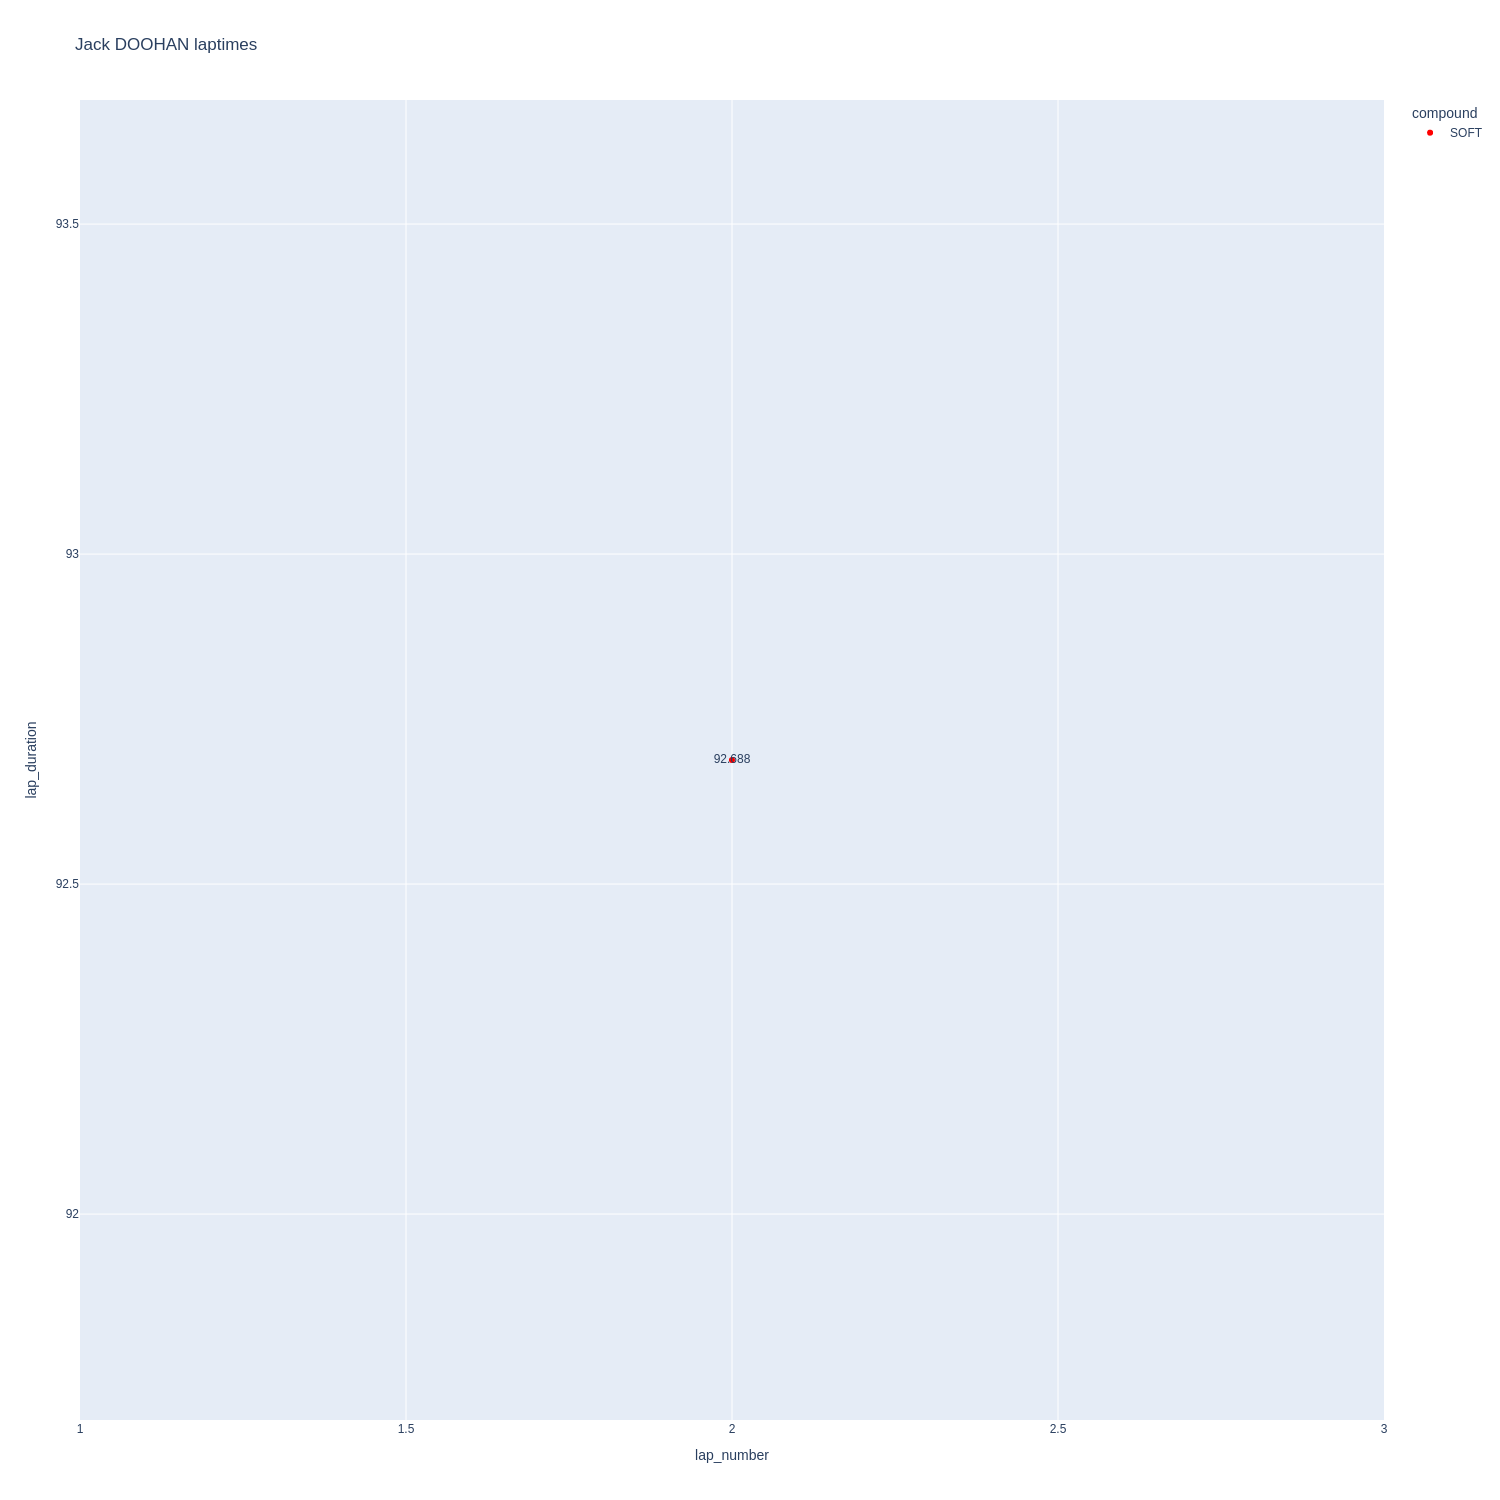

In [73]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

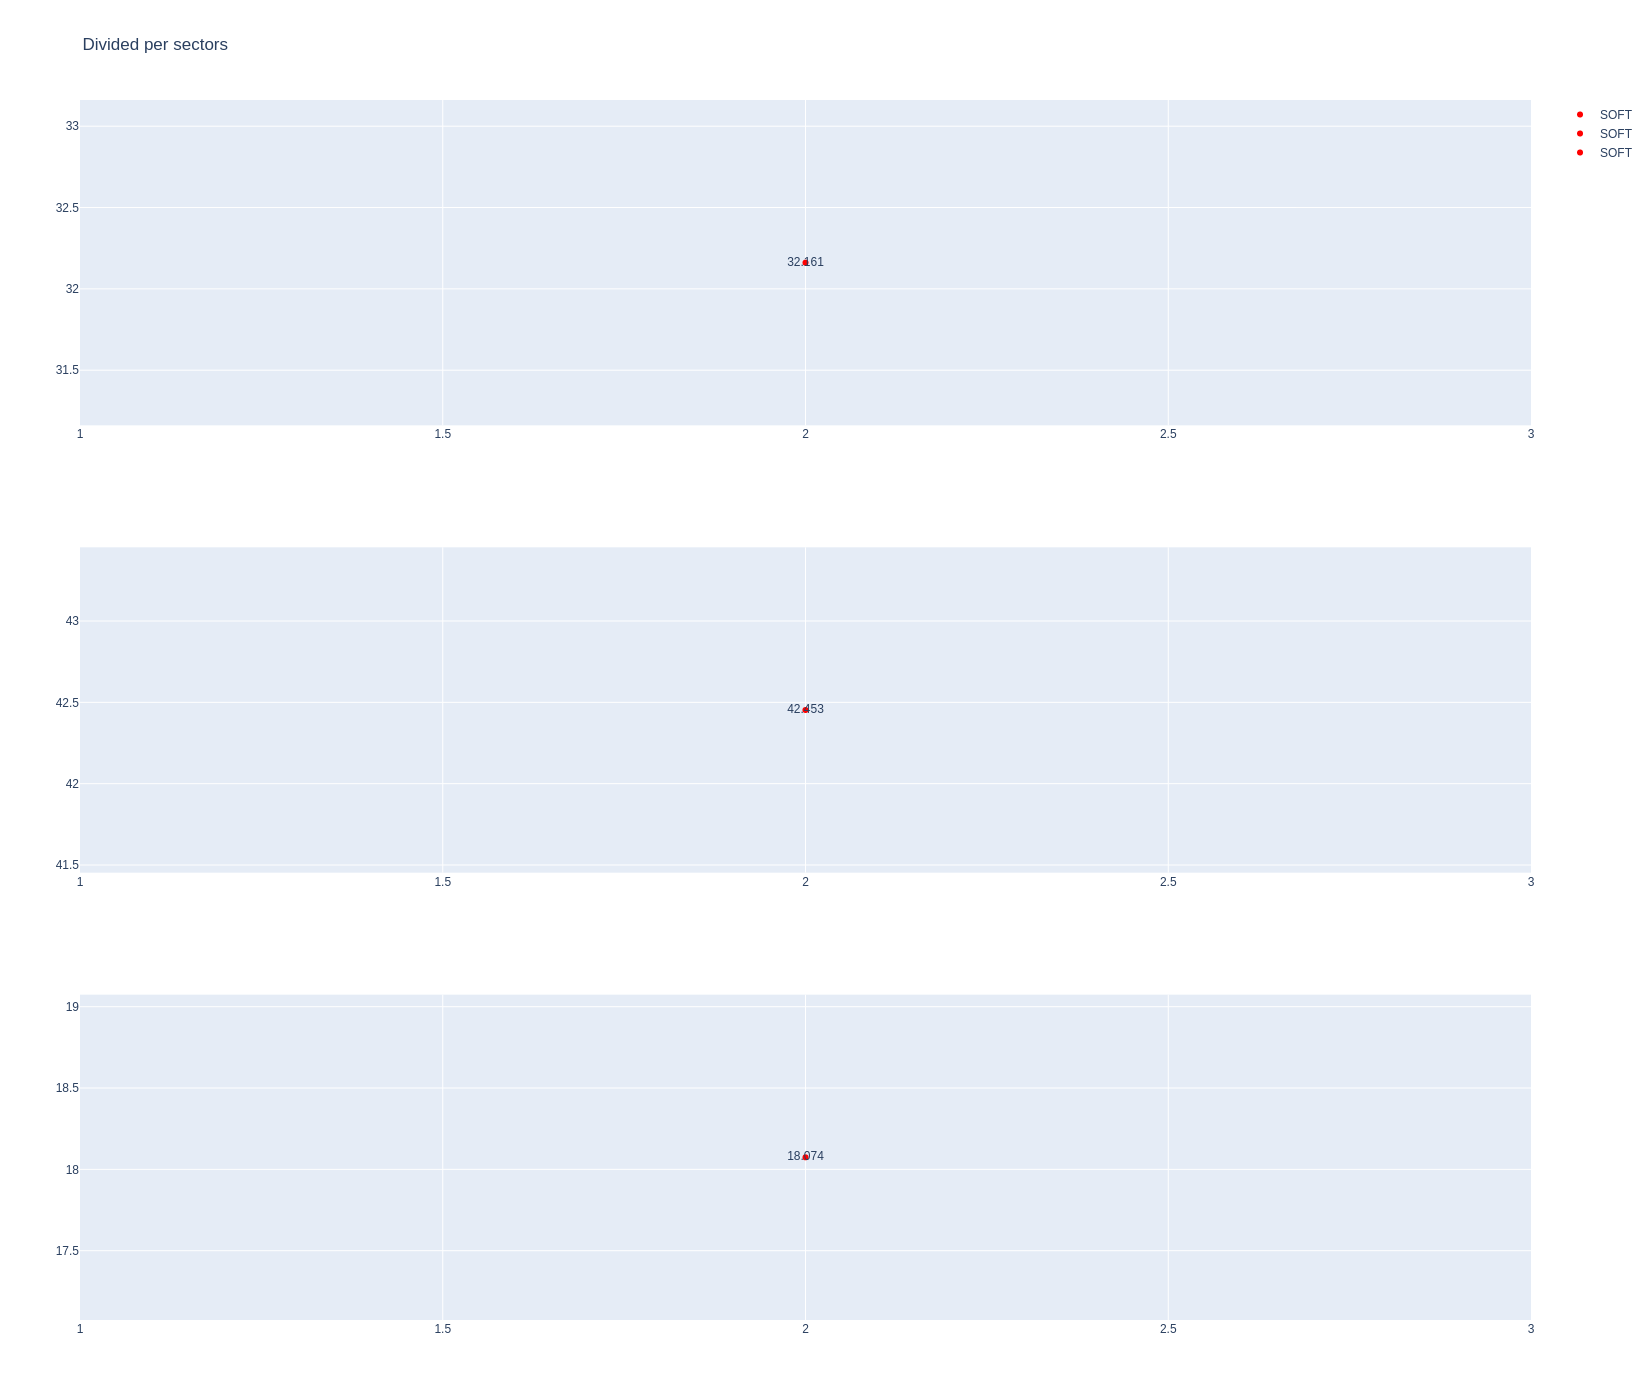

In [74]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [75]:
data = libraryDataF1.getinfolongruns(jointables2,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [76]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [77]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [78]:
stintInformation.query('driver_number == 55 or driver_number == 23')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
3          1256        10001             1             23          1        2   
16         1256        10001             1             55          1        4   
24         1256        10001             2             23          3        6   
38         1256        10001             2             55          5       11   
45         1256        10001             3             23          7       16   
64         1256        10001             3             55         12       19   
77         1256        10001             4             23         17       20   
82         1256        10001             4             55         20       22   
83         1256        10001             5             55         23       23   

   compound  tyre_age_at_start  
3    MEDIUM                  0  
16     HARD                  0  
24   MEDIUM                  0  
38     HARD                  4  
45   MEDIUM                  0  
64     HARD                 11  
77     SOFT                  0  
82     SOFT                  0  
83     SOFT                  0

In [79]:
data = libraryDataF1.getinfolongruns(jointables2,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
168  Alexander ALBON   MEDIUM  2025-04-05T02:59:09.717000+00:00           9   
206  Alexander ALBON   MEDIUM  2025-04-05T03:03:46.879000+00:00          12   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
168             33.422             41.857             18.017        93.296  
206             32.815             41.957             17.853        92.625

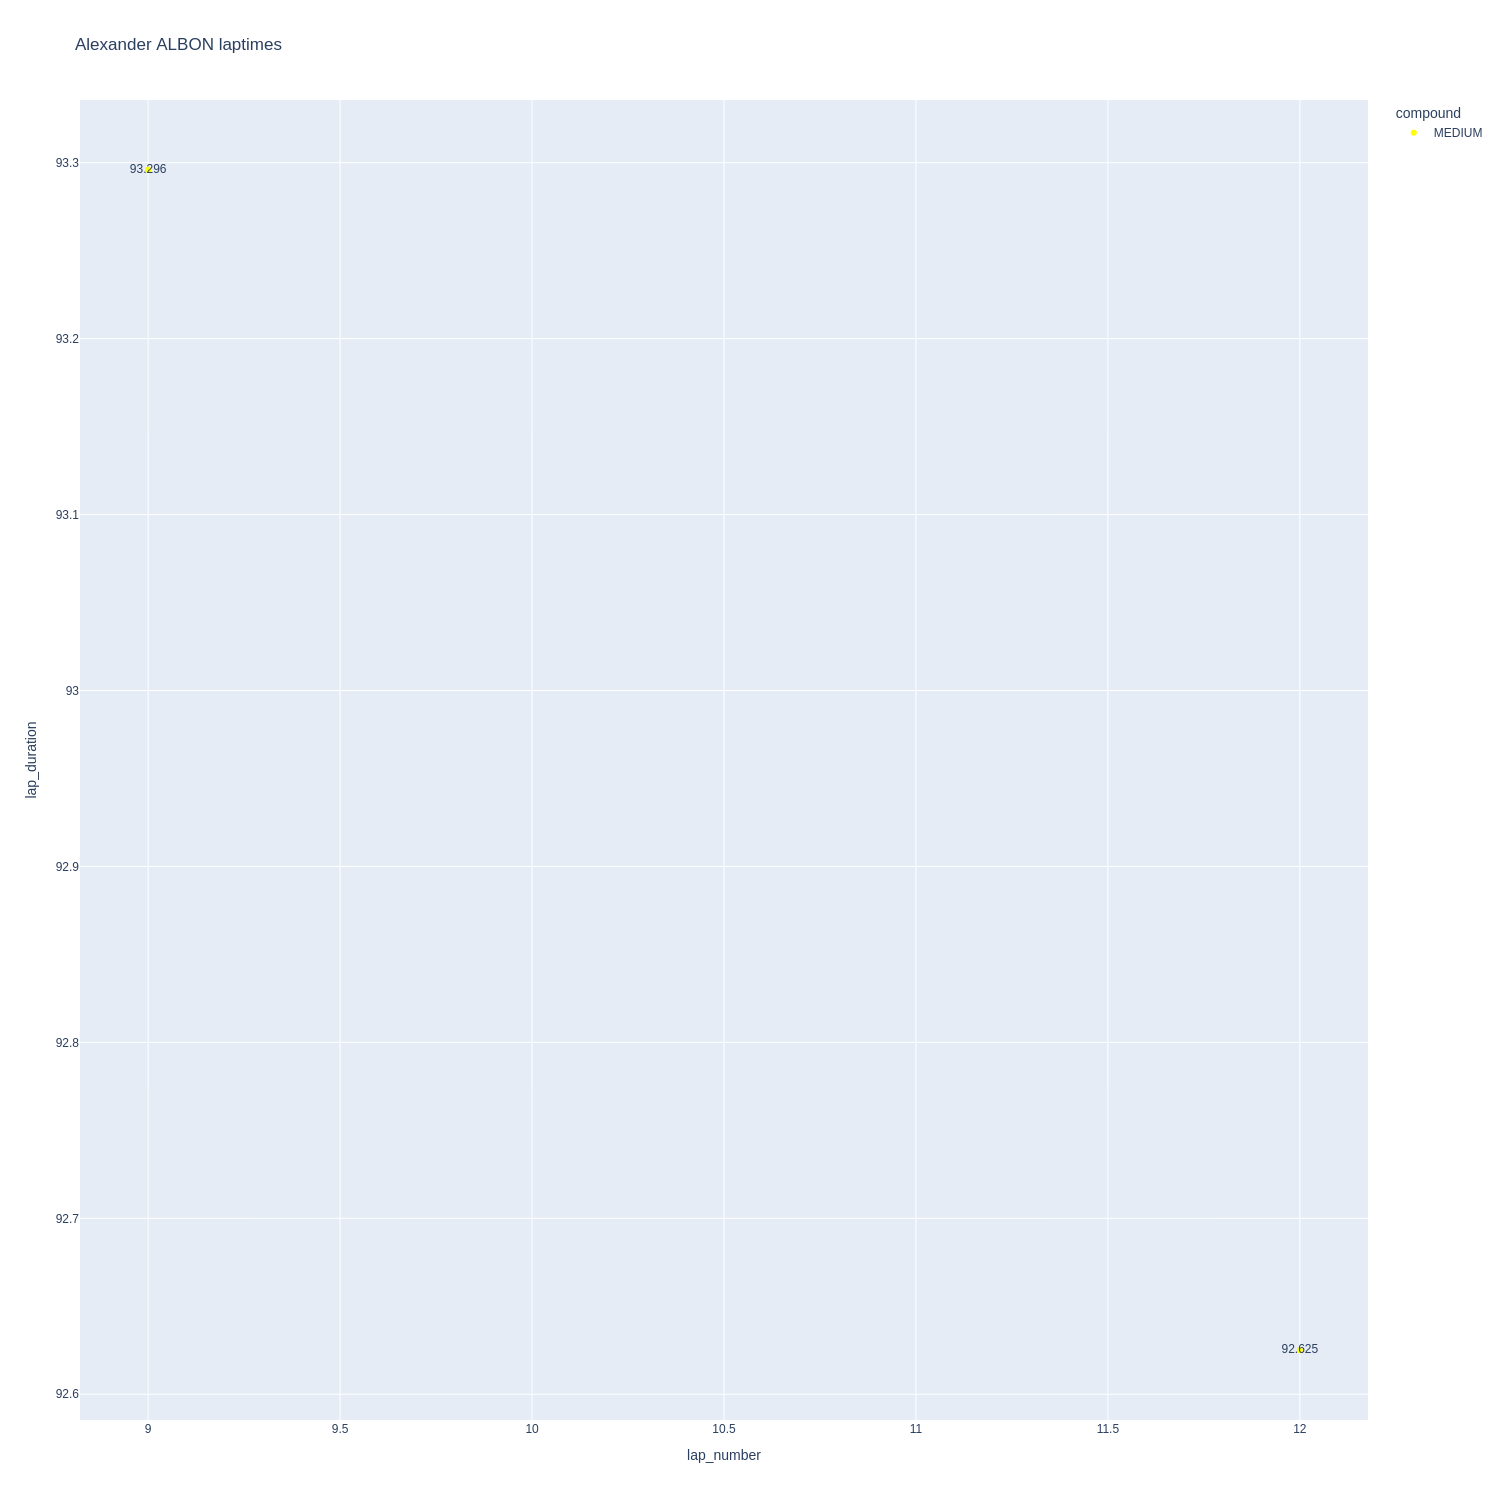

In [80]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

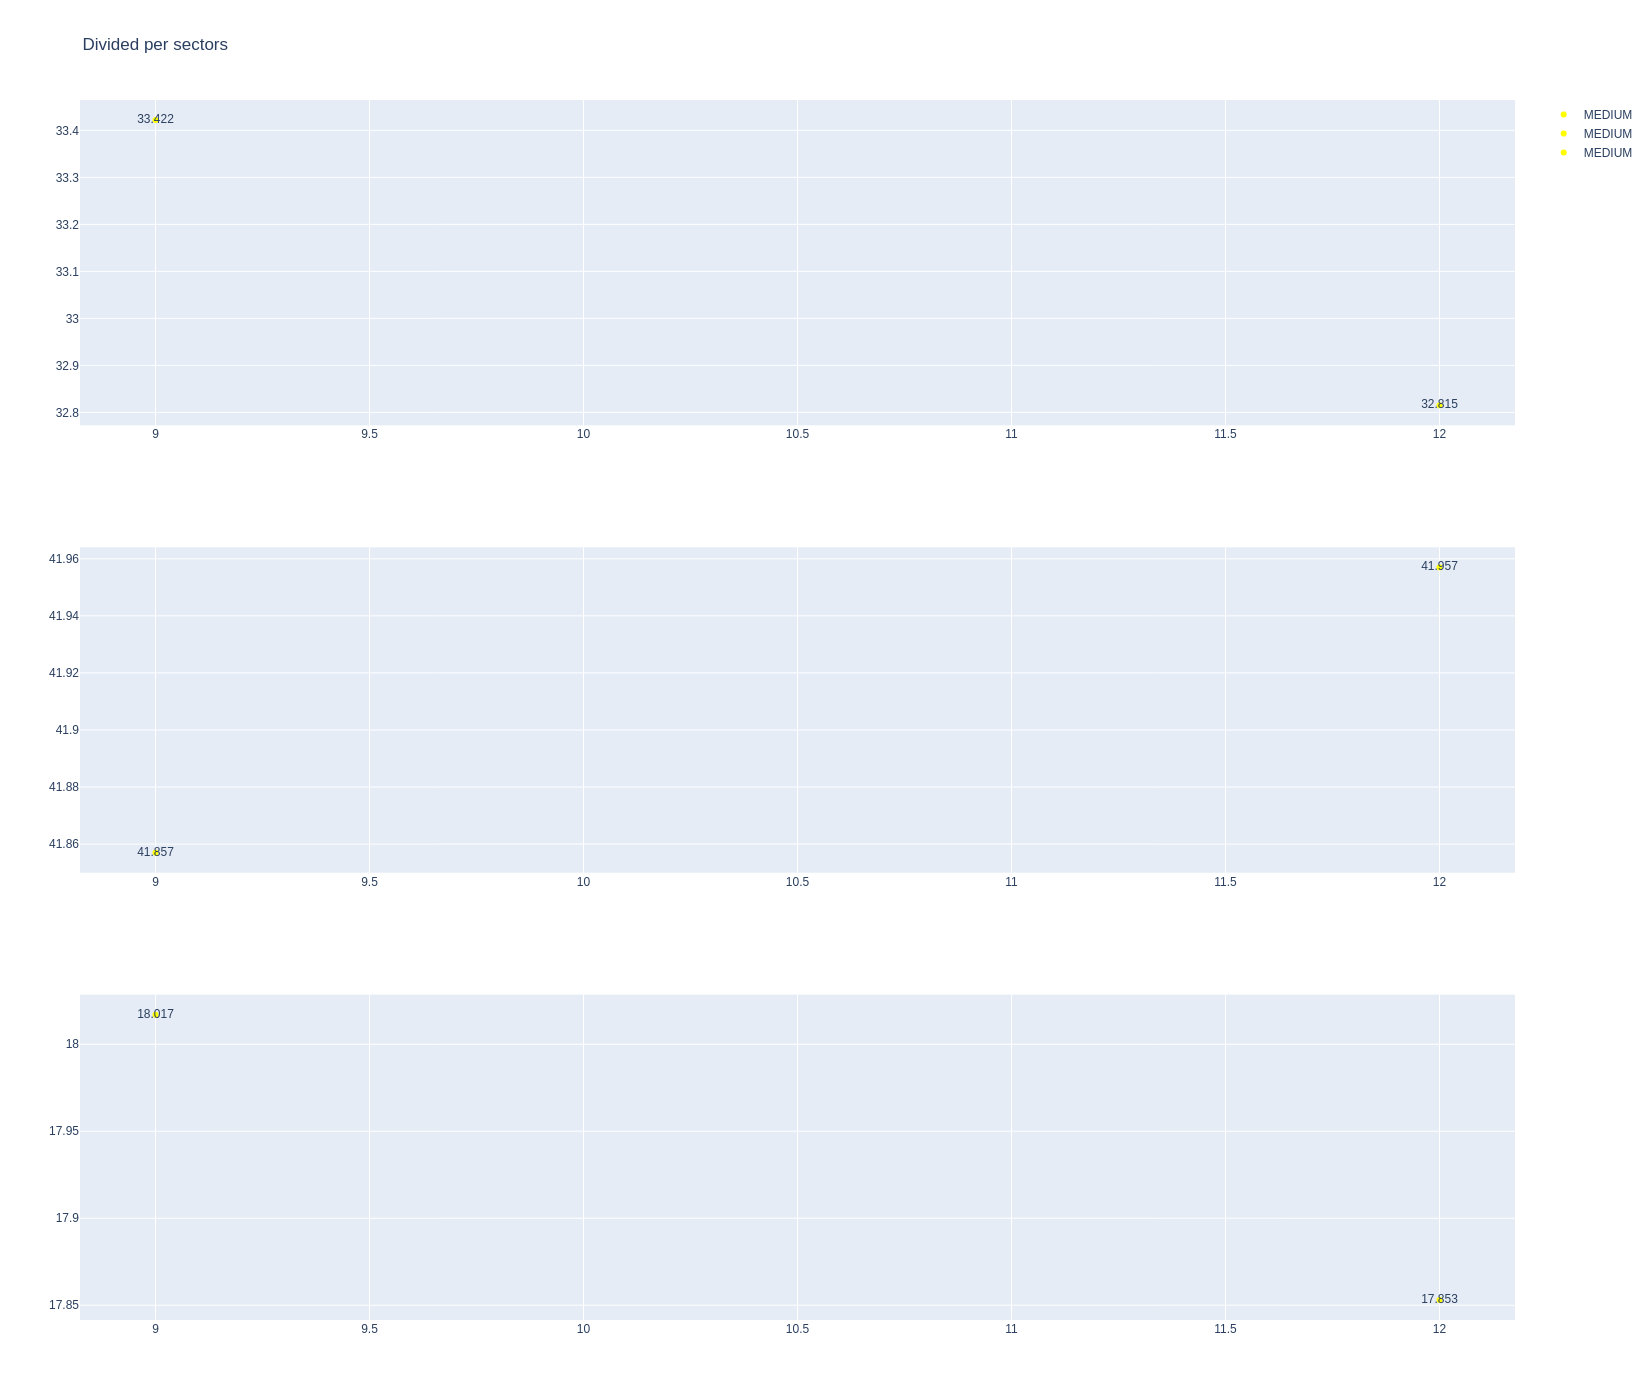

In [81]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [82]:
data= libraryDataF1.getinfolongruns(jointables2,55,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
253  Carlos SAINZ     HARD  2025-04-05T03:10:27.382000+00:00          18   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
253             32.068             41.745             21.126        94.939

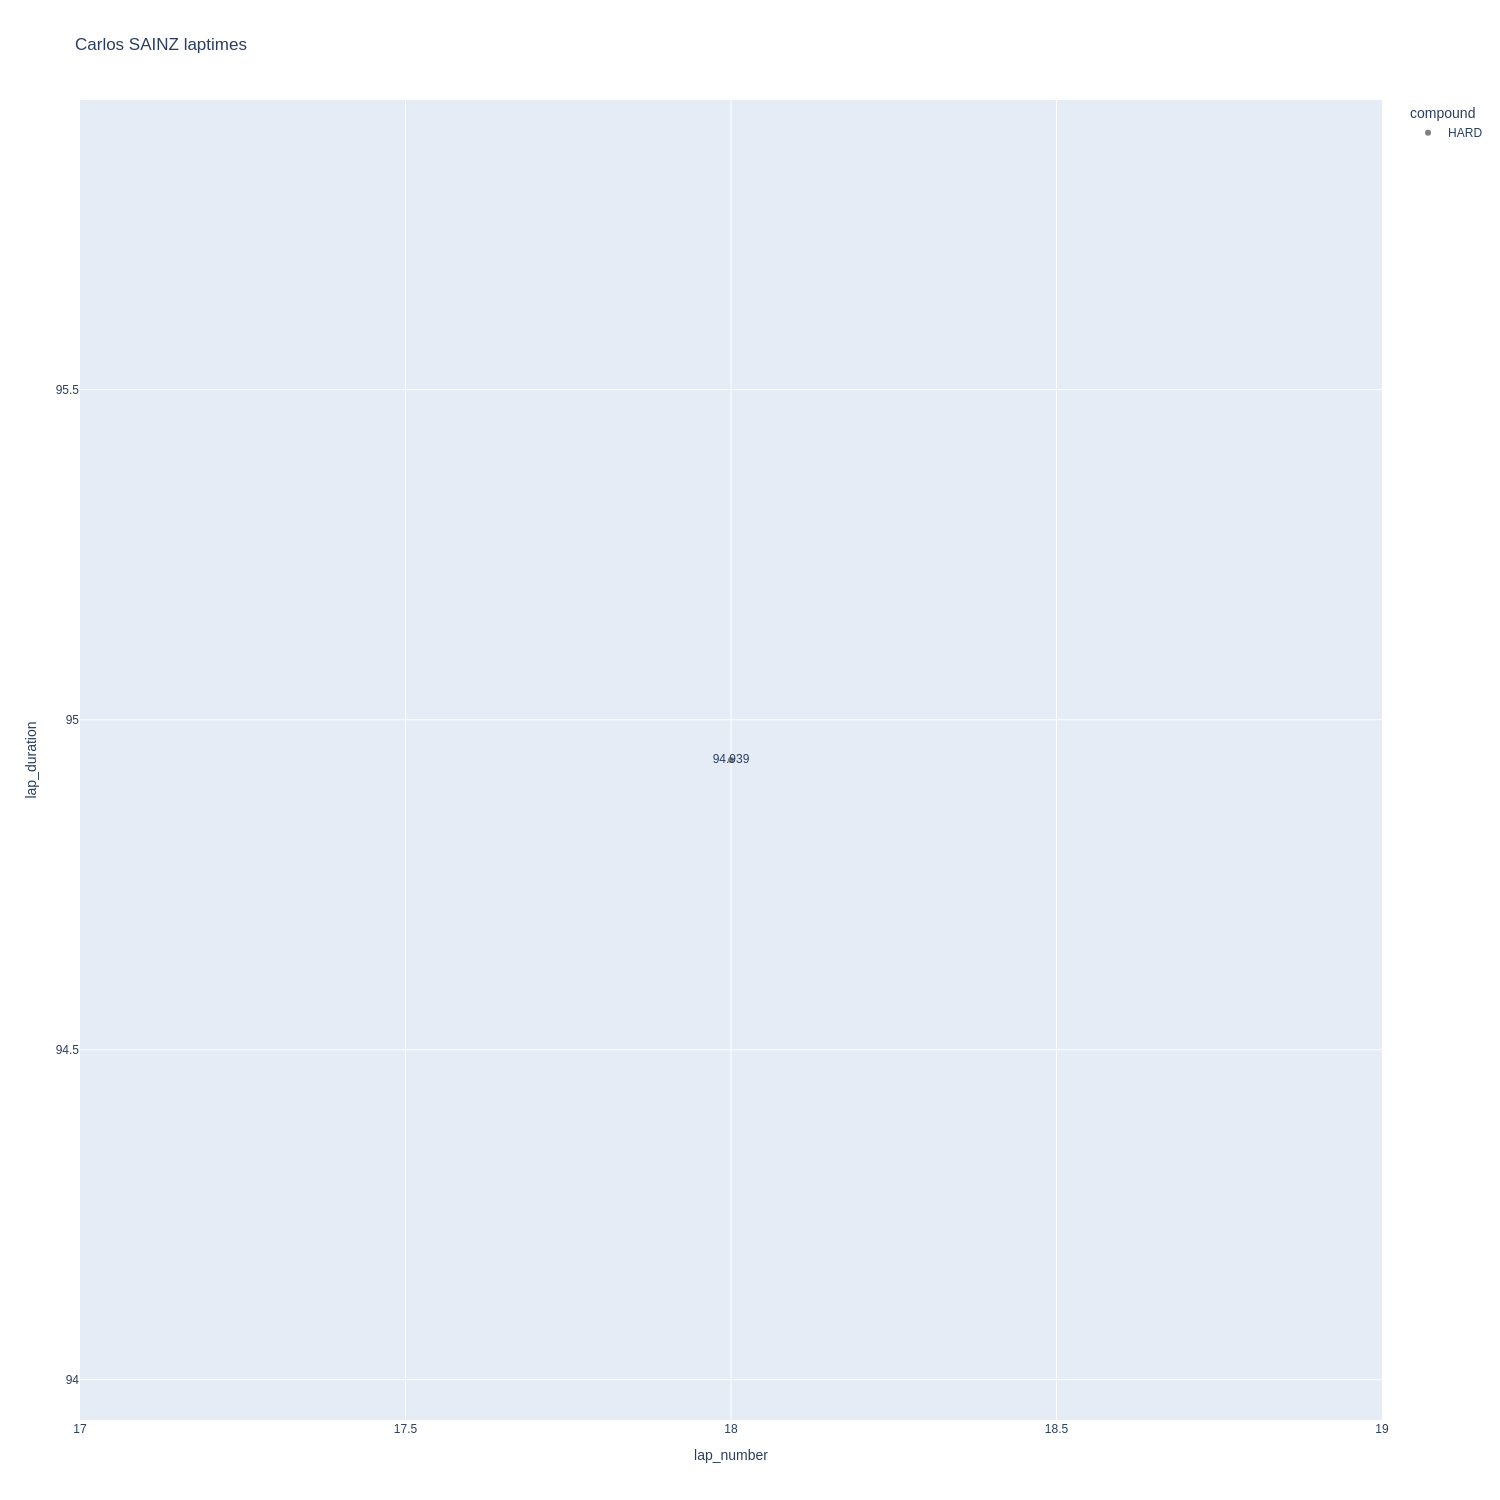

In [83]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

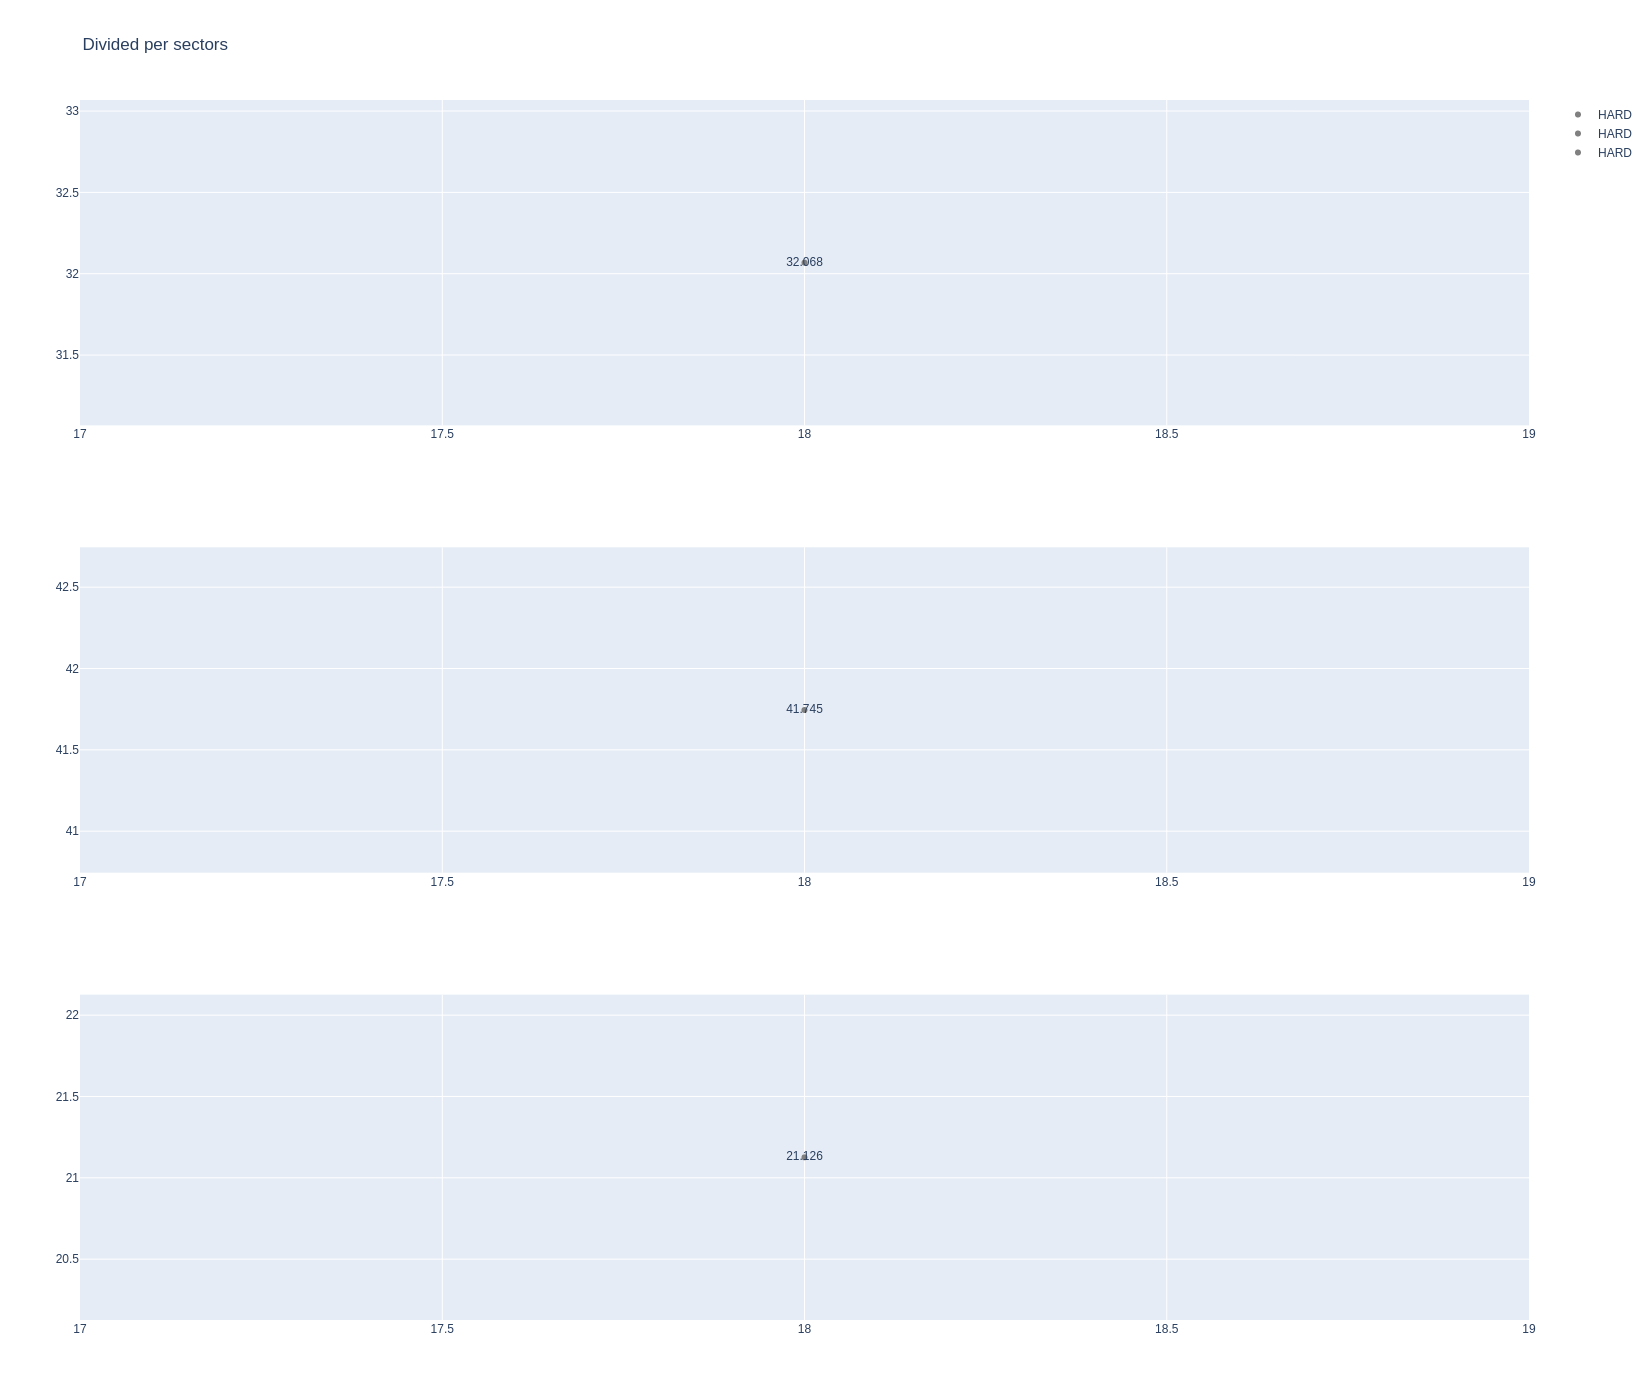

In [84]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [85]:
stintInformation.query('driver_number == 5 or driver_number == 27')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
10         1256        10001             1             27          1        3   
11         1256        10001             1              5          1        4   
29         1256        10001             2             27          4        7   
33         1256        10001             2              5          5        6   
44         1256        10001             3              5          7       12   
49         1256        10001             3             27          8       16   
65         1256        10001             4              5         13       14   
73         1256        10001             4             27         17       18   

   compound  tyre_age_at_start  
10   MEDIUM                  0  
11   MEDIUM                  0  
29   MEDIUM                  0  
33   MEDIUM                  0  
44   MEDIUM                  5  
49   MEDIUM                  6  
65     SOFT                  0  
73     SOFT                  0

In [86]:
data = libraryDataF1.getinfolongruns(jointables2,5,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [87]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [88]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [89]:
data = libraryDataF1.getinfolongruns(jointables2,27,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
29   Nico HULKENBERG   MEDIUM  2025-04-05T02:34:10.144000+00:00           2   
165  Nico HULKENBERG   MEDIUM  2025-04-05T02:58:56.373000+00:00           8   
178  Nico HULKENBERG   MEDIUM  2025-04-05T03:00:30.221000+00:00           9   
191  Nico HULKENBERG   MEDIUM  2025-04-05T03:02:03.972000+00:00          10   
204  Nico HULKENBERG   MEDIUM  2025-04-05T03:03:38.410000+00:00          11   
232  Nico HULKENBERG   MEDIUM  2025-04-05T03:06:48.427000+00:00          13   
242  Nico HULKENBERG   MEDIUM  2025-04-05T03:08:21.288000+00:00          14   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
29              32.759             41.318             18.214        92.291  
165             33.845             41.871             18.152        93.868  
178             33.396             41.969             18.301        93.666  
191             33.421             42.827             18.254        94.502  
204             33.176             42.343             18.271        93.790  
232             32.799             41.951             18.066        92.816  
242             33.189             42.394             18.424        94.007

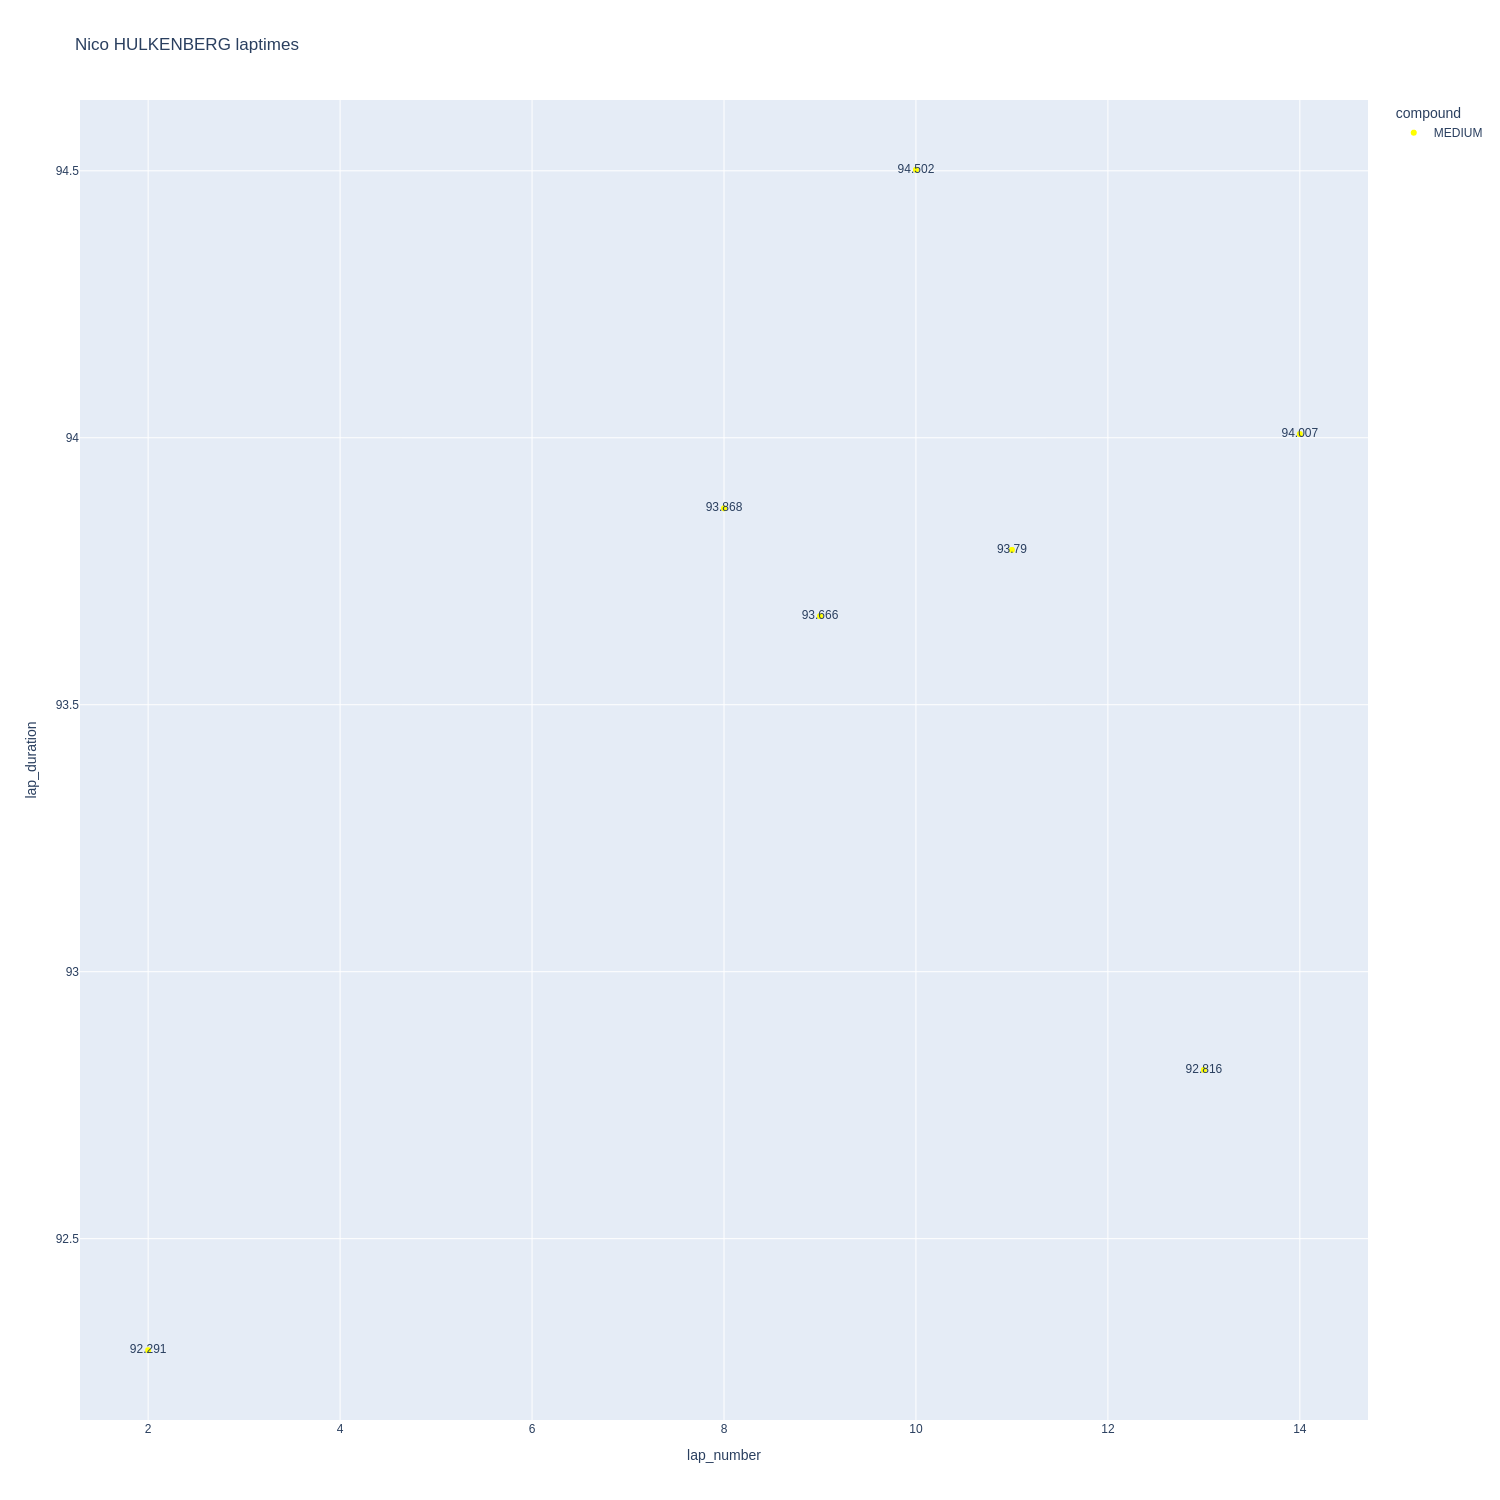

In [90]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

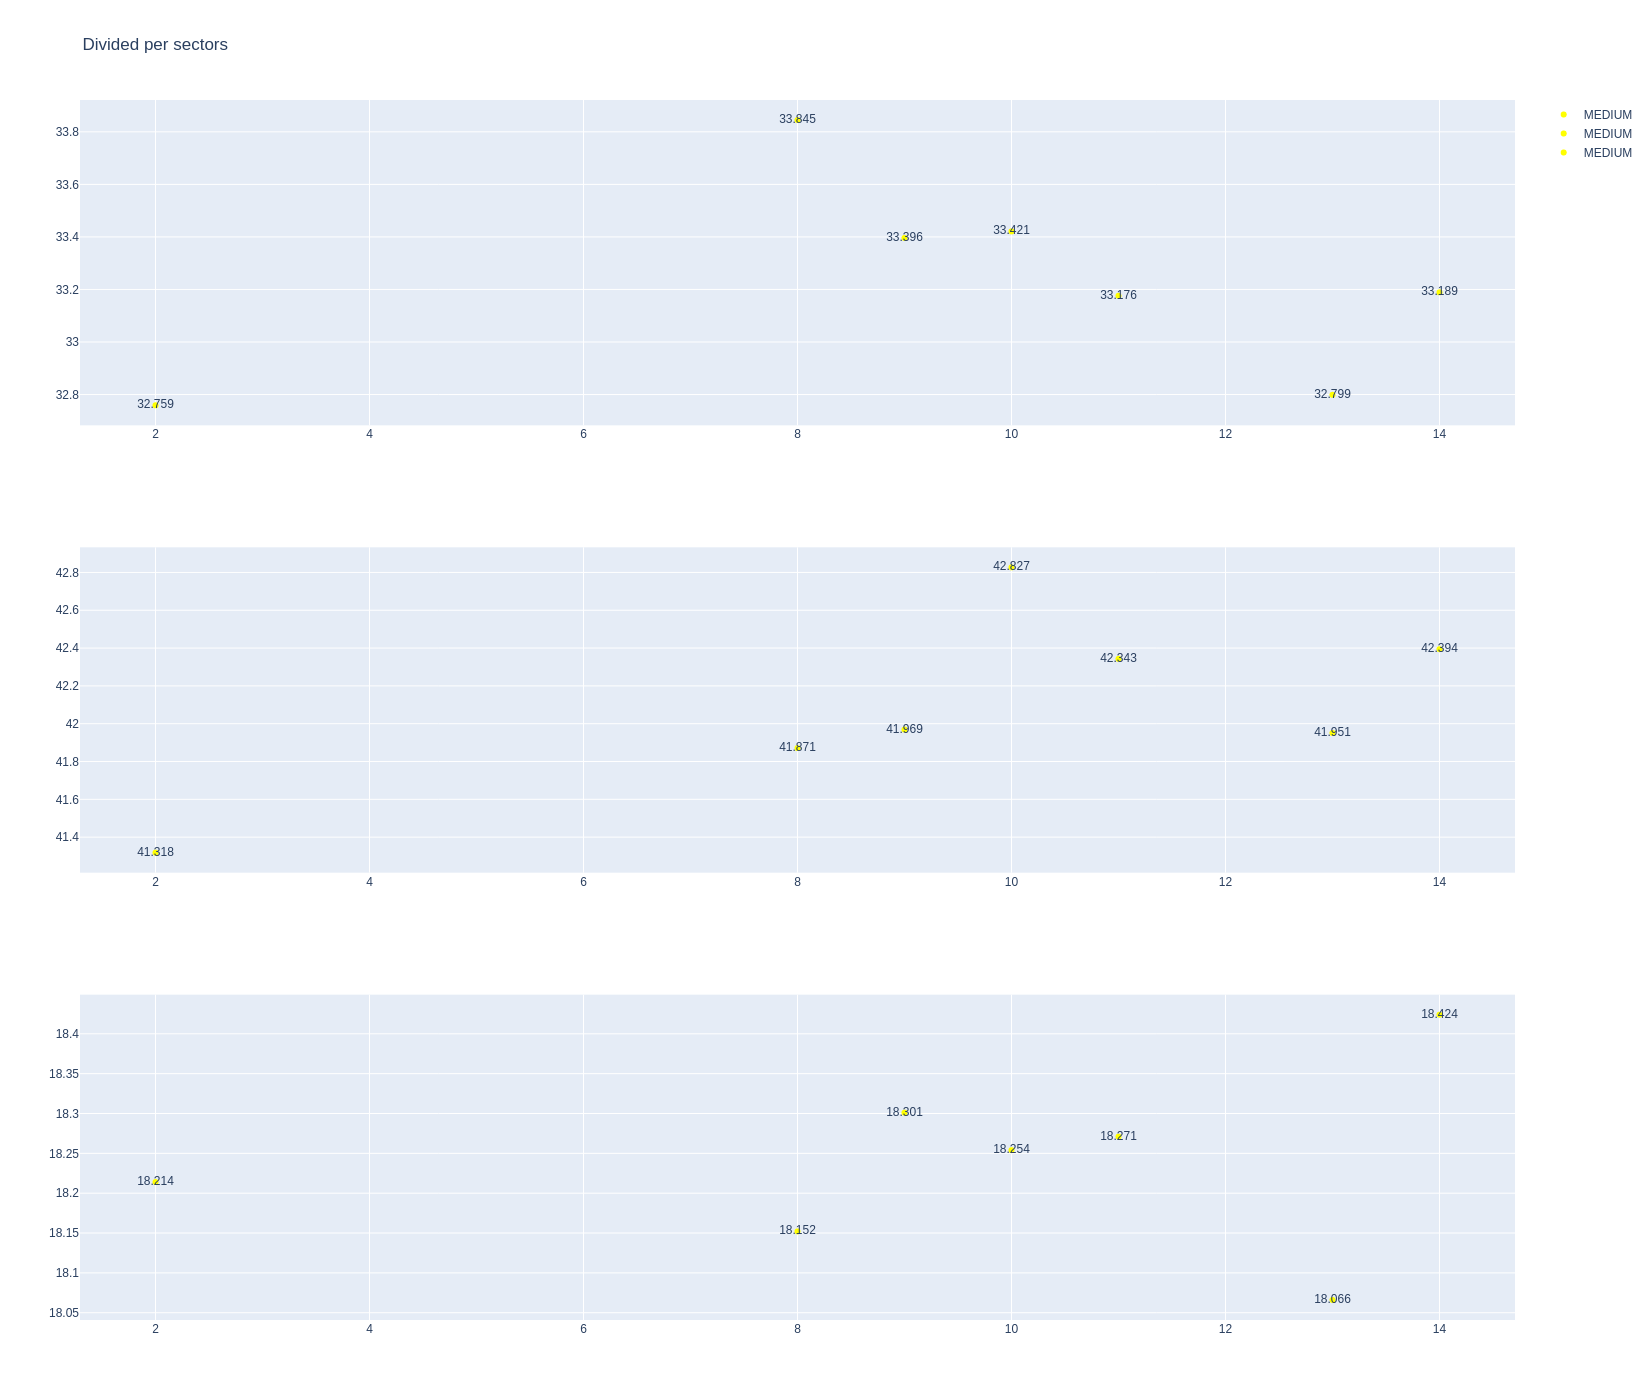

In [91]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Long runs mean for each driver

In [92]:
longrun_data = libraryDataF1.obtainLongRunData(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Sorted by lap duration
Only Mercedes and Red Bull did long stints. Red Bull had a poor pace and they had some problems in sector 2 with the degradation. On the other hand, Mercedes was faster in general but they had degradation in sector 3.
Haas suffered in the first sector.


In [93]:
sorted_laps = pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3'])

In [94]:
sorted_laps.sort_values(by='lap_duration',ascending=True)

driver compound  lap_duration    sector1    sector2    sector3
11    Oscar PIASTRI     SOFT     92.414000  33.934000  40.605000  17.875000
5   Fernando ALONSO   MEDIUM     92.487333  32.553333  41.873667  18.060333
3       Jack DOOHAN     SOFT     92.688000  32.161000  42.453000  18.074000
6   Alexander ALBON   MEDIUM     92.960500  33.118500  41.907000  17.935000
4    Kimi ANTONELLI   MEDIUM     93.038250  33.058750  41.993500  17.986000
7   Nico HULKENBERG   MEDIUM     93.562857  33.226429  42.096143  18.240286
0    Max VERSTAPPEN     HARD     94.036500  33.314750  42.393500  18.328250
2      Isack HADJAR     HARD     94.193500  33.382000  42.525000  18.286500
1      Lando NORRIS     SOFT     94.267000  31.698000  41.705000  20.864000
12   Oliver BEARMAN     HARD     94.656750  33.325250  42.904000  18.427500
9      Esteban OCON     HARD     94.790333  33.397167  42.798833  18.594333
8       Liam LAWSON   MEDIUM     94.853600  33.646600  42.809400  18.397600
10     Carlos SAINZ     HARD     94.939000  32.068000  41.745000  21.126000

##### Sorted by sector 1
Piastri and Hamilton are strong in this sector being the  leaders of their teams. Also Alonso is strong and this could help him to win some positions. Red Bull will suffer on race.

In [95]:
sorted_laps.sort_values(by='sector1',ascending=True)[['driver','compound','sector1']]

driver compound    sector1
1      Lando NORRIS     SOFT  31.698000
10     Carlos SAINZ     HARD  32.068000
3       Jack DOOHAN     SOFT  32.161000
5   Fernando ALONSO   MEDIUM  32.553333
4    Kimi ANTONELLI   MEDIUM  33.058750
6   Alexander ALBON   MEDIUM  33.118500
7   Nico HULKENBERG   MEDIUM  33.226429
0    Max VERSTAPPEN     HARD  33.314750
12   Oliver BEARMAN     HARD  33.325250
2      Isack HADJAR     HARD  33.382000
9      Esteban OCON     HARD  33.397167
8       Liam LAWSON   MEDIUM  33.646600
11    Oscar PIASTRI     SOFT  33.934000

##### Sorted by sector 2
Ferrari is strong here so it could make sense to say that the car is focused on turns. Racing Bulls were fast here so it could help to make overcuts on race.

In [96]:
sorted_laps.sort_values(by='sector2',ascending=True)[['driver','compound','sector2']]

driver compound    sector2
11    Oscar PIASTRI     SOFT  40.605000
1      Lando NORRIS     SOFT  41.705000
10     Carlos SAINZ     HARD  41.745000
5   Fernando ALONSO   MEDIUM  41.873667
6   Alexander ALBON   MEDIUM  41.907000
4    Kimi ANTONELLI   MEDIUM  41.993500
7   Nico HULKENBERG   MEDIUM  42.096143
0    Max VERSTAPPEN     HARD  42.393500
3       Jack DOOHAN     SOFT  42.453000
2      Isack HADJAR     HARD  42.525000
9      Esteban OCON     HARD  42.798833
8       Liam LAWSON   MEDIUM  42.809400
12   Oliver BEARMAN     HARD  42.904000

##### Sorted by sector 3
McLaren was the best here and if they take advantage this sector, they could extend the gap on race. Alpine could gain some positions thanks to the focus on the straight. Red Bull will suffer here.

In [97]:
sorted_laps.sort_values(by='sector3',ascending=True)[['driver','compound','sector3']]

driver compound    sector3
11    Oscar PIASTRI     SOFT  17.875000
6   Alexander ALBON   MEDIUM  17.935000
4    Kimi ANTONELLI   MEDIUM  17.986000
5   Fernando ALONSO   MEDIUM  18.060333
3       Jack DOOHAN     SOFT  18.074000
7   Nico HULKENBERG   MEDIUM  18.240286
2      Isack HADJAR     HARD  18.286500
0    Max VERSTAPPEN     HARD  18.328250
8       Liam LAWSON   MEDIUM  18.397600
12   Oliver BEARMAN     HARD  18.427500
9      Esteban OCON     HARD  18.594333
1      Lando NORRIS     SOFT  20.864000
10     Carlos SAINZ     HARD  21.126000

#### Long runs mean

In [98]:
longruns_summary = libraryDataF1.obtainMeanLongRuns(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Mean pace per compound

In [102]:
libraryDataF1.showDataLongRuns(longruns_summary,"MEDIUM","mean_lap_time",['driver','mean_lap_time'])

driver  mean_lap_time
5      F ALONSO         92.487
6       A ALBON         92.960
4   K ANTONELLI         93.038
7  N HULKENBERG         93.563
8      L LAWSON         94.854

In [103]:
libraryDataF1.showDataLongRuns(longruns_summary,"SOFT","mean_lap_time",['driver','mean_lap_time'])

driver  mean_lap_time
11  O PIASTRI         92.414
3    J DOOHAN         92.688
1    L NORRIS         94.267

In [104]:
libraryDataF1.showDataLongRuns(longruns_summary,"HARD","mean_lap_time",['driver','mean_lap_time'])

driver  mean_lap_time
0   M VERSTAPPEN         94.036
2       I HADJAR         94.194
12     O BEARMAN         94.657
9         E OCON         94.790
10       C SAINZ         94.939

### Comparaison between the poleman and the second

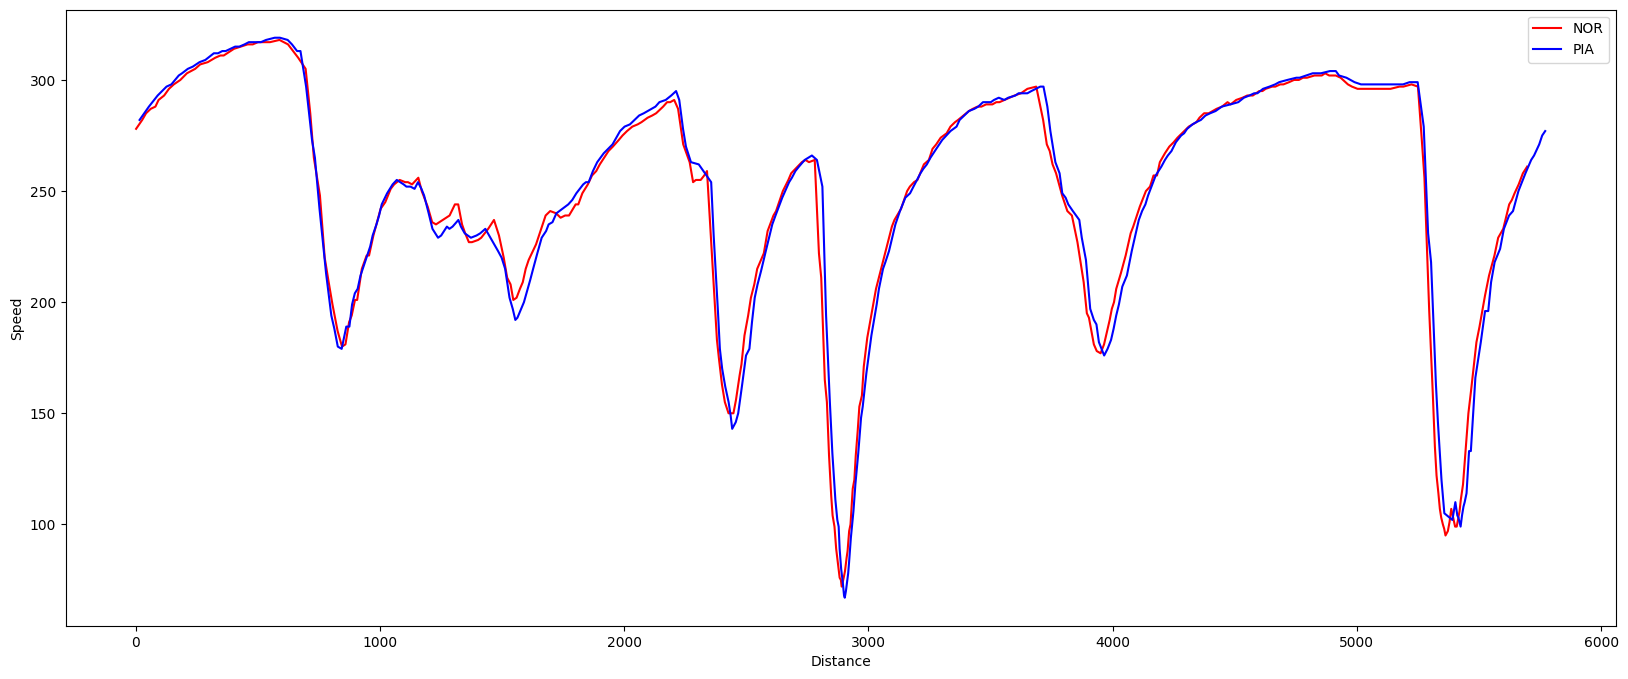

In [105]:
libraryDataF1.plot_telemetry("Distance","Speed",dt,session)

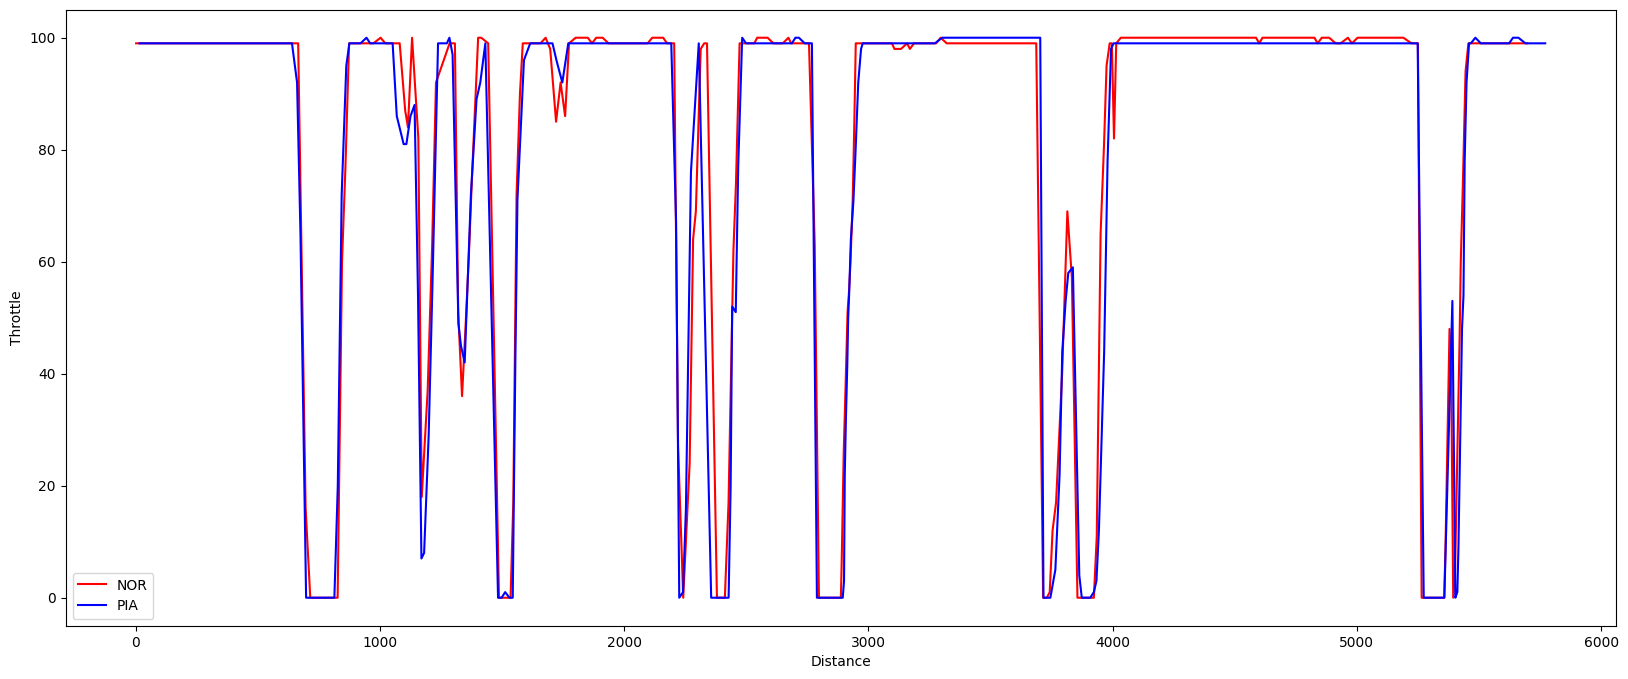

In [106]:
libraryDataF1.plot_telemetry("Distance","Throttle",dt,session)

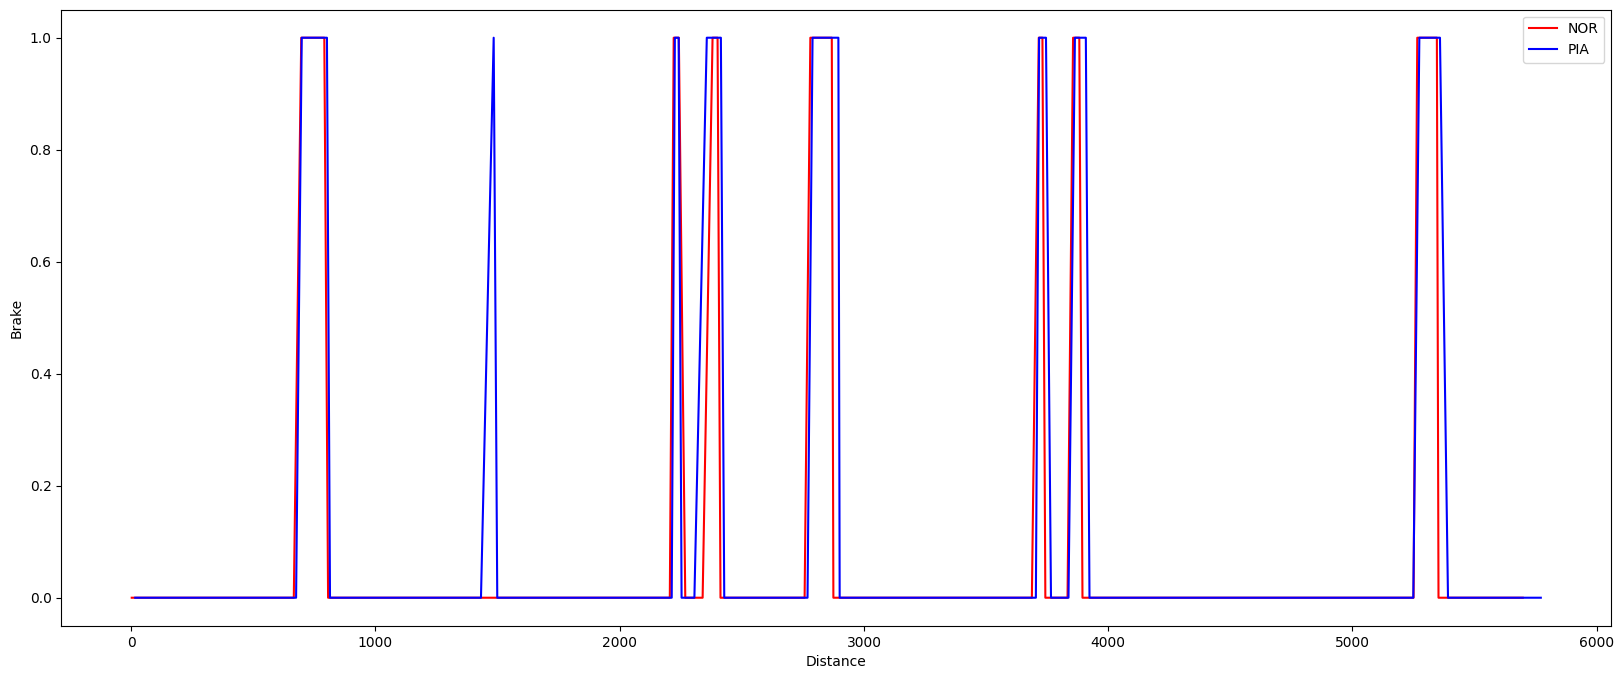

In [107]:
libraryDataF1.plot_telemetry("Distance","Brake",dt,session)

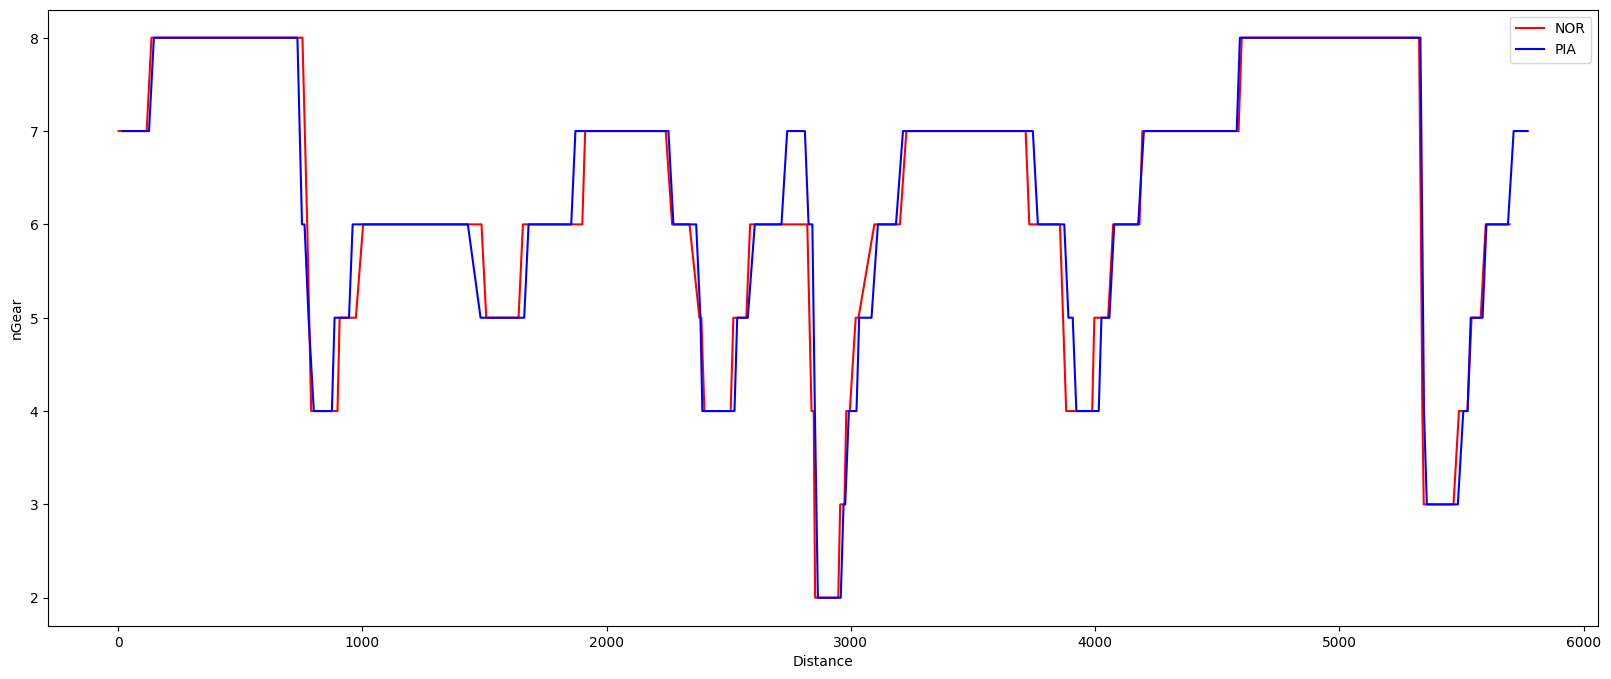

In [108]:
libraryDataF1.plot_telemetry("Distance","nGear",dt,session)

## Qualyfing
### Set up
First of all, it is neccesary to obtain the data about the qualyfing
#### Race control
This section has been added in order to know which laps has been deleted and knowing what happened on track during this session.

In [109]:
libraryDataF1.obtain_information('race_control',session_key=10002)

session_key  meeting_key                       date category       flag  \
0         10002         1256  2025-04-05T05:45:19+00:00    Other       None   
1         10002         1256  2025-04-05T05:45:29+00:00    Other       None   
2         10002         1256  2025-04-05T06:00:00+00:00     Flag      GREEN   
3         10002         1256  2025-04-05T06:18:00+00:00     Flag  CHEQUERED   
4         10002         1256  2025-04-05T06:18:12+00:00    Other       None   
5         10002         1256  2025-04-05T06:21:59+00:00    Other       None   
6         10002         1256  2025-04-05T06:22:28+00:00    Other       None   
7         10002         1256  2025-04-05T06:23:26+00:00    Other       None   
8         10002         1256  2025-04-05T06:25:00+00:00     Flag      GREEN   
9         10002         1256  2025-04-05T06:31:35+00:00     Flag        RED   
10        10002         1256  2025-04-05T06:36:51+00:00    Other       None   
11        10002         1256  2025-04-05T06:37:14+00:00     Flag      CLEAR   
12        10002         1256  2025-04-05T06:37:16+00:00    Other       None   
13        10002         1256  2025-04-05T06:37:30+00:00      Drs       None   
14        10002         1256  2025-04-05T06:39:00+00:00     Flag      GREEN   
15        10002         1256  2025-04-05T06:47:26+00:00     Flag  CHEQUERED   
16        10002         1256  2025-04-05T06:48:05+00:00    Other       None   
17        10002         1256  2025-04-05T06:48:54+00:00    Other       None   
18        10002         1256  2025-04-05T06:49:01+00:00    Other       None   
19        10002         1256  2025-04-05T06:49:08+00:00    Other       None   
20        10002         1256  2025-04-05T06:50:40+00:00    Other       None   
21        10002         1256  2025-04-05T06:50:59+00:00    Other       None   
22        10002         1256  2025-04-05T06:51:43+00:00    Other       None   
23        10002         1256  2025-04-05T06:56:00+00:00     Flag      GREEN   
24        10002         1256  2025-04-05T07:08:00+00:00     Flag  CHEQUERED   
25        10002         1256  2025-04-05T07:08:14+00:00    Other       None   
26        10002         1256  2025-04-05T07:11:20+00:00    Other       None   
27        10002         1256  2025-04-05T07:11:29+00:00    Other       None   

   lap_number                                            message  \
0        None       RISK OF RAIN FOR F1 QUALIFYING SESSION IS 0%   
1        None      LIGHT BLUE HEAD PADDING MATERIAL MUST BE USED   
2        None                        GREEN LIGHT - PIT EXIT OPEN   
3        None                                     CHEQUERED FLAG   
4        None           FIRST CAR TO TAKE THE FLAG - CAR 7 (DOO)   
5        None  FIA STEWARDS: Q1 INCIDENT INVOLVING CARS 22 (T...   
6        None  FIA STEWARDS: Q1 INCIDENT INVOLVING CARS 22 (T...   
7        None  CAR 18 (STR) LAP DELETED - TRACK LIMITS AT TUR...   
8        None                        GREEN LIGHT - PIT EXIT OPEN   
9        None                                           RED FLAG   
10       None            ESTIMATED TIME OF Q2 RESUMPTION - 15:39   
11       None                                        TRACK CLEAR   
12       None                            Q2 WILL RESUME AT 15:39   
13       None                                        DRS ENABLED   
14       None                        GREEN LIGHT - PIT EXIT OPEN   
15       None                                     CHEQUERED FLAG   
16       None  TURN 1 INCIDENT INVOLVING CARS 55 (SAI) AND 44...   
17       None          FIRST CAR TO TAKE THE FLAG - CAR 16 (LEC)   
18       None  CAR 44 (HAM) LAP DELETED - TRACK LIMITS AT TUR...   
19       None  FIA STEWARDS: TURN 1 INCIDENT INVOLVING CARS 5...   
20       None                             Q3 WILL START AT 15:56   
21       None  FIA STEWARDS: Q2 INCIDENT INVOLVING CAR 22 (TS...   
22       None  FIA STEWARDS: Q2 INCIDENT INVOLVING CAR 22 (TS...   
23       None                        GREEN LIGHT - PIT EXIT OPEN   
24       Non

### Obtain setup

In [110]:
qualyfing = libraryDataF1.obtain_information('laps',session_key=10002)
stintInformation = libraryDataF1.obtain_information('stints',session_key=10002)
drivers = libraryDataF1.obtain_information('drivers',session_key=10002)
libraryDataF1.obtain_drivers_colours(drivers)

In [111]:
session = ff1.get_session(2025, 3, 'Q')
session.load()
session.laps["LapTimeSeconds"] = session.laps["LapTime"].dt.total_seconds()

core           INFO 	Loading data for Japanese Grand Prix - Qualifying [v3.3.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading dat

To obtain a better analysis, those laptimes deleted will be removed from this analysis in order to obtain the data with valid values. So that,taking into account the race control table, it will be neccesary to consult the qualyfing data to obtain the ids. 

In [ ]:
# qualyfing = qualyfing.drop(116)

In [112]:
bestlap = qualyfing.loc[qualyfing.groupby(['driver_number'])['lap_duration'].idxmin()].sort_values(by=['lap_duration'],ascending=True)
bestlap[0:1]

meeting_key  session_key  driver_number  i1_speed  i2_speed  st_speed  \
280         1256        10002              1     288.0     298.0     295.0   

                           date_start  lap_duration  is_pit_out_lap  \
280  2025-04-05T07:07:05.543000+00:00        86.983           False   

     duration_sector_1  duration_sector_2  duration_sector_3  \
280             30.387             39.355             17.241   

                                     segments_sector_1  \
280  [2051, 2049, 2051, 2048, 2049, 2048, 2048, 204...   

                                     segments_sector_2  \
280  [2051, 2049, 2049, 2048, 2049, 2049, 2049, 204...   

                        segments_sector_3  lap_number  
280  [2048, 2048, 2048, 2064, 2064, 2064]          16

In this case, the fastest lap is 86.983 seconds (1.26.983= so that to obtain the competitve laps the fastest lap will be multiplied by 1.07 (93.071 seconds) due to, according to the rules all the drivers have to do unless one lap within this gap.

In [113]:
competitiveLaps = qualyfing.query("is_pit_out_lap == False and lap_duration < 93.071")

In [114]:
drivers_list = list(competitiveLaps['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_information_qualy(driver,competitiveLaps,newdataset)
jointables = pd.merge(newdataset,drivers,on=['driver_number'])
jointables.sort_values(by=['fastest_lap'],ascending=True)
print()

#### Best lap per driver compared with the best lap of the session
In this chart we can see the deltas with compared with the fastest lap of the session that it could be different than the pole. In this case, this happened with Leclerc taking the best time but not taking the pole because his cest time in Q3 was not the best time of the session.

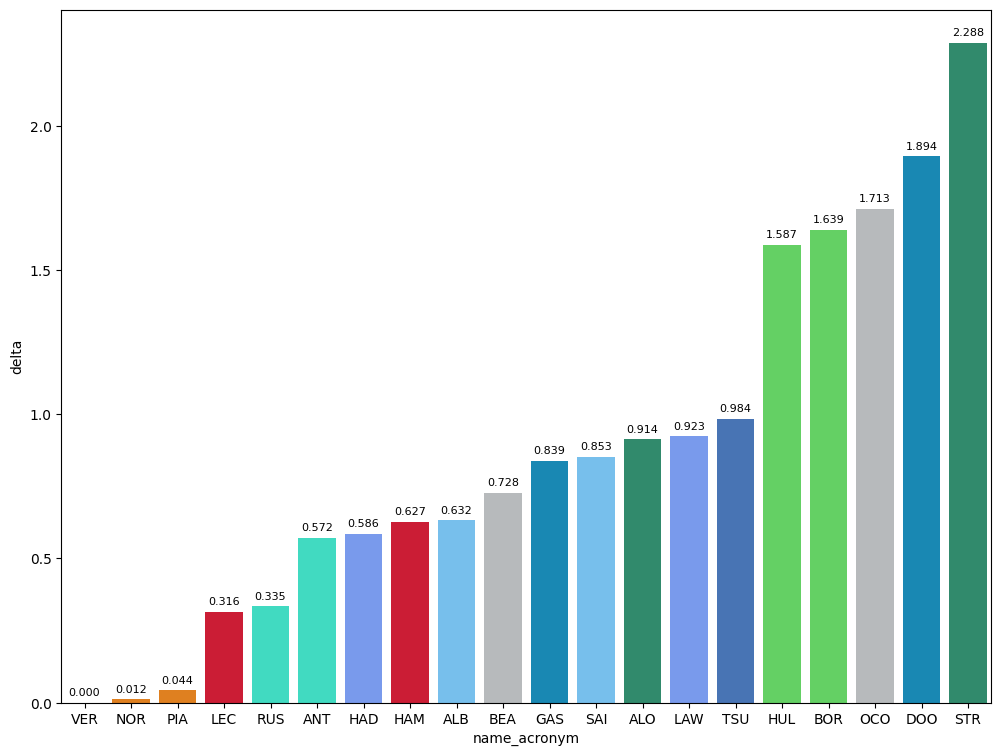

In [115]:
dt = jointables.sort_values(by=['fastest_lap'],ascending=True)
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Speed trap

#### Maximum speed per drivers

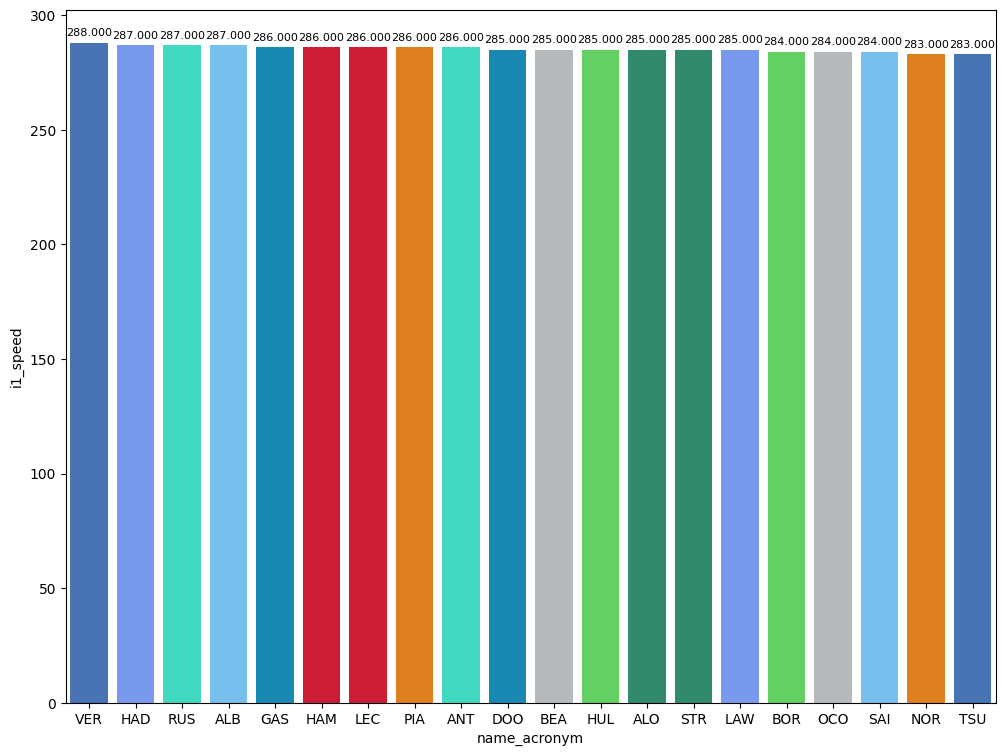

In [116]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

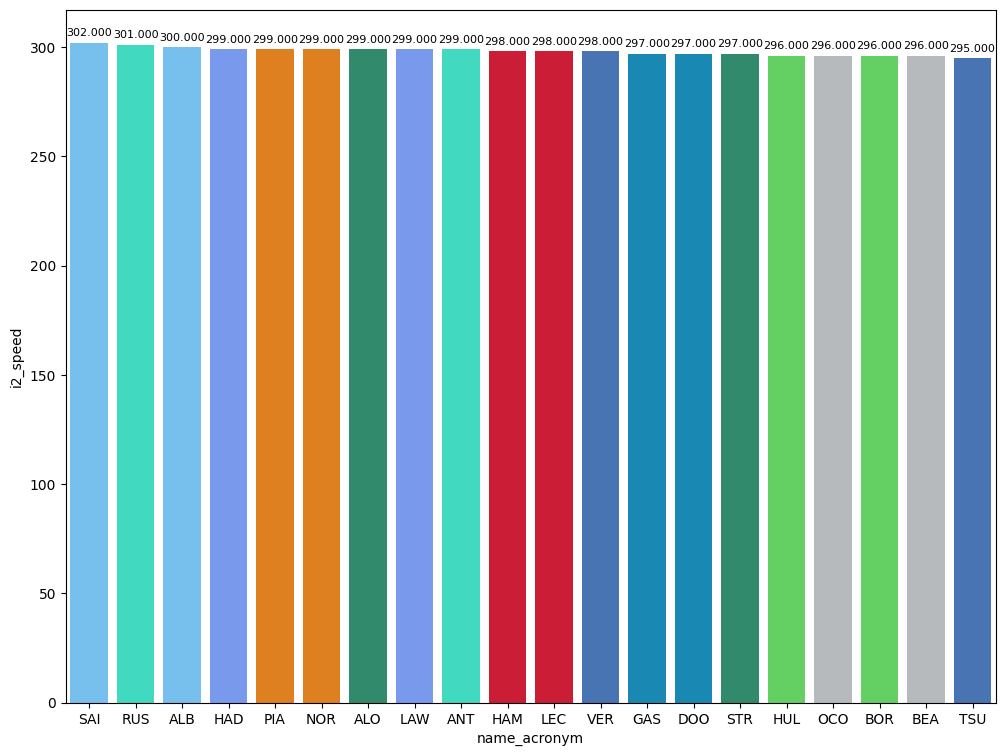

In [117]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

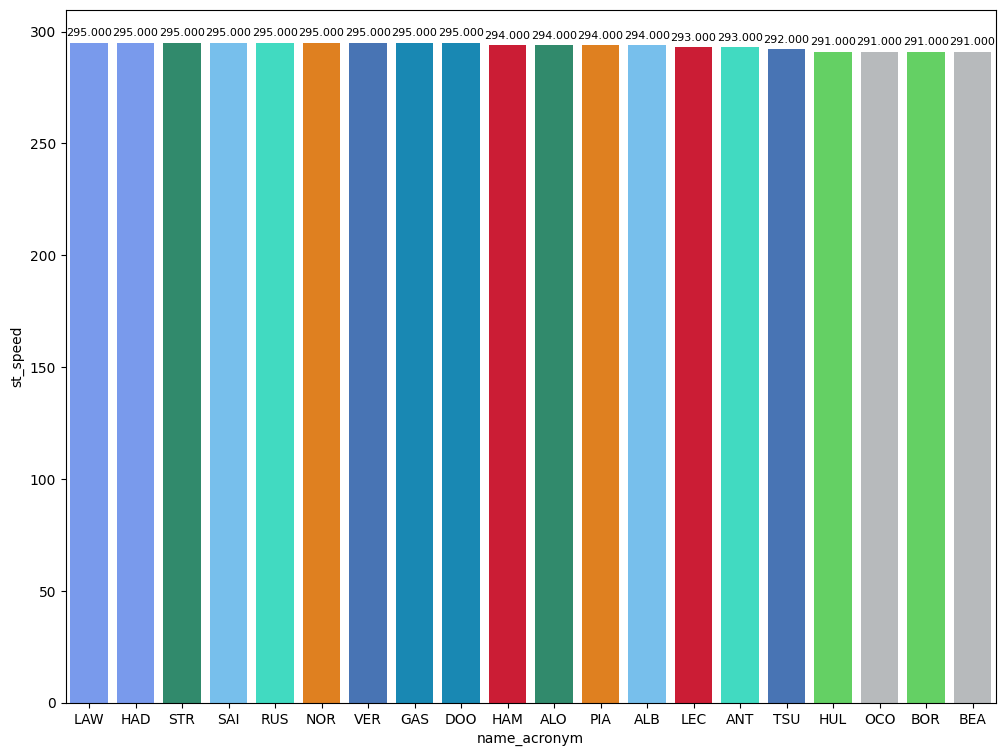

In [118]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

### Maximum speed per teams

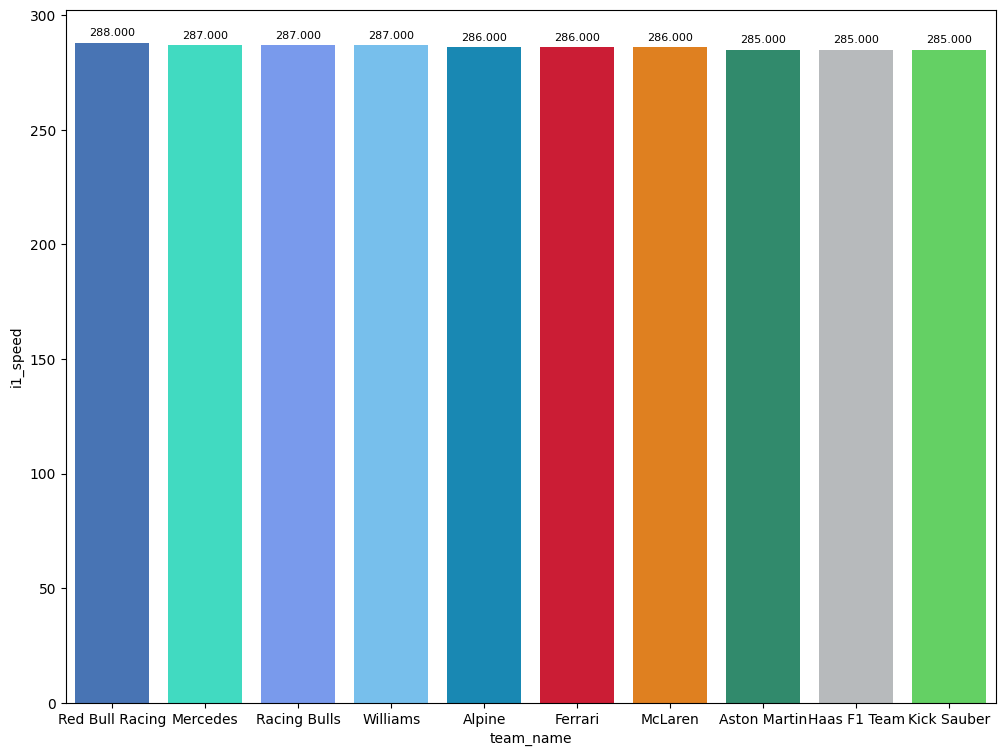

In [119]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i1_speed",top_speed)

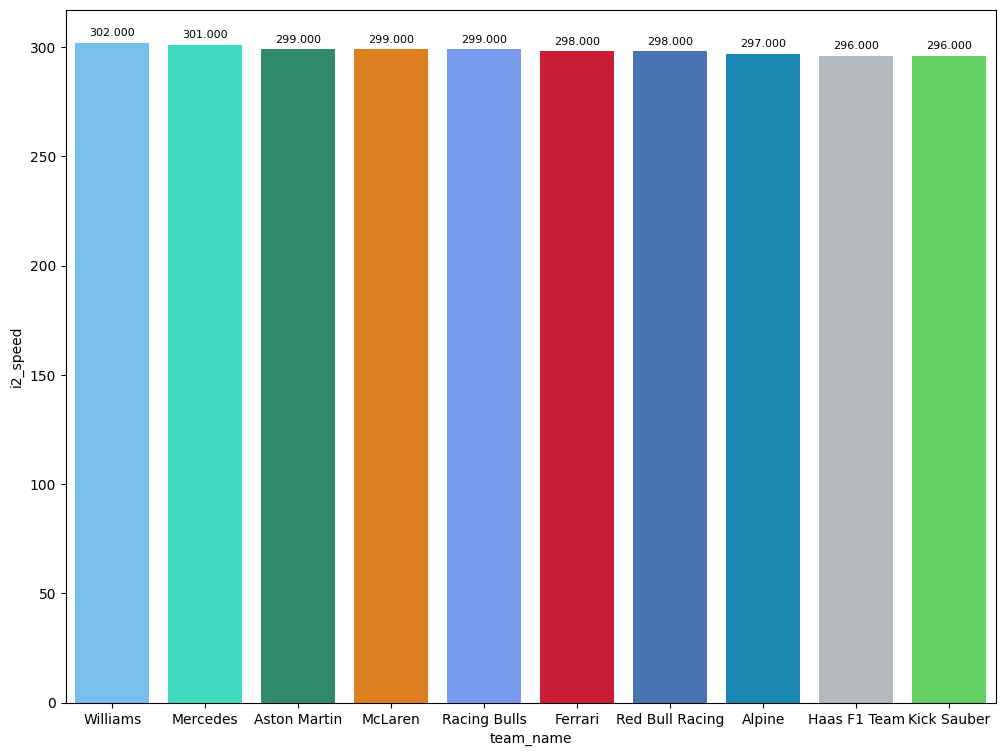

In [120]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i2_speed",top_speed)

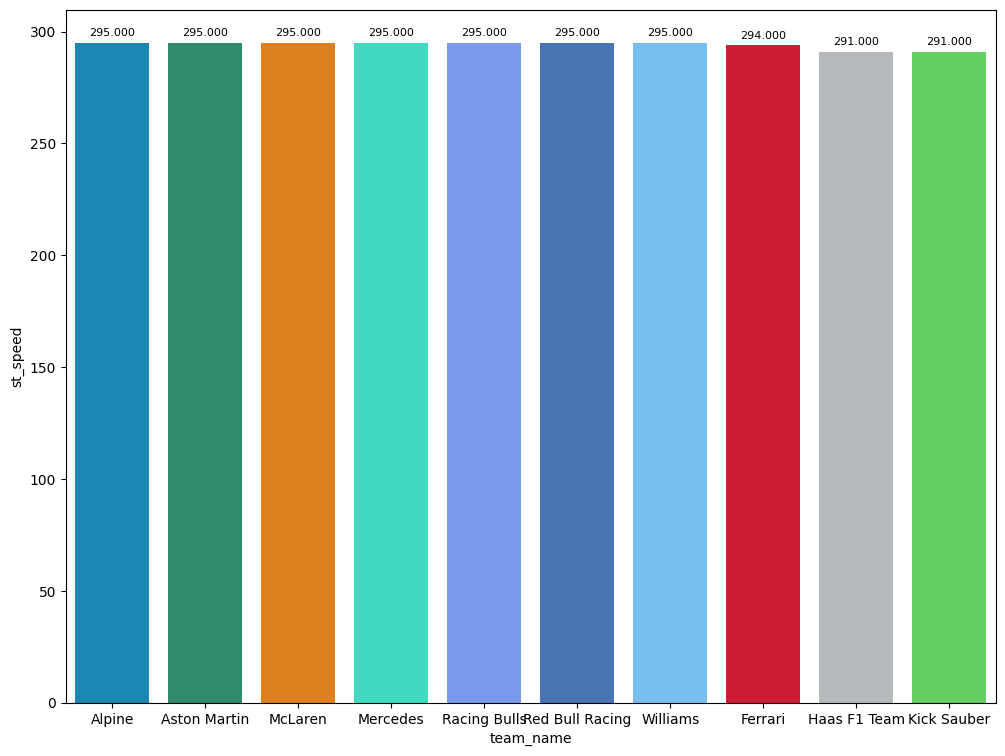

In [121]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","st_speed",top_speed)

In [124]:
mergequaly = pd.merge(competitiveLaps,drivers,on=['driver_number'])

In order to know when each session finished, race control dataset will be consulted.

In [125]:
maximumDateQ1 = "date_start <'2025-04-05T06:25:00+00:00'"
maximumDateQ2 = "date_start <'2025-04-05T06:56:00+00:00' and date_start >'2025-04-05T06:25:00+00:00'"
maximumDateQ3 = "date_start >'2025-04-05T06:56:00+00:00'"

### Qualyfing 1
In this session the surprise came from Aston Martin with Stroll that knocked-out in Q1. The rest of the drivers were expected to be knocked-out

In [126]:
q1Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ1).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will do a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [127]:
#Reference
P15 = q1Data[14:15]

In [128]:
print(
"Driver:",P15.full_name.to_string(index=False),
"Sector 1: ",P15.duration_sector_1.to_string(index=False),
"Sector 2: ",P15.duration_sector_2.to_string(index=False),
"Sector 3: ",P15.duration_sector_3.to_string(index=False)
)

Driver: Liam LAWSON Sector 1:  31.194 Sector 2:  39.833 Sector 3:  17.527


In [129]:
q1Data[15::]

meeting_key_x  session_key_x  driver_number  i1_speed  i2_speed  st_speed  \
20           1256          10002             27     288.0     300.0     297.0   
23           1256          10002              5     287.0     297.0     293.0   
2            1256          10002             31     286.0     296.0     295.0   
11           1256          10002              7     288.0     301.0     299.0   
64           1256          10002             18     285.0     297.0     295.0   

                          date_start  lap_duration  is_pit_out_lap  \
20  2025-04-05T06:17:09.076000+00:00        88.570           False   
23  2025-04-05T06:17:20.748000+00:00        88.622           False   
2   2025-04-05T06:16:57.420000+00:00        88.696           False   
11  2025-04-05T06:08:40.274000+00:00        88.877           False   
64  2025-04-05T06:05:30.273000+00:00        89.271           False   

    duration_sector_1  ...  broadcast_name  country_code first_name  \
20             31.082  ...    N HULKENBERG           GER       Nico   
23             31.080  ...     G BORTOLETO          None    Gabriel   
2              31.041  ...          E OCON           FRA    Esteban   
11             30.983  ...        J DOOHAN          None       Jack   
64             31.034  ...        L STROLL           CAN      Lance   

            full_name                                       headshot_url  \
20    Nico HULKENBERG  https://media.formula1.com/d_driver_fallback_i...   
23  Gabriel BORTOLETO  https://media.formula1.com/d_driver_fallback_i...   
2        Esteban OCON  https://media.formula1.com/d_driver_fallback_i...   
11        Jack DOOHAN  https://media.formula1.com/d_driver_fallback_i...   
64       Lance STROLL  https://media.formula1.com/d_driver_fallback_i...   

     last_name  team_colour     team_name name_acronym isFastestLap  
20  Hulkenberg       52E252   Kick Sauber          HUL         True  
23   Bortoleto       52E252   Kick Sauber          BOR         True  
2         Ocon       B6BABD  Haas F1 Team          OCO         True  
11      Doohan       0093CC        Alpine          DOO         True  
64      Stroll       229971  Aston Martin          STR         True  

[5 rows x 28 columns]

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.
It was a close battle to pass to Q2 with less of 2 tenths among the driver at risk and the last driver. Until the third sector, Stroll and Gasly had the chance to pass to Q2.

In [130]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[15::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0             27         0.016               -0.112                0.151   
1              5         0.068               -0.114                0.167   
2             31         0.142               -0.153                0.304   
3              7         0.323               -0.211                0.353   
4             18         0.717               -0.160                0.650   

   difference_sector_3 name_acronym  
0               -0.023          HUL  
1                0.015          BOR  
2               -0.009          OCO  
3                0.181          DOO  
4                0.227          STR

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning:

`utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning:

`utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning:

`utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning:

`utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: Futur

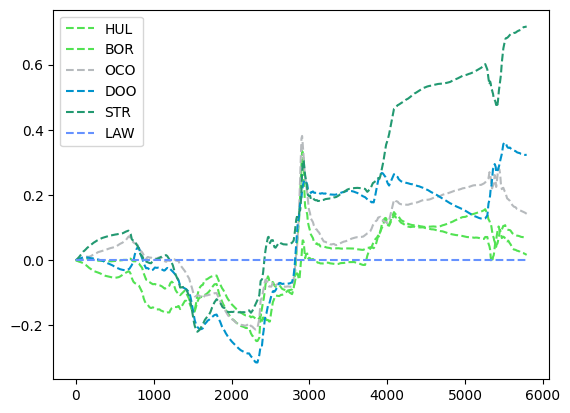

In [131]:
libraryDataF1.draw_gap(P15,15,20,q1Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk
I bring this section in order to know where the driver at risk lost his chances to improve in the qualyfing.
Albon was able to pass Hulkenberg, but, unfortunately, his second sector was bad.

In [132]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[0:14].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0              81        -0.867               -0.504               -0.291   
1              63        -0.711               -0.456               -0.171   
2               4        -0.709               -0.584               -0.108   
3              16        -0.634               -0.524                0.008   
4              44        -0.612               -0.521               -0.057   
5               1        -0.611               -0.498               -0.115   
6              22        -0.587               -0.355               -0.154   
7              12        -0.586               -0.294               -0.148   
8              10        -0.368               -0.528                0.258   
9              55        -0.345               -0.259               -0.039   
10             23        -0.336               -0.431                0.018   
11             87        -0.326               -0.363                0.105   
12              6        -0.276               -0.270                0.048   
13             14        -0.217               -0.469                0.149   

    difference_sector_3 name_acronym  
0                -0.072          PIA  
1                -0.084          RUS  
2                -0.017          NOR  
3                -0.118          LEC  
4                -0.034          HAM  
5                 0.002          VER  
6                -0.078          TSU  
7                -0.144          ANT  
8                -0.098          GAS  
9                -0.047          SAI  
10                0.077          ALB  
11               -0.068          BEA  
12               -0.054          HAD  
13                0.103          ALO

#### Best sector per driver
In this section we can see the best sector of the session

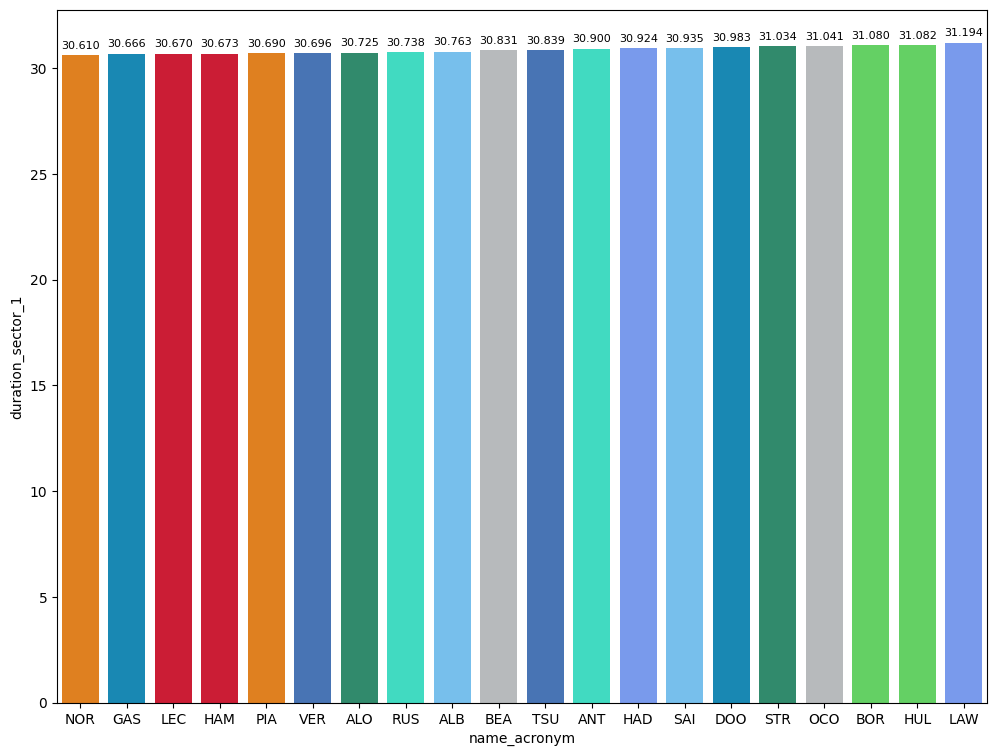

In [133]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q1Data.sort_values(by=['duration_sector_1'],ascending=True))

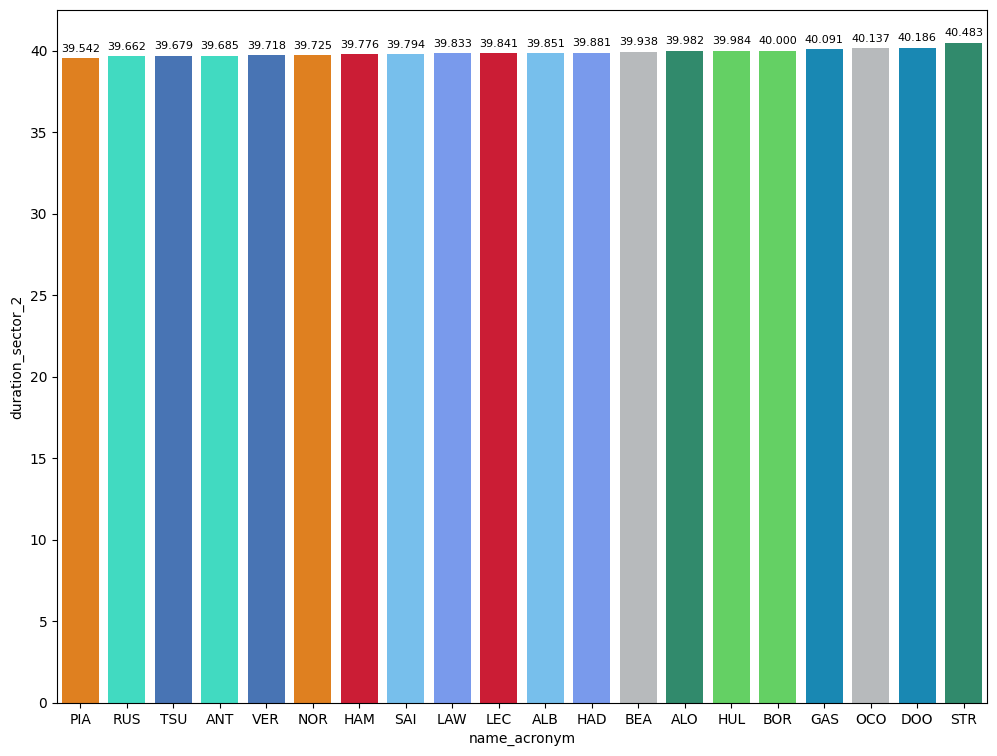

In [134]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q1Data.sort_values(by=['duration_sector_2'],ascending=True))

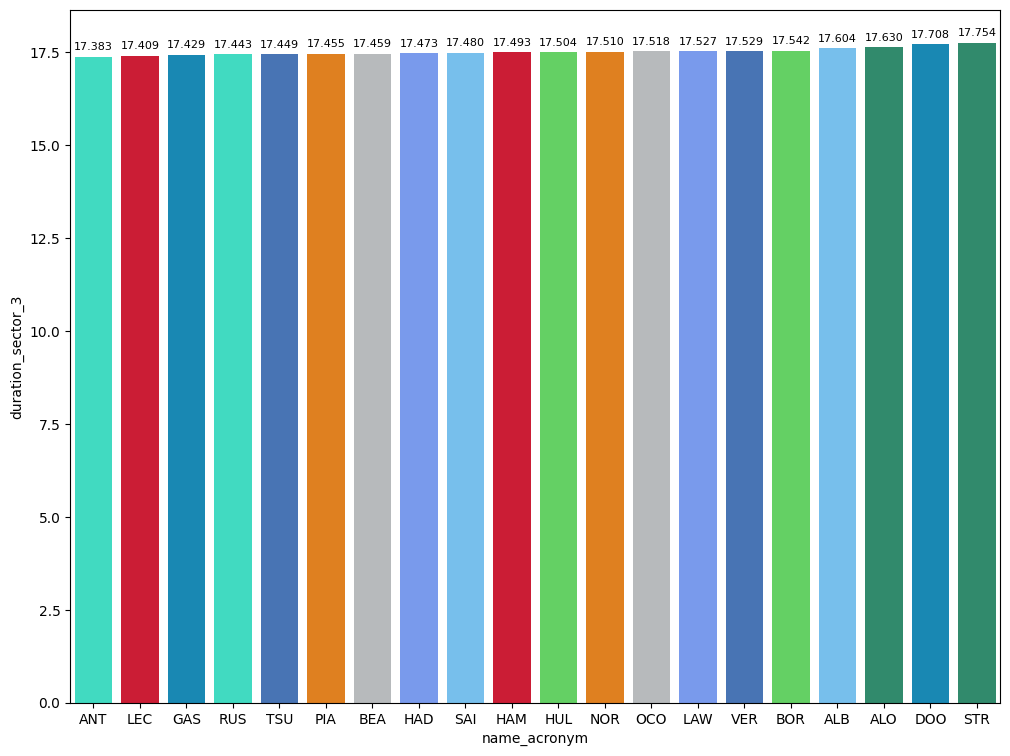

In [135]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q1Data.sort_values(by=['duration_sector_3'],ascending=True))

### Qualyfing 2
In this session, there were not surprises

In [136]:
q2Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ2).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [137]:
#Reference
P10 = q2Data[9:10]
print(
"Driver:",P10.full_name.to_string(index=False),
"Sector 1: ",P10.duration_sector_1.to_string(index=False),
"Sector 2: ",P10.duration_sector_2.to_string(index=False),
"Sector 3: ",P10.duration_sector_3.to_string(index=False)
)

Driver: Alexander ALBON Sector 1:  30.714 Sector 2:  39.651 Sector 3:  17.418


##### Analysis of each sector of the driver at risk compared to the drivers eliminated.
RB had a good pace, as we can see in the standings. Tsunoda made it through Q2 and Ricciardo finished P11.

In [138]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[10::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0             10         0.039               -0.121                0.189   
1             55         0.053                0.046               -0.072   
2             14         0.114               -0.081                0.054   
3             30         0.123                0.165               -0.017   
4             22         0.217                0.126                0.021   

   difference_sector_3 name_acronym  
0               -0.029          GAS  
1                0.079          SAI  
2                0.141          ALO  
3               -0.025          LAW  
4                0.070          TSU

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning:

`utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning:

`utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning:

`utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning:

`utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: Futur

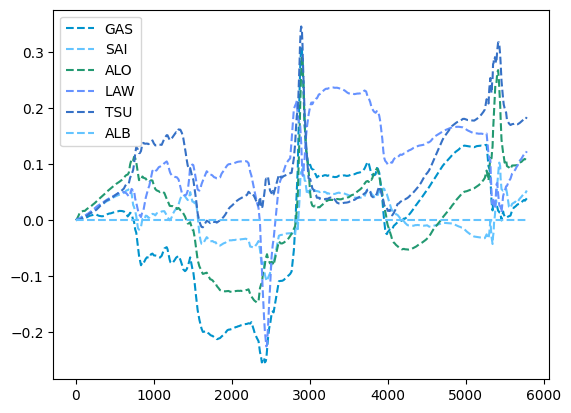

In [139]:
libraryDataF1.draw_gap(P10,10,15,q2Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk
I bring this section in order to know where the driver at risk lost his chances to improve in the qualyfing.
RB had a good pace but it was not enough to fight with the drivers that finished better than their drivers.

In [144]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[0:9].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0              4        -0.637               -0.263               -0.263   
1             63        -0.383               -0.256               -0.078   
2              1        -0.281               -0.204               -0.010   
3             81        -0.276               -0.056               -0.225   
4             16        -0.228               -0.162               -0.047   
5             44        -0.173               -0.015               -0.197   
6             12        -0.144                0.036               -0.057   
7             87        -0.072               -0.045               -0.012   
8              6        -0.008                0.069               -0.060   

   difference_sector_3 name_acronym  
0               -0.111          NOR  
1               -0.049          RUS  
2               -0.067          VER  
3                0.005          PIA  
4               -0.019          LEC  
5                0.039          HAM  
6               -0.123          ANT  
7               -0.015          BEA  
8               -0.017          HAD

#### Best sector per driver
In this section we can see the best sector of the session

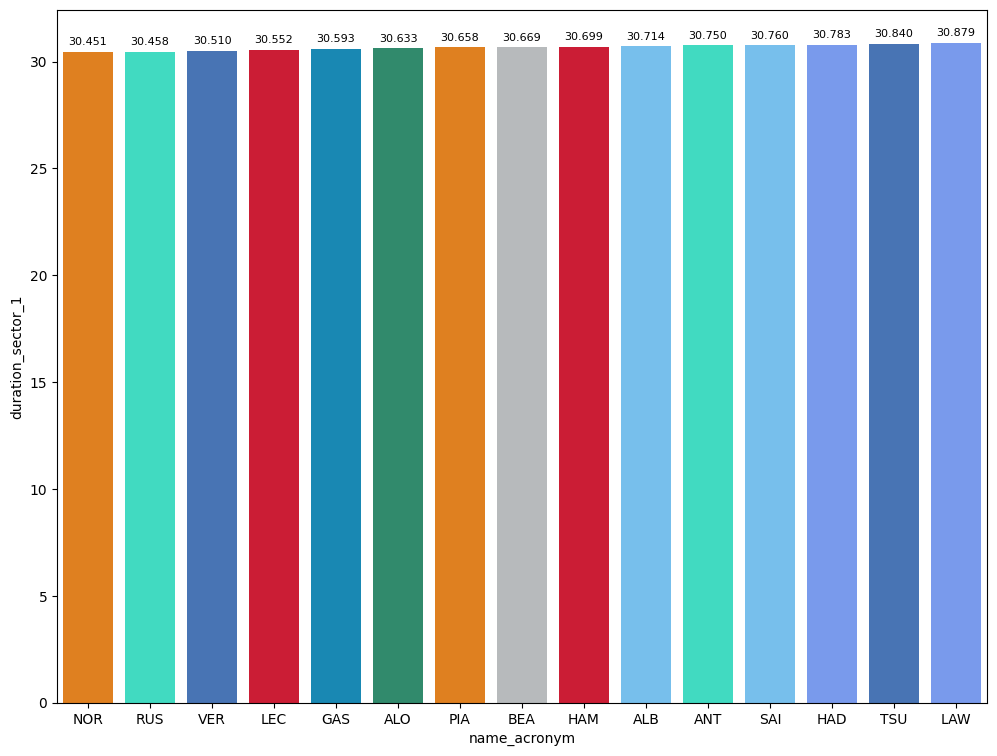

In [145]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q2Data.sort_values(by=['duration_sector_1'],ascending=True))

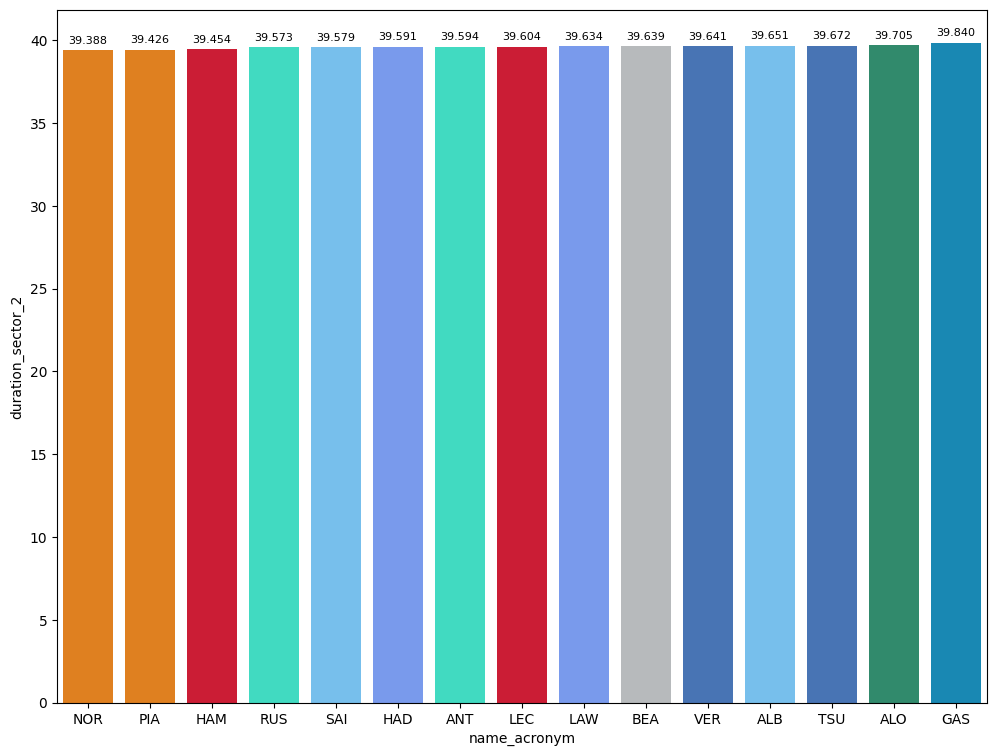

In [146]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q2Data.sort_values(by=['duration_sector_2'],ascending=True))

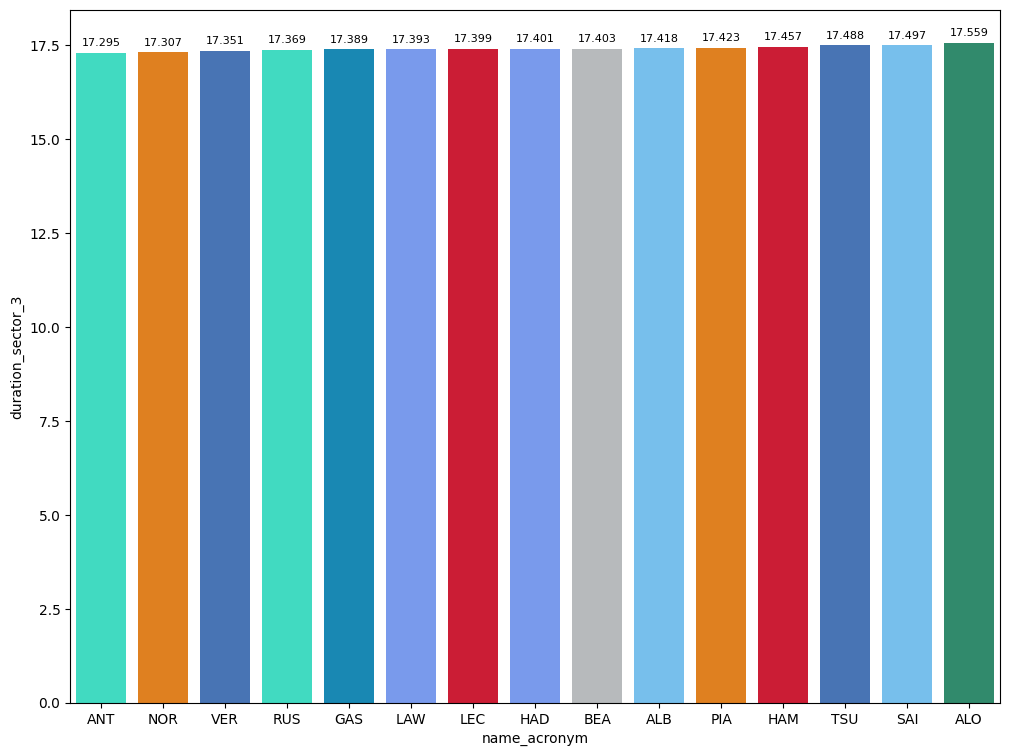

In [147]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q2Data.sort_values(by=['duration_sector_3'],ascending=True))

### Qualyfing 3

In [148]:
q3Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ3).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with poleman
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [149]:
#Reference
P1 = q3Data[:1]
print(
"Driver:",P1.full_name.to_string(index=False),
"Sector 1: ",P1.duration_sector_1.to_string(index=False),
"Sector 2: ",P1.duration_sector_2.to_string(index=False),
"Sector 3: ",P1.duration_sector_3.to_string(index=False)
)

Driver: Max VERSTAPPEN Sector 1:  30.387 Sector 2:  39.355 Sector 3:  17.241


##### Analysis of each sector of the driver at risk compared to the drivers eliminated.
Red Bull was dominant in Japan as we can see in qualyfing. After finishing the second sector, Perez had a better laptime than Verstappen but a better sector from the Dutch driver afford to him to take the pole.

In [150]:
newdataset2 = pd.DataFrame()
for index,row in q3Data[1::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P1,newdataset2)
newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0              4         0.012               -0.029               -0.054   
1             81         0.044                0.238               -0.158   
2             16         0.316                0.148               -0.003   
3             63         0.335               -0.011                0.244   
4             12         0.572                0.282                0.148   
5              6         0.586                0.276                0.116   
6             44         0.627                0.119                0.343   
7             23         0.632                0.217                0.257   
8             87         0.884                0.259                0.298   

   difference_sector_3 name_acronym  
0                0.095          NOR  
1               -0.036          PIA  
2                0.171          LEC  
3                0.102          RUS  
4                0.142          ANT  
5                0.194          HAD  
6                0.165          HAM  
7                0.158          ALB  
8                0.327          BEA

#### Best sector per driver
In this section we can see the best sector of the session

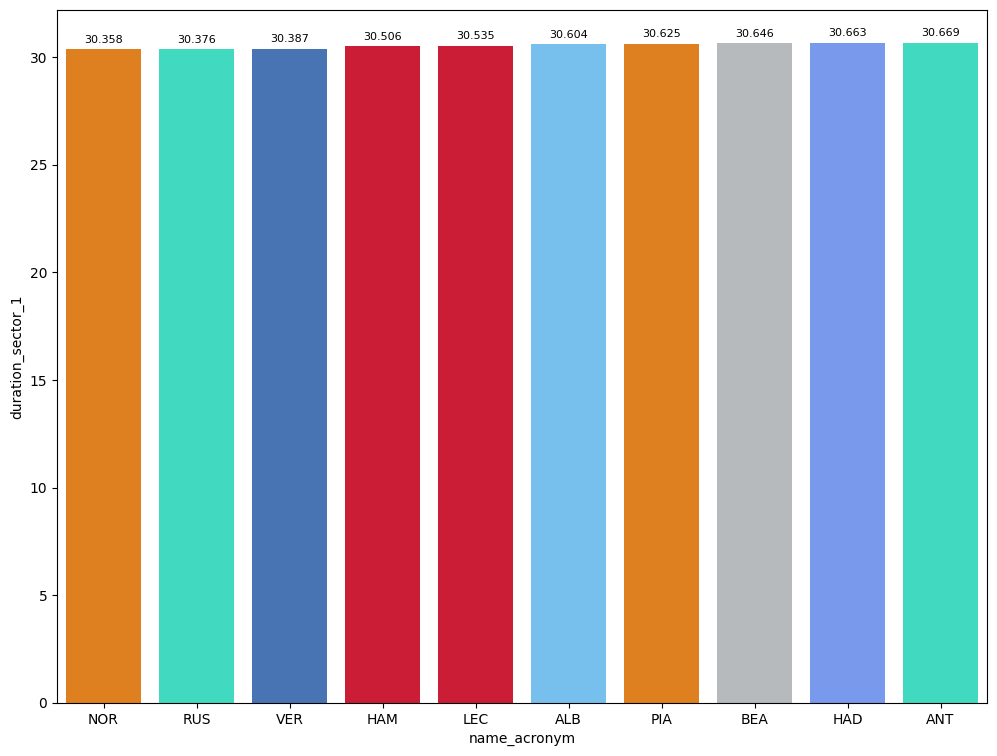

In [151]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q3Data.sort_values(by=['duration_sector_1'],ascending=True))

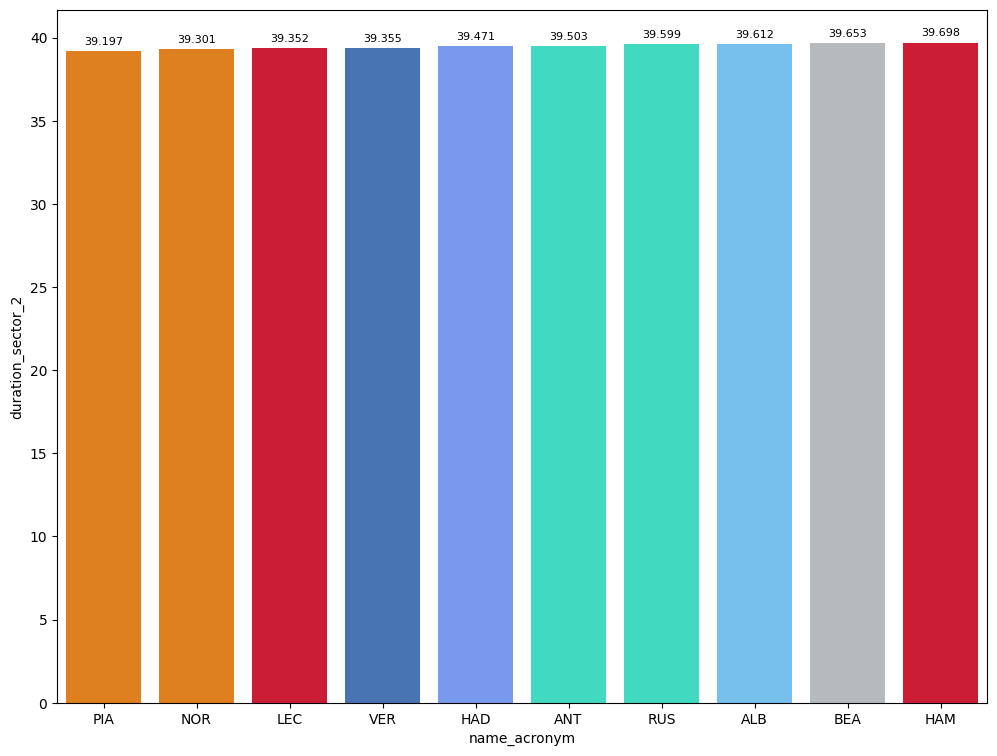

In [152]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q3Data.sort_values(by=['duration_sector_2'],ascending=True))

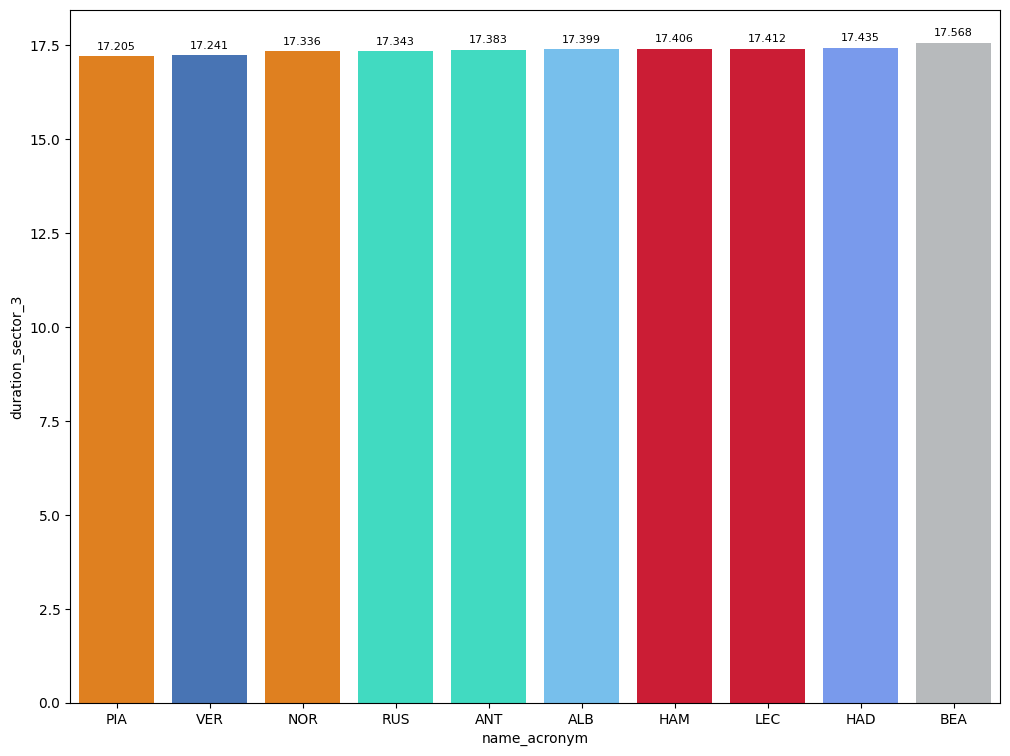

In [153]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q3Data.sort_values(by=['duration_sector_3'],ascending=True))

#### Best sector per driver of the session (in general)

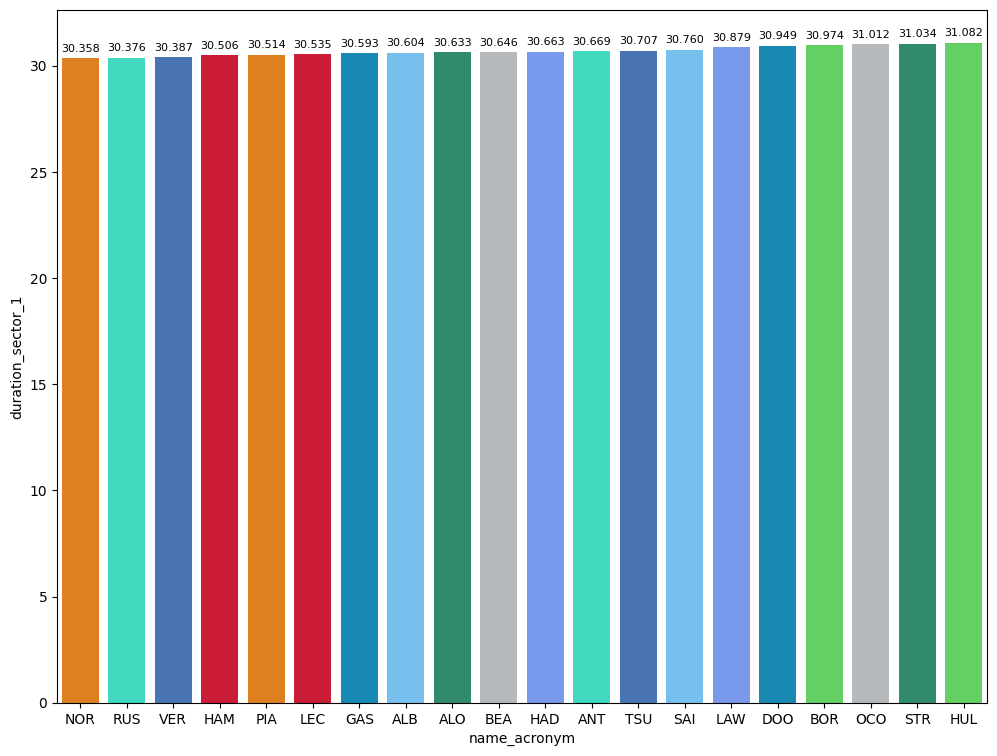

In [154]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True)).reset_index())

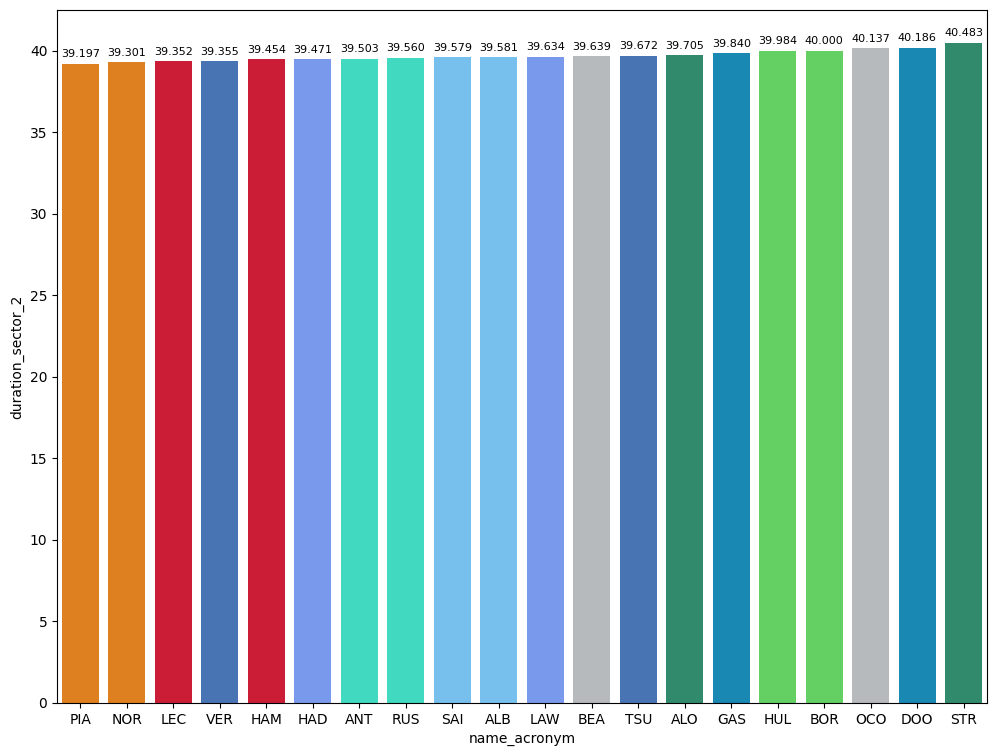

In [155]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True)).reset_index())

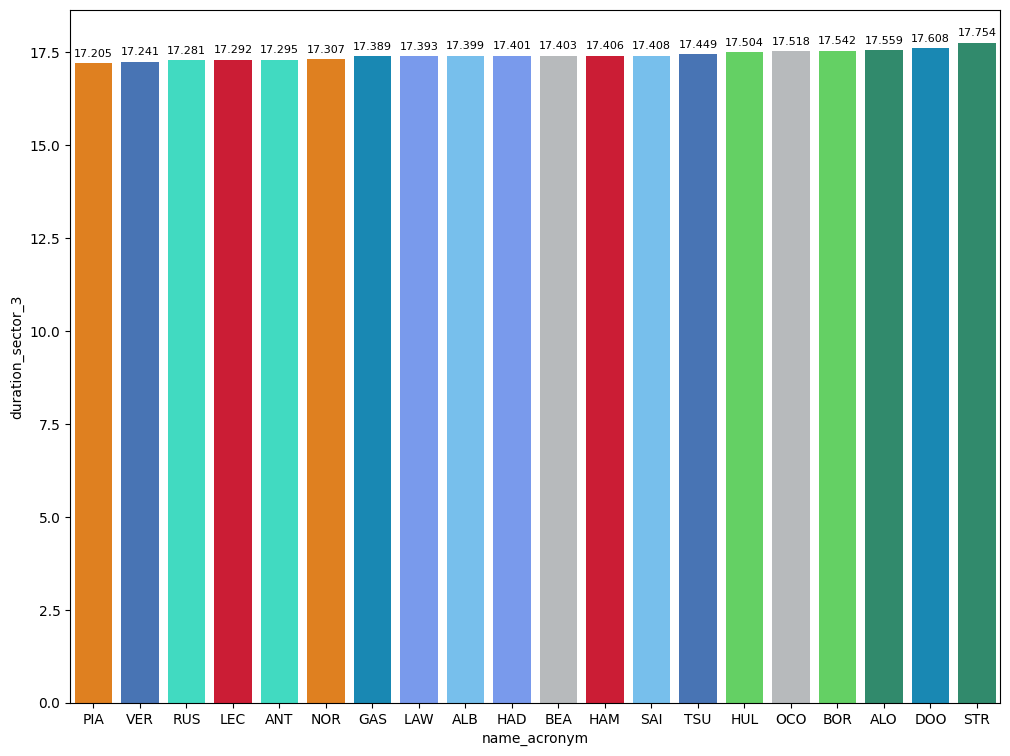

In [156]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True)).reset_index())

### Comparaison between the poleman and the second

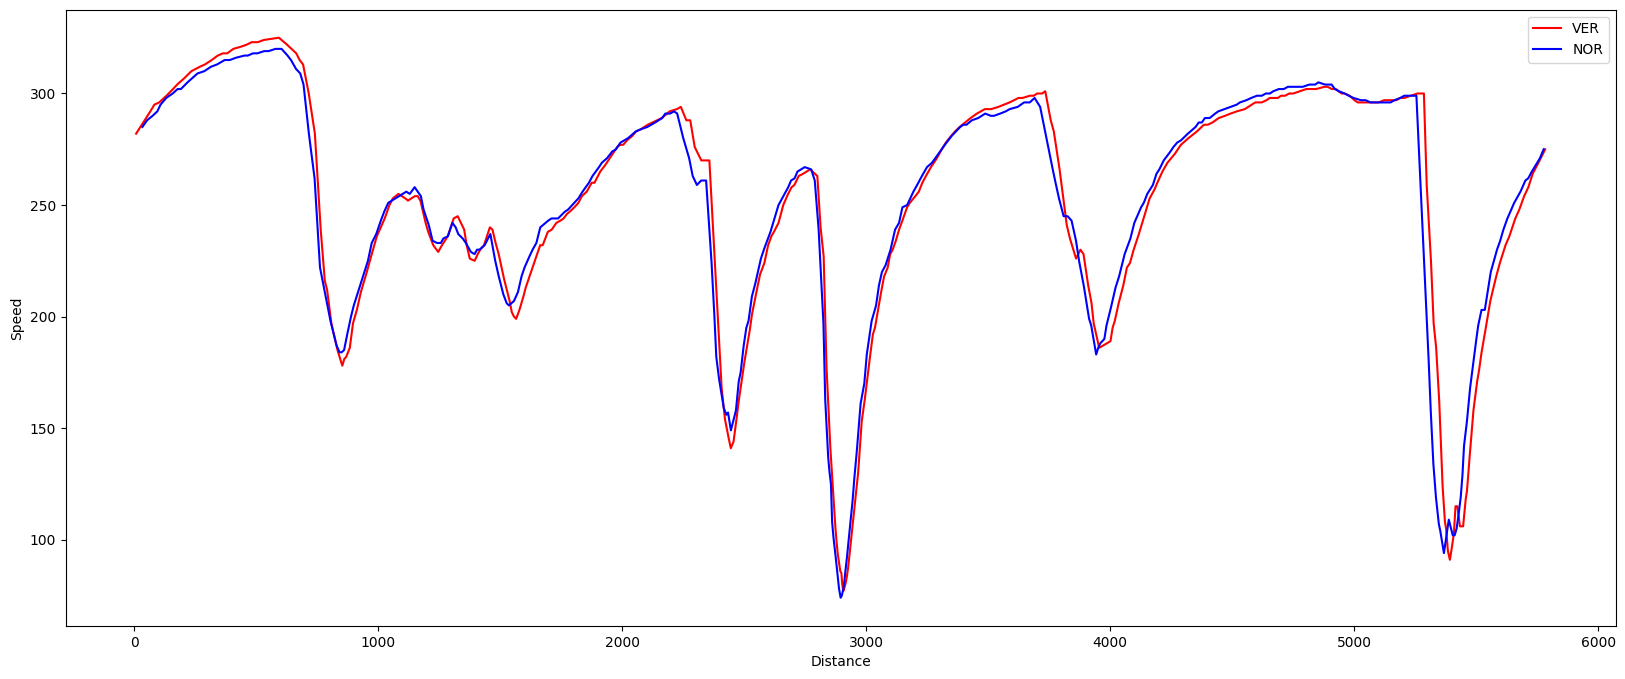

In [157]:
libraryDataF1.plot_telemetry("Distance","Speed",dt,session)

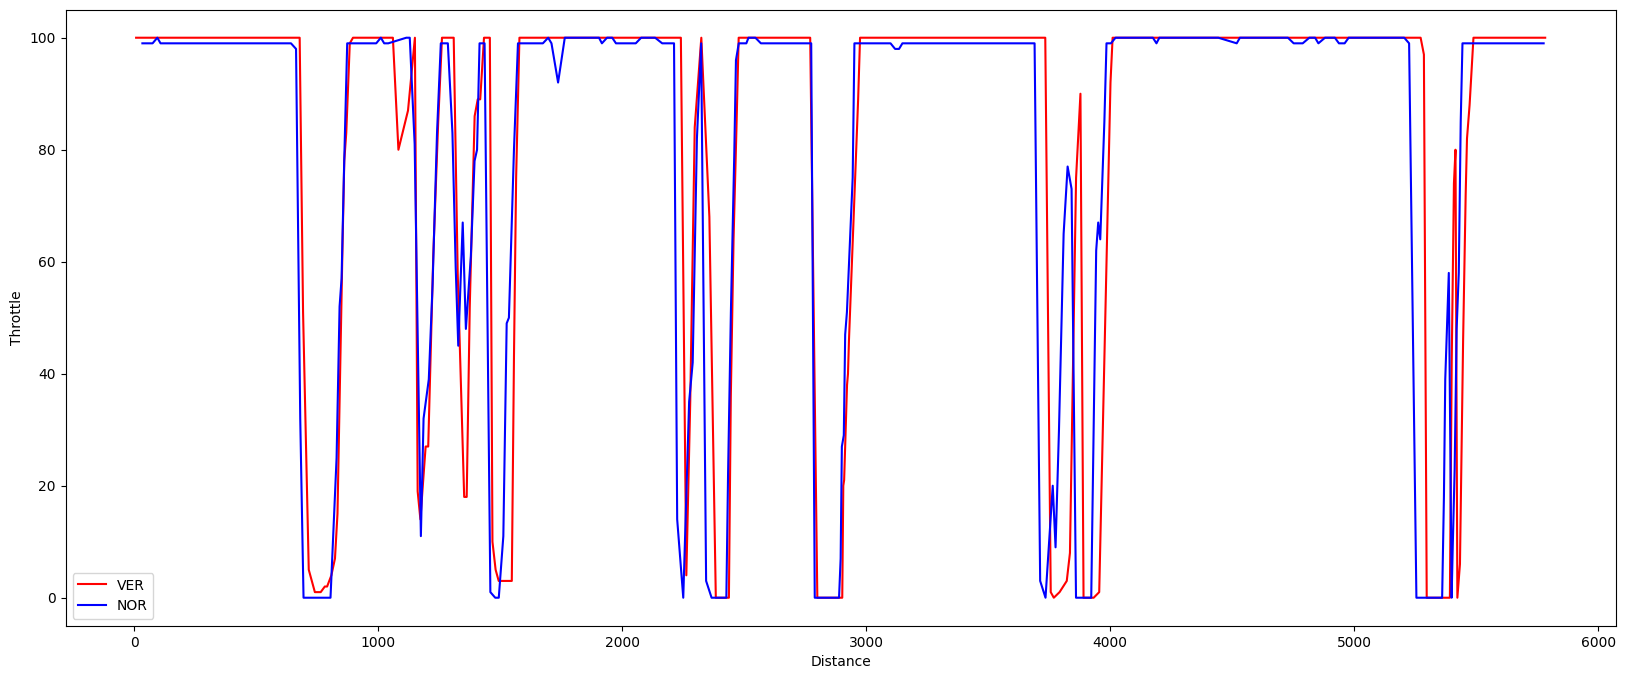

In [158]:
libraryDataF1.plot_telemetry("Distance","Throttle",dt,session)

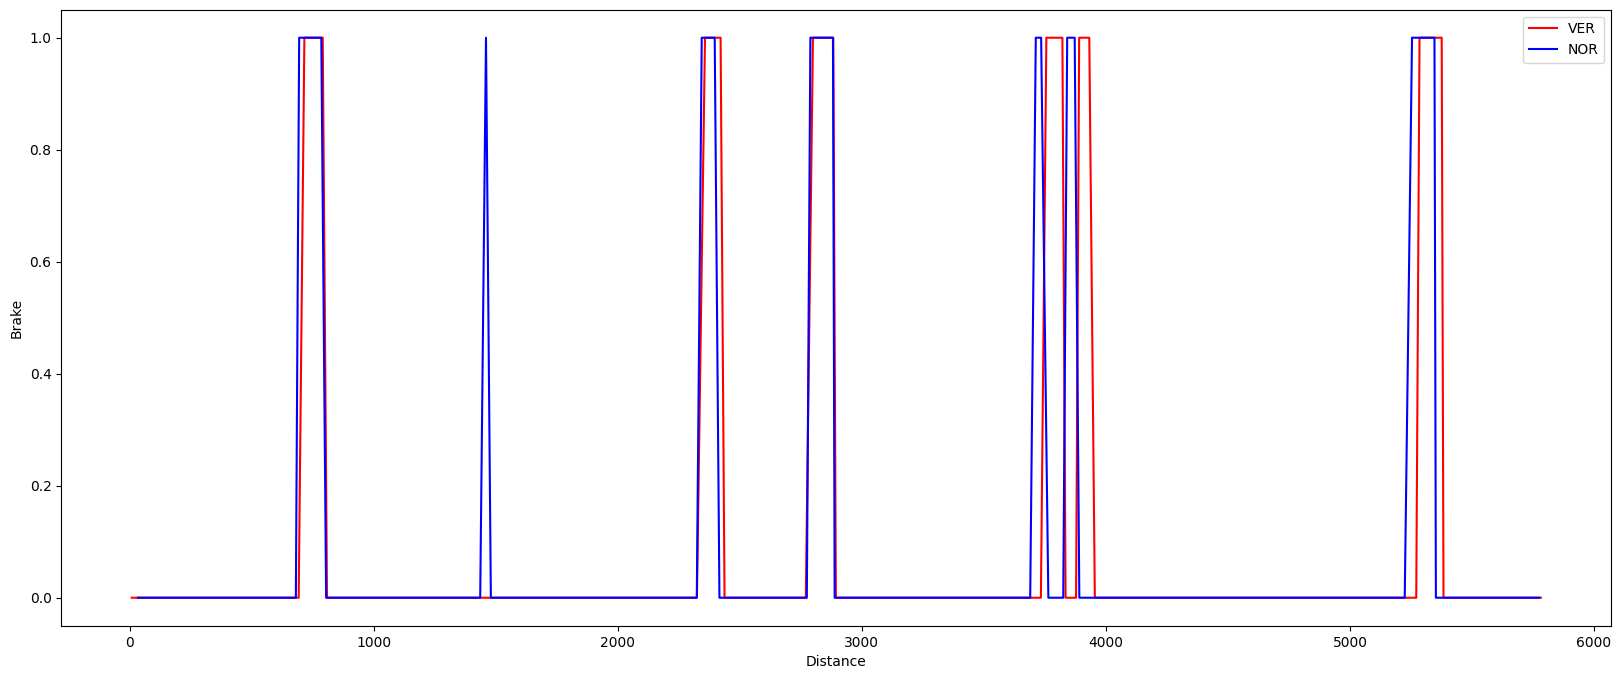

In [159]:
libraryDataF1.plot_telemetry("Distance","Brake",dt,session)

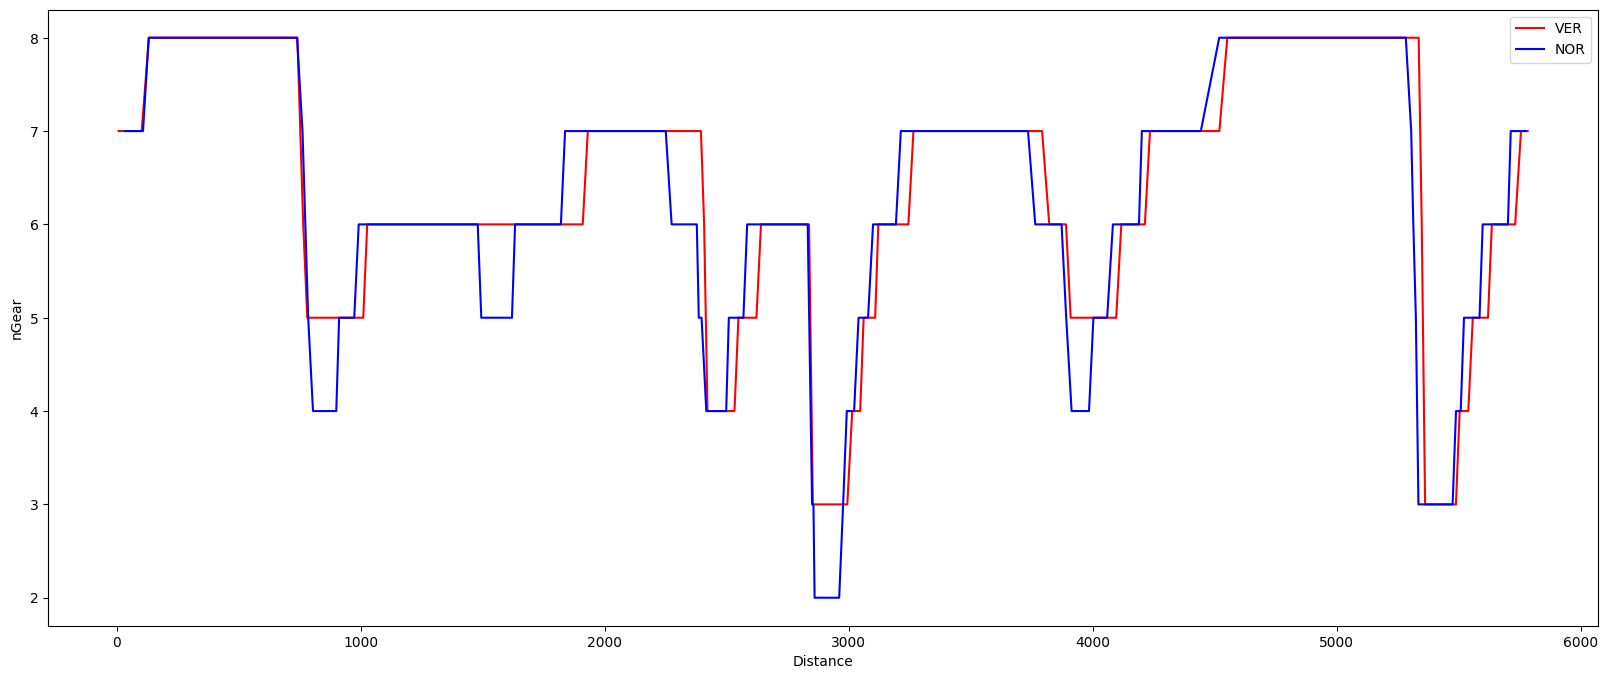

In [160]:
libraryDataF1.plot_telemetry("Distance","nGear",dt,session)

## Race
### Obtain setup

In [ ]:
race = libraryDataF1.obtain_information('laps',session_key=9496)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9496)
drivers = libraryDataF1.obtain_information('drivers',session_key=9496)
libraryDataF1.obtain_drivers_colours(drivers)

In [ ]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)

In [ ]:
raceLaps = race.query("is_pit_out_lap == False")
jointables = pd.merge(raceLaps,stintsDataFrame,on=['lap_number','driver_number'])

### Mean pace with the different compound used on the session

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 110").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

### Speed trap

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Race pace
General explanation
Explanation per teams

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 110").dropna().groupby("team_name")['lap_duration'].mean().sort_values(ascending=True))
race_pace

#### Mean race pace per sector
In this section, we can see the pace shown per each team in each sector sorted ascending.

#### Sector 1
General explanation

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 110").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

#### Sector 2
General explanation

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 110").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

#### Sector 3
General explanation

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 110").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

### Long runs

In [ ]:
MINIMUN_SECONDS = 84
MAXIMUM_SECONDS = 110

#### Red Bull Racing

In [ ]:
stintInformation.query('driver_number == 1 or driver_number == 11')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [ ]:
stintInformation.query('driver_number == 55 or driver_number == 16')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [ ]:
stintInformation.query('driver_number == 63 or driver_number == 44')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [ ]:
stintInformation.query('driver_number == 81 or driver_number == 4')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [ ]:
stintInformation.query('driver_number == 18 or driver_number == 14')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### RB

In [ ]:
stintInformation.query('driver_number == 3 or driver_number == 22')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,3,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [ ]:
stintInformation.query('driver_number == 20 or driver_number == 27')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,20,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [ ]:
stintInformation.query('driver_number == 10 or driver_number == 31')

In [ ]:
data =libraryDataF1.getinfolongruns(jointables,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [ ]:
stintInformation.query('driver_number == 2 or driver_number == 23')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data= libraryDataF1.getinfolongruns(jointables,2,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [ ]:
stintInformation.query('driver_number == 24 or driver_number == 77')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

### Pits
Before to finish the analysis, I added the Pits sections where it can see how much time teams spent in the box.

In [ ]:
pit = libraryDataF1.obtain_information('pit',session_key=9496)

In [ ]:
jointables = pd.merge(drivers,pit,on=['driver_number']).query("pit_duration<120")
jointables
pit_duration = pd.DataFrame(jointables.groupby('team_name')['pit_duration'].mean().sort_values(ascending=True))
pit_duration